## Uploading a zip file

In [1]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

Saving 2020.zip to 2020.zip


## Unzipping the file into a directory

In [2]:
# Define the directory where you want to extract the files
extraction_directory = "/content/2020_files"

# Create the directory if it does not exist
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# Unzip the file
for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(extraction_directory)

# List the extracted files
print(f"Files extracted to {extraction_directory}:")
print(os.listdir(extraction_directory))

Files extracted to /content/2020_files:
['Energy', 'Financial Services', 'Utilities', 'Technology', 'Industrials', 'Consumer Defensive', 'Basic Materials', 'Communication Services', 'Real Estate', 'Healthcare', 'Agriculture', 'Consumer Cyclical']


## Installing and importing models

In [3]:
# Install spaCy and download the 'en_core_web_md' model
!pip install spacy


In [4]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Loading the Spacy Model

In [5]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_md")

## Importing the neccessary Libraries

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from IPython.display import display, Markdown
import torch
import plotly.express as px
import pandas as pd
from nltk.tokenize import sent_tokenize
import nltk
import regex as re
import os
import glob
import csv
import re
from collections import Counter
# import matplotlib.pyplot as plt
import shutil
from google.colab import files

# Download NLTK tokenizer data
nltk.download('punkt')

import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Invoking the SDG Pre-trained model

In [7]:
checkpoint = "sadickam/sdg-classification-bert"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

## Load the model

In [8]:
def load_model():
    return AutoModelForSequenceClassification.from_pretrained(checkpoint)

## Load the SDG Text File

In [9]:
# List of directories containing the text files
directories = [
    "/content/2020_files/Agriculture",
    "/content/2020_files/Basic Materials",
    "/content/2020_files/Communication Services",
    "/content/2020_files/Consumer Cyclical",
    "/content/2020_files/Consumer Defensive",
    "/content/2020_files/Energy",
    "/content/2020_files/Financial Services",
    "/content/2020_files/Healthcare",
    "/content/2020_files/Industrials",
    "/content/2020_files/Real Estate",
    "/content/2020_files/Technology",
    "/content/2020_files/Utilities"
]

# Get a list of all .txt files in the specified directories and their subdirectories
txt_files = []
for directory in directories:
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".txt"):
                txt_files.append(os.path.join(root, file))

# Print the total number of .txt files
print(f"Total number of .txt files: {len(txt_files)}")

# Loop through each file and read its content
text_contents = []
for i, file_path in enumerate(txt_files):
    with open(file_path, "r") as file:
        text_content = file.read()
        text_contents.append(text_content)

Total number of .txt files: 200


## Defining keywords per SDG Goal

In [10]:
original_keywords = {
    'GOAL 1: No Poverty': [
        'poverty', 'deprivation', 'subsistence', 'indigence', 'impoverishment',
        'economic', 'insecurity', 'wealth gap', 'slums', 'social protection',
        'aid', 'charity', 'grants', 'welfare', 'microfinance', 'survival',
        'basic needs', 'extreme poverty', 'vulnerable populations', 'safety nets',
        'Proportion of the population', 'Proportion of population living', 'Proportion of population covered',
        'Pro-poor public social spending', 'Total official development assistance'
    ],
    'GOAL 2: Zero Hunger': [
        'malnutrition', 'famine', 'starvation', 'food security', 'nourishment',
        'agriculture', 'crops', 'drought-resistant', 'food aid', 'rural development',
        'perishable', 'grains', 'sustainability', 'orchards', 'horticulture',
        'pastoralism', 'crop yield', 'food stocks', 'agricultural development', 'food reserves',
        'Prevalence of underourishment', 'Prevalence of stunting', 'Volume of production', 'Proportion of agricultural area',
        'Number of plant', 'The agriculture orientation index', 'Agricultural export subsidies', 'Indicator of food price', 'plant'
    ],
    'GOAL 3: Good Health and Well-being': [
        'mental health', 'hospitals', 'diseases', 'prevention', 'treatment',
        'healthcare', 'vaccination', 'wellness', 'hygiene', 'fitness',
        'immunization', 'epidemic', 'sanitation', 'health education', 'primary care',
        'elderly care', 'pandemics', 'health systems', 'morbidity', 'public health',
        'Maternal mortality ratio', 'mortality rate', 'Number of new HIV','Coverage of treatment interventions',
        'Death rate', 'Proportion of women', 'Coverage of essential health', 'Mortality rate attributed',
        'Age-standardized prevalence of current', 'Proportion of the target', 'Health worker density', 'International Health Regulations'
    ],
    'GOAL 4: Quality Education': [
        'literacy', 'curriculum', 'pedagogy', 'schooling', 'apprenticeship',
        'e-learning', 'tertiary', 'teachers', 'scholarships', 'educational technology',
        'inclusivity', 'textbooks', 'primary education', 'literacy rate', 'dropout',
        'vocational training', 'distance learning', 'education funding', 'academic performance', 'student engagement',
        'Proportion of children', 'Proportion of children aged', 'Participation rate of youth', 'Proportion of youth', 'Parity indices',
        'Proportion of population', 'Extent to which', 'Proportion of schools offering', 'Volume of official development', 'Proportion of teachers'
    ],
    'GOAL 5: Gender Equality': [
        'empowerment', 'feminism', 'parity', 'discrimination', 'equity',
        'women', 'maternal', 'girls', 'sexual harassment', 'leadership roles',
        'rights', 'empowerment programs', 'equal pay', 'reproductive rights', 'advocacy',
        'gender roles', 'quotas', 'gender-based violence', 'empowerment', 'equal opportunity',
        'Whether or not legal', 'Proportion of ever-partnered women', 'Proportion of women aged', 'Proportion of time spent', 'Proportion of seats held',
        'Proportion of women aged', 'Proportion of total', 'Proportion of individuals who', 'Proportion of countries with'
    ],
    'GOAL 6: Clean Water and Sanitation': [
        'potable', 'irrigation', 'hygiene', 'wastewater', 'aquifers',
        'sanitation facilities', 'clean drinking water', 'pollution', 'hygiene education', 'sustainable management',
        'filters', 'desalination', 'rainwater', 'sustainable water', 'water treatment',
        'sewage', 'hygiene promotion', 'water quality', 'contamination', 'safe water',
        'Proportion of population using', 'Proportion of domestic and', 'Change in water-use efficiency', 'Degree of integrated water', 'Change in the extent', 'Amount of water- and', 'Proportion of local administrative'
    ],
    'GOAL 7: Affordable and Clean Energy': [
        'renewable', 'solar', 'biomass', 'efficiency', 'sustainable',
        'wind', 'hydroelectric', 'energy access', 'conservation', 'grids',
        'fossil fuels', 'electrification', 'energy saving', 'low-carbon', 'nuclear energy',
        'energy subsidy', 'power plants', 'energy storage', 'grid stability', 'energy policy',
        'Proportion of population', 'Renewable energy', 'Energy intensity measured', 'International financial flows', 'Installed renewable energy-generating capacity'
    ],
    'GOAL 8: Decent Work and Economic Growth': [
        'employment', 'labor', 'productivity', 'enterprise', 'prosperity',
        'fair trade', 'wages', 'informal sector', 'youth employment', 'economic policy',
        'job creation', 'economic stability', 'innovation', 'minimum wage', 'workforce',
        'economic opportunities', 'labor market', 'unemployment rate', 'job security', 'skill development',
        'Annual growth rate', 'Proportion of informal employment', 'Domestic material consumption', 'Proportion of population',
        'Proportion of employed population', 'Unemployment rate'
    ],
    'GOAL 9: Industry, Innovation and Infrastructure': [
        'technology', 'manufacturing', 'construction', 'automation', 'logistics',
        'research', 'patents', 'startups', 'digitalization', 'industrial policy',
        'broadband', 'sustainable industries', 'infrastructure investment', 'industrial zones', 'technology transfer',
        'innovation hubs', 'research and development', 'supply chains', 'productive capacity', 'efficiency',
        'Proportion of population covered', 'Passenger and freight volumes', 'Research and development expenditure', 'Average income growth rate',
        'Proportion of small-scale industrial', 'Number of passengers carried', 'Proportion of industries', 'Level of technological upgrading',
        'Proportion of small-scale industries', 'Number of domestic companies'
    ],
    'GOAL 10: Reduced Inequality': [
        'disparity', 'equity', 'justice', 'inclusivity', 'access',
        'social equity', 'marginalized', 'racial equality', 'gender disparities', 'economic inclusion',
        'wealth distribution', 'social justice', 'equal access', 'social mobility', 'affirmative action',
        'privilege', 'opportunity gap', 'socio-economic status', 'social integration', 'equal treatment',
        'Proportion of people living', 'Proportion of population', 'Growth rate of household', 'Proportion of people',
        'Proportion of total population', 'Proportion of children and youth'
    ],
    'GOAL 11: Sustainable Cities and Communities': [
        'urbanization', 'resilience', 'infrastructure', 'green spaces', 'public transport',
        'metropolis', 'smart cities', 'housing', 'urban planning', 'public space',
        'urban resilience', 'pedestrian paths', 'mass transit', 'community development', 'energy-efficient buildings',
        'carbon neutral', 'urban sprawl', 'local government', 'communal resources', 'infrastructure quality',
        'Proportion of population living', 'Proportion of urban population', 'Number of countries that',
        'Proportion of the population', 'Proportion of urban land area', 'Proportion of cities with'
    ],
    'GOAL 12: Responsible Consumption and Production': [
        'recycling', 'sustainable', 'efficiency', 'waste management', 'eco-friendly',
        'consumer behavior', 'resource efficiency', 'life cycle', 'packaging', 'sustainable practices',
        'biodegradable', 'circular economy', 'resource conservation', 'zero waste', 'reuse',
        'environmental footprint', 'consumption patterns', 'supply chain sustainability', 'ethical sourcing', 'green products',
        'Material footprint', 'material footprint (a)', 'Food loss index', 'Number of parties to', 'National recycling rate',
        'Number of companies', 'Number of countries', 'Extent to which', 'renewable','energy-generating capacity',
        'standard accounting', 'Amount of fossil-fuel subsidies'
    ],
    'GOAL 13: Climate Action': [
        'emissions', 'adaptation', 'mitigation', 'resilience', 'carbon footprint',
        'global warming', 'greenhouse gases', 'sustainable development', 'policy', 'renewable energy',
        'carbon sequestration', 'environmental management', 'weather patterns', 'adaptation strategies', 'climate resilience',
        'emissions reduction', 'climate policy', 'sustainable land use', 'climate finance', 'low emission',
        'Number of deaths', 'missing', 'Number of countries', 'Extent to which', 'Amounts provided and mobilized', 'Number of least developed'
    ],
    'GOAL 14: Life Below Water': [
        'marine', 'aquatic', 'oceans', 'biodiversity', 'coral reefs',
        'fisheries', 'algae', 'oceanography', 'sustainable fishing', 'sea level rise',
        'marine conservation', 'ocean acidification', 'plastic pollution', 'sustainable aquaculture', 'marine ecosystems',
        'water quality', 'nautical', 'marine life', 'aquatic systems', 'ocean health',
        'Index of coastal', 'Number of countries using', 'Average marine acidity (pH)', 'Proportion of fish stocks', 'Coverage of protected areas',
        'Degree of implementation of Sustainable fisheries', 'Proportion of total research', 'Degree of application', 'Number of countries'
    ],
    'GOAL 15: Life on Land': [
        'terrestrial', 'forestry', 'conservation', 'habitat', 'ecosystems',
        'deforestation', 'flora', 'fauna', 'national parks', 'wildlife conservation',
        'afforestation', 'soil quality', 'land degradation', 'ecological balance', 'protected areas',
        'biodiversity hotspots', 'ecological footprint', 'land management', 'conservation efforts', 'ecosystem restoration',
        'Forest area', 'Progress towards sustainable forest', 'Proportion of land', 'Coverage by protected areas', 'Red List Index',
        'Number of countries', 'Proportion of traded wildlife', 'Proportion of countries adopting', 'Number of countries', 'Official development assistance',
        'Official development assistance'
    ],
    'GOAL 16: Peace, Justice and Strong Institutions': [
        'governance', 'law', 'accountability', 'peacekeeping', 'fairness',
        'civil rights', 'corruption', 'judicial system', 'international law', 'civil society',
        'human rights', 'rule of law', 'legal reform', 'governance', 'transparency',
        'civic engagement', 'democracy', 'peacebuilding', 'international relations', 'conflict resolution',
        'Number of victims', 'Proportion of children aged', 'Proportion of victims', 'Total value of inward', 'Proportion of persons',
        'Primary government expenditures', 'Proportions of positions', 'Proportion of members', 'Proportion of children under',
        'Number of verified cases', 'Existence of independent national', 'Proportion of population reporting'
    ],
    'GOAL 17: Partnerships for the Goals': [
        'collaboration', 'multilateral', 'synergy', 'cooperative', 'alliances',
        'global cooperation', 'funding', 'policy alignment', 'shared resources', 'development assistance',
        'international aid', 'joint ventures', 'global strategy', 'resource sharing', 'intergovernmental organizations',
        'collaborative projects', 'multi-stakeholder partnerships', 'alignment with global standards', 'capacity building', 'international cooperation',
        'Total government revenue', 'Net official development assistance', 'Additional financial resources mobilized', 'Debt service',
        'Number of countries', 'Fixed broadband subscriptions', 'Total amount of funding', 'Proportion of individuals',
        'Dollar value of financial', 'Worldwide weighted tariff-average', 'Developing countries',
        'Weighted average tariffs faced', 'Macroeconomic Dashboard', 'Number of countries', 'Extent of use', 'Number of countries reporting',
        'Amount in United States', 'Statistical capacity indicators', 'Dollar value of all'
    ]
}



## Sourcing for similar words using NLP

In [11]:
# Function to find similar words using spaCy
def find_similar_words(keyword, top_n=5):
    keyword_doc = nlp(keyword)
    similar_words = []
    for word in nlp.vocab:
        if word.has_vector:
            similarity = keyword_doc.similarity(word)
            if similarity > 0.1:  # Threshold for similarity
                similar_words.append((word.text, similarity))
    similar_words = sorted(similar_words, key=lambda x: -x[1])
    return [word for word, similarity in similar_words[:top_n]]

## Combining the sourced and pre-defined keywords

In [12]:
expanded_keywords = {}
for goal, keywords in original_keywords.items():
    expanded_keywords[goal] = keywords.copy()
    for keyword in keywords:
        similar_words = find_similar_words(keyword)
        expanded_keywords[goal].extend(similar_words)
    # Remove duplicates
    expanded_keywords[goal] = list(set(expanded_keywords[goal]))

# Print expanded keyword lists
for goal, keywords in expanded_keywords.items():
    print(f"{goal}: {keywords}")

GOAL 1: No Poverty: ['Conn.', 'nets', 'Proportion of population living', 'Proportion of population covered', 'Total official development assistance', 'gap', 'need', 'where', 'safety nets', 'economic', 'wealth', 'Ind.', 'of', 'insecurity', 'that', 'Proportion of the population', 'needs', 'assistance', 'indigence', 'ought', 'should', 'and', 'population', 'subsistence', 'welfare', 'Proportion', 'vulnerable populations', 'slums', 'spending', 'Miss.', 'basic', 'survival', 'basic needs', 'social', 'deprivation', 'grants', 'those', 'the', "'Cos", 'safety', 'charity', 'populations', 'extreme', 'development', 'public', 'Pro-poor public social spending', 'protection', 'that’s', 'official', 'cause', 'microfinance', '’cause', 'social protection', 'poverty', 'aid', 'impoverishment', 'vulnerable', 'extreme poverty', 'wealth gap']
GOAL 2: Zero Hunger: ['resistant', 'rural development', 'crop yield', 'food reserves', 'agricultural', 'horticulture', 'economic', 'reserves', 'drought-resistant', 'insecur

## Load the Tokenizer

In [13]:
def load_tokenizer():
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)
    return tokenizer

## Passing the Text file to the tokenizer

In [14]:
# Dictionary to store the tokenized content of each file
tokenized_texts = {}
total_files = len(txt_files)


# Load and tokenize each file
for i, file_path in enumerate(txt_files):
    with open(file_path, "r") as file:
        text_content = file.read()
        tokenizer_ = load_tokenizer()
        tokenized_text = tokenizer_(text_content[:512], return_tensors="pt", truncation=True)
        tokenized_texts[f"tokenized_text{i+1}"] = tokenized_text
        print(f"Tokenized {i+1}/{total_files} files")

Tokenized 1/200 files
Tokenized 2/200 files
Tokenized 3/200 files
Tokenized 4/200 files
Tokenized 5/200 files
Tokenized 6/200 files
Tokenized 7/200 files
Tokenized 8/200 files
Tokenized 9/200 files
Tokenized 10/200 files
Tokenized 11/200 files
Tokenized 12/200 files
Tokenized 13/200 files
Tokenized 14/200 files
Tokenized 15/200 files
Tokenized 16/200 files
Tokenized 17/200 files
Tokenized 18/200 files
Tokenized 19/200 files
Tokenized 20/200 files
Tokenized 21/200 files
Tokenized 22/200 files
Tokenized 23/200 files
Tokenized 24/200 files
Tokenized 25/200 files
Tokenized 26/200 files
Tokenized 27/200 files
Tokenized 28/200 files
Tokenized 29/200 files
Tokenized 30/200 files
Tokenized 31/200 files
Tokenized 32/200 files
Tokenized 33/200 files
Tokenized 34/200 files
Tokenized 35/200 files
Tokenized 36/200 files
Tokenized 37/200 files
Tokenized 38/200 files
Tokenized 39/200 files
Tokenized 40/200 files
Tokenized 41/200 files
Tokenized 42/200 files
Tokenized 43/200 files
Tokenized 44/200 fil

## Loading the tokenized files into the model

In [15]:
# Load the model once
model = load_model()

# Sequentially load the tokenized texts into the model
for i in range(total_files):
    tokenized_text = tokenized_texts[f"tokenized_text{i+1}"]
    with torch.no_grad():
        outputs = model(**tokenized_text)
    print(f"Loaded tokenized text {i+1} into the model")

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loaded tokenized text 1 into the model
Loaded tokenized text 2 into the model
Loaded tokenized text 3 into the model
Loaded tokenized text 4 into the model
Loaded tokenized text 5 into the model
Loaded tokenized text 6 into the model
Loaded tokenized text 7 into the model
Loaded tokenized text 8 into the model
Loaded tokenized text 9 into the model
Loaded tokenized text 10 into the model
Loaded tokenized text 11 into the model
Loaded tokenized text 12 into the model
Loaded tokenized text 13 into the model
Loaded tokenized text 14 into the model
Loaded tokenized text 15 into the model
Loaded tokenized text 16 into the model
Loaded tokenized text 17 into the model
Loaded tokenized text 18 into the model
Loaded tokenized text 19 into the model
Loaded tokenized text 20 into the model
Loaded tokenized text 21 into the model
Loaded tokenized text 22 into the model
Loaded tokenized text 23 into the model
Loaded tokenized text 24 into the model
Loaded tokenized text 25 into the model
Loaded to

## Function that counts the words

In [16]:
def count_keywords(text, keywords):
    text = text.lower()  # Ensure the text is in lowercase for consistent counting
    # Count occurrences of each keyword in the text
    counts = Counter(word for word in re.findall(r'\w+', text) if word in keywords)
    # Return all keywords without their counts
    return counts.keys()

## Preparing for text prediction

In [17]:
predictions = {}

# Make predictions for each tokenized text
for i in range(total_files):
    tokenized_text = tokenized_texts[f"tokenized_text{i+1}"]
    with torch.no_grad():
        outputs = model(**tokenized_text)
    text_logits = outputs.logits
    pred = torch.softmax(text_logits, dim=1).tolist()[0]
    pred = [round(a, 3) for a in pred]
    predictions[f"prediction{i+1}"] = pred
    print(f"Loaded and predicted tokenized text {i+1}/{total_files}")

print(predictions["prediction185"])

Loaded and predicted tokenized text 1/200
Loaded and predicted tokenized text 2/200
Loaded and predicted tokenized text 3/200
Loaded and predicted tokenized text 4/200
Loaded and predicted tokenized text 5/200
Loaded and predicted tokenized text 6/200
Loaded and predicted tokenized text 7/200
Loaded and predicted tokenized text 8/200
Loaded and predicted tokenized text 9/200
Loaded and predicted tokenized text 10/200
Loaded and predicted tokenized text 11/200
Loaded and predicted tokenized text 12/200
Loaded and predicted tokenized text 13/200
Loaded and predicted tokenized text 14/200
Loaded and predicted tokenized text 15/200
Loaded and predicted tokenized text 16/200
Loaded and predicted tokenized text 17/200
Loaded and predicted tokenized text 18/200
Loaded and predicted tokenized text 19/200
Loaded and predicted tokenized text 20/200
Loaded and predicted tokenized text 21/200
Loaded and predicted tokenized text 22/200
Loaded and predicted tokenized text 23/200
Loaded and predicted

## Affinity Plots

## Making predictions on the different files

In [18]:
# Dictionary with label as key and percentage as value for each prediction
pred_dicts = []
for i in range(len(text_contents)):
    pred_dict = dict(zip(expanded_keywords.keys(), predictions[f"prediction{i+1}"]))
    pred_dicts.append(pred_dict)

# Example: Access the prediction dictionary for the first file
print(pred_dicts[0])


{'GOAL 1: No Poverty': 0.059, 'GOAL 2: Zero Hunger': 0.081, 'GOAL 3: Good Health and Well-being': 0.055, 'GOAL 4: Quality Education': 0.047, 'GOAL 5: Gender Equality': 0.095, 'GOAL 6: Clean Water and Sanitation': 0.069, 'GOAL 7: Affordable and Clean Energy': 0.016, 'GOAL 8: Decent Work and Economic Growth': 0.047, 'GOAL 9: Industry, Innovation and Infrastructure': 0.1, 'GOAL 10: Reduced Inequality': 0.072, 'GOAL 11: Sustainable Cities and Communities': 0.154, 'GOAL 12: Responsible Consumption and Production': 0.042, 'GOAL 13: Climate Action': 0.023, 'GOAL 14: Life Below Water': 0.047, 'GOAL 15: Life on Land': 0.059, 'GOAL 16: Peace, Justice and Strong Institutions': 0.036}


## Sorting and arranging predictions on an html table

In [19]:
# # Text Files
# Text_Files = [f"COMPANY {i+1}" for i in range(len(text_contents))]

# # Function to count keyword occurrences and return all keywords found
# def count_keywords(text, keywords):
#     text = text.lower()  # Ensure the text is in lowercase for consistent counting
#     # Count occurrences of each keyword in the text
#     counts = Counter(word for word in re.findall(r'\w+', text) if word in keywords)
#     # Return all keywords without their counts
#     return counts.keys()

# # Define table headers
# table_headers = ["Company", "PREDICTED SDG COMPONENT", "PERCENTAGE PREDICTION", "KEYWORDS"]

# # Define a function to generate the HTML table row
# def generate_table_row(text, pred, percent, all_keywords):
#     return f"<tr><td>{text}</td><td>{pred}</td><td>{percent}</td><td>{', '.join(all_keywords)}</td></tr>"

# # Generate HTML table rows for each prediction
# table_rows = ""
# for index, (text, pred_dict, content) in enumerate(zip(Text_Files, pred_dicts, text_contents)):
#     # Sort 'pred_dict' by value and index the highest at [0]
#     sorted_preds = sorted(pred_dict.items(), key=lambda x: x[1], reverse=True)
#     if sorted_preds:
#         sdg_label = sorted_preds[0][0]
#         percentage = f"{round(sorted_preds[0][1] * 100, 1)}%"

#         # Get all keywords for the predicted SDG
#         keywords = expanded_keywords[sdg_label]
#         all_keywords = count_keywords(content, keywords)

#         table_rows += generate_table_row(text, sdg_label, percentage, all_keywords)

# # Generate the complete HTML table
# html_table = f"<table><tr>{''.join(f'<th>{header}</th>' for header in table_headers)}</tr>{table_rows}</table>"

# # Display the HTML table using Markdown
# display(Markdown("##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD:"))
# display(Markdown(html_table))

In [20]:
# Function to extract company name from the file path without the year extension
def get_company_name(file_path):
    # Extract the file name without the extension
    file_name = os.path.basename(file_path).replace(".txt", "")
    # Remove the year part from the file name (assuming the year is the last 4 characters)
    company_name = re.sub(r'\d{4}$', '', file_name).strip()
    return company_name

# Extract company names without the year extension
Text_Files = [get_company_name(file_path) for file_path in txt_files]

# Function to count keyword occurrences and return all keywords found
def count_keywords(text, keywords):
    text = text.lower()  # Ensure the text is in lowercase for consistent counting
    # Count occurrences of each keyword in the text
    counts = Counter(word for word in re.findall(r'\w+', text) if word in keywords)
    # Return all keywords without their counts
    return counts.keys()

# Define table headers
table_headers = ["Company", "PREDICTED SDG COMPONENT", "PERCENTAGE PREDICTION", "KEYWORDS"]

# Define a function to generate the HTML table row
def generate_table_row(text, pred, percent, all_keywords):
    return f"<tr><td>{text}</td><td>{pred}</td><td>{percent}</td><td>{', '.join(all_keywords)}</td></tr>"

# Organize the tables based on directories
directory_tables = {directory: "" for directory in directories}

# Generate HTML table rows for each prediction and organize by directory
for index, (text, pred_dict, content, file_path) in enumerate(zip(Text_Files, pred_dicts, text_contents, txt_files)):
    # Sort 'pred_dict' by value and index the highest at [0]
    sorted_preds = sorted(pred_dict.items(), key=lambda x: x[1], reverse=True)
    if sorted_preds:
        sdg_label = sorted_preds[0][0]
        percentage = f"{round(sorted_preds[0][1] * 100, 1)}%"

        # Get all keywords for the predicted SDG
        keywords = expanded_keywords[sdg_label]
        all_keywords = count_keywords(content, keywords)

        directory = next(d for d in directories if file_path.startswith(d))
        directory_tables[directory] += generate_table_row(text, sdg_label, percentage, all_keywords)

# Generate the complete HTML table for each directory
for directory, table_rows in directory_tables.items():
    if table_rows:
        directory_name = os.path.basename(directory)
        html_table = f"<table><tr>{''.join(f'<th>{header}</th>' for header in table_headers)}</tr>{table_rows}</table>"
        display(Markdown(f"##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR {directory_name.upper()}:"))
        display(Markdown(html_table))


##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR AGRICULTURE:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Agra</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR BASIC MATERIALS:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Argent Industrial Limited</td><td>GOAL 12: Responsible Consumption and Production</td><td>45.9%</td><td></td></tr><tr><td>York Timbers</td><td>GOAL 12: Responsible Consumption and Production</td><td>88.3%</td><td>of, to, distribution, environmental, that</td></tr><tr><td>Wesizwe</td><td>GOAL 8: Decent Work and Economic Growth</td><td>49.5%</td><td>of, market, development, management, policy</td></tr><tr><td>PPC</td><td>GOAL 12: Responsible Consumption and Production</td><td>43.6%</td><td>of, management, resources, manufacturing, population, consumption, economic</td></tr><tr><td>AngloAmerican</td><td>GOAL 12: Responsible Consumption and Production</td><td>73.0%</td><td>of, sustainable, management, to, economy, material, life, cycle, economic, sustainability, resources, environmental, practices, that, time, supply, renewable, energy, creation, ethical, rate, loss, zero, which, innovation, standard, use, infrastructure, resource, efficient</td></tr><tr><td>Northam</td><td>GOAL 3: Good Health and Well-being</td><td>93.8%</td><td>of, health, the, public, development, safety</td></tr><tr><td>South32</td><td>GOAL 12: Responsible Consumption and Production</td><td>51.1%</td><td>management, supply, chain, of, resources, to, sustainability, environmental, accounting, manufacturing, energy, life, that</td></tr><tr><td>Implats</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Sabvest Capital Limited</td><td>GOAL 8: Decent Work and Economic Growth</td><td>52.0%</td><td>financial, of, management, sustainable, growth, education, sustainability, policy</td></tr><tr><td>Sasol</td><td>GOAL 13: Climate Action</td><td>72.2%</td><td>and, global, economic, to, of, management, sustainable, low, carbon, which, conservation, that, energy, empowerment, reduction, sustainability, environmental, footprint, resilience, there, intensity, greenhouse, emission, climate, interventions, prevention, stability, emissions, efficiency, government</td></tr><tr><td>Salungano Group</td><td>GOAL 12: Responsible Consumption and Production</td><td>90.3%</td><td>to, of, that, resources, management</td></tr><tr><td>Jubilee Metals Group</td><td>GOAL 12: Responsible Consumption and Production</td><td>71.7%</td><td>of, to</td></tr><tr><td>BHP</td><td>GOAL 12: Responsible Consumption and Production</td><td>91.0%</td><td>of, sustainability, management, to, environmental, resources, material, supply, productive, use, which, economic, that, countries, products, energy, accounting, loss, life, economy, capacity, practices, industrial, packaging, rate</td></tr><tr><td>Randgold-Exploration-Company-Ltd-</td><td>GOAL 12: Responsible Consumption and Production</td><td>84.4%</td><td>of, to, which, loss, that, capacity, time</td></tr><tr><td>Merafe Resources</td><td>GOAL 8: Decent Work and Economic Growth</td><td>53.7%</td><td>of, management, material, sustainable, development, policy, financial, employment</td></tr><tr><td>Glencore</td><td>GOAL 12: Responsible Consumption and Production</td><td>90.9%</td><td>sustainable, of, to, that, distribution, which, resources, accounting, material, ethical, energy, footprint, zero, management, population, life, environmental, supply, time, industrial, sustainability, infrastructure, rate, standard, use, economic, chain</td></tr><tr><td>Kore Potash PLC</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.9%</td><td>of, environmental, management, to, that, which, time</td></tr><tr><td>AngloGold Ashanti</td><td>GOAL 12: Responsible Consumption and Production</td><td>89.2%</td><td>of, to, products, which, sustainability, resource, that, material, resources, economic, countries, infrastructure, time, footprint, industrial, life, management, cycle, accounting, efficiency, practices, integration, sustainable, creation, rate, standard, supply, chains, use, environmental, productivity</td></tr><tr><td>ArcelorMittal</td><td>GOAL 12: Responsible Consumption and Production</td><td>88.3%</td><td>zero, sustainability, creation, to, of, which, loss, economic, that, management, survival, economy, products, supply, chains, environmental, material, accounting, practices, generating, rate, use, resources</td></tr><tr><td>DRDGold</td><td>GOAL 12: Responsible Consumption and Production</td><td>92.0%</td><td>creation, environmental, resources, management, sustainability, of, to, that, which, productivity, economy, time, interventions</td></tr><tr><td>orion Minerals</td><td>GOAL 12: Responsible Consumption and Production</td><td>98.4%</td><td>of, management, environmental, resource, loss, to, practices, sustainable, use, renewable, energy, footprint, conservation, which, that, accounting, resources, supply, chain, time, material, standard, economic, integration</td></tr><tr><td>B2Gold</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.5%</td><td>of, to, material, sustainability, sustainable, economic, supply, chain, energy, waste, management, consumption, environmental, which, index, time, that, resources, conservation, population, life, practices</td></tr><tr><td>Sibanye Stillwater</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.6%</td><td>material, of, creation, to, resources, that, management, life, efficiency, green</td></tr><tr><td>Andrada</td><td>GOAL 12: Responsible Consumption and Production</td><td>79.7%</td><td>to, of, which, that, infrastructure, time, resource, material, creation, capacity, energy, storage, supply</td></tr><tr><td>Goldfields</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>41.0%</td><td>the, of, and, creation, management, production, construction, economic, investment</td></tr><tr><td>Brikor</td><td>GOAL 12: Responsible Consumption and Production</td><td>39.5%</td><td>of, that, to, loss, management, time, accounting, practices, which, standard, material, efficiency</td></tr><tr><td>Gemfields</td><td>GOAL 8: Decent Work and Economic Growth</td><td>75.7%</td><td>of, wealth, sustainability, policy</td></tr><tr><td>ARM-</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Afrimat</td><td>GOAL 3: Good Health and Well-being</td><td>85.4%</td><td>of, the, health, new, economic, development, current, sustainability, safety, rate</td></tr><tr><td>Pan-African Resources</td><td>GOAL 12: Responsible Consumption and Production</td><td>46.9%</td><td>of, to, management, environmental, sustainability, resources, which, accounting</td></tr><tr><td>Mondi</td><td>GOAL 12: Responsible Consumption and Production</td><td>73.1%</td><td>resources, of, sustainable, to, that, packaging, sustainability, rate, products, efficient, waste, circular, life, standard, time, which, management, energy</td></tr><tr><td>Kumba Iron Ore</td><td>GOAL 12: Responsible Consumption and Production</td><td>95.1%</td><td>of, to, management, practices, that, which, time, resource, creation, material, resources, interventions, rate, integration, capacity, zero</td></tr><tr><td>SEAM</td><td>GOAL 12: Responsible Consumption and Production</td><td>86.9%</td><td>of, to, that, accounting, management, which, material, resources, use, time</td></tr><tr><td>Harmony</td><td>GOAL 12: Responsible Consumption and Production</td><td>19.6%</td><td>of, to, resources, energy, loss, which, waste, time, that</td></tr><tr><td>AECI</td><td>GOAL 12: Responsible Consumption and Production</td><td>88.0%</td><td>to, sustainability, of, management, that, countries, patterns, material, resources, practices, which, efficient, use, accounting, products, economic, consumer, time, environmental</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR COMMUNICATION SERVICES:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Mr-Price</td><td>GOAL 12: Responsible Consumption and Production</td><td>82.8%</td><td>of, to, management, which, that, creation, time, use, economy, consumer, loss, material, resources</td></tr><tr><td>Caxton & CTP</td><td>GOAL 12: Responsible Consumption and Production</td><td>99.0%</td><td>management, sustainability, of, loss, to, manufacturing, packaging, economic, that, products, consumer, distribution, which, material, rate, generating, economy, time, resource, productivity, creation</td></tr><tr><td>Huge Group</td><td>GOAL 12: Responsible Consumption and Production</td><td>72.3%</td><td>of, to, infrastructure, sustainable, that, management, capacity, loss, which, time</td></tr><tr><td>Prosus</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>90.6%</td><td>of, and, governance, sustainability, the, justice, civil, law</td></tr><tr><td>Naspers</td><td>GOAL 8: Decent Work and Economic Growth</td><td>32.2%</td><td>of, administrative, trade, market, financial, sustainability</td></tr><tr><td>Paratus</td><td>GOAL 8: Decent Work and Economic Growth</td><td>46.9%</td><td>financial, of, management, healthcare, development, sector, agricultural, economic, growth, market, enterprise, technology, material, policy, minimum, fair</td></tr><tr><td>AME</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>60.0%</td><td>of, the, and, management, production, transfer</td></tr><tr><td>Multichoice</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.7%</td><td>of, to, ethical, which, that</td></tr><tr><td>eMedia</td><td>GOAL 13: Climate Action</td><td>28.7%</td><td>of, to, and, provided, that, which, there</td></tr><tr><td>Blue Label</td><td>GOAL 12: Responsible Consumption and Production</td><td>29.8%</td><td>of, which, to, management, economic, accounting, consumer, creation, use, that, capacity</td></tr><tr><td>Vodacom</td><td>GOAL 12: Responsible Consumption and Production</td><td>93.5%</td><td>of, to, practices, that, life, cycle</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR CONSUMER CYCLICAL:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>AOE</td><td>GOAL 12: Responsible Consumption and Production</td><td>90.9%</td><td>of, to</td></tr><tr><td>Richemont</td><td>GOAL 5: Gender Equality</td><td>26.5%</td><td>and, of, the, with, or</td></tr><tr><td>Bidcorp</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>89.6%</td><td>of, the, and, management, innovation, sustainable, development, opportunities, sustainability, policy, investment, capacity, sector, technology, enterprise, income, carried, rate, growth, creation</td></tr><tr><td>Motus</td><td>GOAL 12: Responsible Consumption and Production</td><td>58.5%</td><td>of, sustainability, to, that, which, time, use</td></tr><tr><td>CMH Group</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>51.7%</td><td>management, and, of, the</td></tr><tr><td>Shoprite</td><td>GOAL 12: Responsible Consumption and Production</td><td>95.5%</td><td>of, to, that, which, creation</td></tr><tr><td>Pick n Pay</td><td>GOAL 8: Decent Work and Economic Growth</td><td>81.1%</td><td>of, management, financial, sector, market, healthcare, innovation, technology, fair, policy, economic, growth, unemployment, rate, material, trade, efficiency, creation, employment</td></tr><tr><td>Namibia Breweries Limited</td><td>GOAL 12: Responsible Consumption and Production</td><td>74.4%</td><td>material, sustainable, to, that, of, life, which, products, countries, distribution, use, time, economic, innovation, economy, prosperity, energy, productivity, consumer, supply, consumption, cycle, resources, packaging, plants, recycling, chain, sustainability, footprint, management, chains, sourcing, environmental, infrastructure, loss, rate, efficient, efficiency, waste, creation, capacity, green, population, stability, practices, ethical, accounting, manufacturing, patterns, standard, industrial</td></tr><tr><td>City Lodge Hotels</td><td>GOAL 12: Responsible Consumption and Production</td><td>63.6%</td><td></td></tr><tr><td>Grindrod</td><td>GOAL 12: Responsible Consumption and Production</td><td>87.3%</td><td>of, to, time, loss, which, that, use</td></tr><tr><td>Novus-Holdings</td><td>GOAL 12: Responsible Consumption and Production</td><td>82.4%</td><td>material, of, to, that, economic, consumer, which</td></tr><tr><td>Homechoice</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Nictus</td><td>GOAL 12: Responsible Consumption and Production</td><td>40.0%</td><td>of, to, accounting, which, management, ethical, rate, that, sustainability, stability, economy, sustainable, practices, products, standard, efficiency, time</td></tr><tr><td>Rex Trueform</td><td>GOAL 12: Responsible Consumption and Production</td><td>93.7%</td><td>of, to</td></tr><tr><td>Italtile</td><td>GOAL 12: Responsible Consumption and Production</td><td>35.3%</td><td>to, material, environmental, of, that, management, productivity, economy, which, rate, manufacturing, sustainable, creation, sustainability, ethical, footprint, innovation, prosperity, economic, practices, accounting, time, use</td></tr><tr><td>Pepkor</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.5%</td><td>to, footprint, material, of, that, which, management, products, infrastructure, economic, economy, resources</td></tr><tr><td>Mpact</td><td>GOAL 12: Responsible Consumption and Production</td><td>99.0%</td><td>of, manufacturing, packaging, recycling, management, infrastructure, environmental, rate, sustainability, to</td></tr><tr><td>Woolworths</td><td>GOAL 5: Gender Equality</td><td>99.3%</td><td>and, held, rights, gender, of, the, women, with, engagement, sustainability</td></tr><tr><td>KAL Group</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>66.6%</td><td>the, of, and, human, international, policy, implementation, leadership</td></tr><tr><td>Cashbuild</td><td>GOAL 8: Decent Work and Economic Growth</td><td>80.6%</td><td>of, management, market, policy</td></tr><tr><td>Metair</td><td>GOAL 5: Gender Equality</td><td>99.5%</td><td>of, women, and, the, with, held, roles, sustainability, leadership, education, or, opportunity, based, protection, not, equity, total, rights</td></tr><tr><td>Nampak</td><td>GOAL 12: Responsible Consumption and Production</td><td>75.8%</td><td>of, to, industrial, manufacturing, management, economic, packaging, which, distribution, sustainability, standard, that, innovation, time</td></tr><tr><td>Lewis_IR</td><td>GOAL 12: Responsible Consumption and Production</td><td>85.4%</td><td>of, to, management, countries, time</td></tr><tr><td>Famous Brands</td><td>GOAL 15: Life on Land</td><td>23.7%</td><td>of, the, sustainable, areas, management, by, implementation</td></tr><tr><td>Nictus Holdings</td><td>GOAL 12: Responsible Consumption and Production</td><td>52.1%</td><td>of, that, to, sustainability, management, economy, products, time, which, ethical, use, resources, loss, standard, rate, distribution</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR CONSUMER DEFENSIVE:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Libstar</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>41.9%</td><td>governance, of, and, the</td></tr><tr><td>BAT</td><td>GOAL 12: Responsible Consumption and Production</td><td>90.2%</td><td>to, footprint, of, products, which, consumer, innovation, that, energy, management, time, supply, chain, loss, sustainable, accounting, capacity, resources, material</td></tr><tr><td>AH_VEST</td><td>GOAL 8: Decent Work and Economic Growth</td><td>49.7%</td><td>of, trade</td></tr><tr><td>Astral</td><td>GOAL 2: Zero Hunger</td><td>89.0%</td><td>the, and, of, development, protection, economic, safety, sustainability, agriculture, assistance</td></tr><tr><td>ABInBev</td><td>GOAL 12: Responsible Consumption and Production</td><td>92.7%</td><td>to, of, environmental, consumer, that, sustainable, time, chain, economic, which, countries, infrastructure, supply, consumption, management, products, sustainability, use, innovation, packaging, efficiency, life</td></tr><tr><td>Curro</td><td>GOAL 12: Responsible Consumption and Production</td><td>89.7%</td><td>of, which, that, to, capacity, sustainable, economy, management, time, use, practices, sustainability, creation</td></tr><tr><td>Brimstone</td><td>GOAL 8: Decent Work and Economic Growth</td><td>45.2%</td><td>of, financial, fair, trade</td></tr><tr><td>AVI</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>79.4%</td><td>of, and, the, development, management</td></tr><tr><td>Choppies</td><td>GOAL 12: Responsible Consumption and Production</td><td>86.3%</td><td>of, to, time</td></tr><tr><td>Crookes Brothers</td><td>GOAL 5: Gender Equality</td><td>99.5%</td><td>of, women, the, and, held, based, with, equity, leadership, those, not, engagement, rights, populations, empowerment, inclusivity, total, or</td></tr><tr><td>ADvTech</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>85.5%</td><td>and, creation, management, academic, infrastructure, of, economic, research, development, investment, the, policy, sustainable, sustainability, growth, rate</td></tr><tr><td>Oceana Group</td><td>GOAL 8: Decent Work and Economic Growth</td><td>89.2%</td><td>of, growth, sustainable, workforce, sustainability, financial, security, development, management, policy, fair, wage</td></tr><tr><td>Quantum Foods</td><td>GOAL 12: Responsible Consumption and Production</td><td>71.3%</td><td>resources, consumer, to, of, that, which, management, countries, economic, standard</td></tr><tr><td>RCL Foods</td><td>GOAL 8: Decent Work and Economic Growth</td><td>54.9%</td><td>of, financial, healthcare, management, wealth</td></tr><tr><td>Sea Harvest Group</td><td>GOAL 2: Zero Hunger</td><td>70.2%</td><td>and, the, of, agricultural</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR ENERGY:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Renergen</td><td>GOAL 7: Affordable and Clean Energy</td><td>95.9%</td><td>of, management, financial, performance, integrated</td></tr><tr><td>Exxaro</td><td>GOAL 7: Affordable and Clean Energy</td><td>92.3%</td><td>energy, of, sustainable, low, carbon, power, integrated</td></tr><tr><td>Deep Yellow</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>49.8%</td><td>and, of, the, growth, development, management, supply, sector, opportunities, construction, industries, investment, capacity, creation</td></tr><tr><td>Paladin</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>70.8%</td><td>the, and, governance, of, international, management, economic, government, national, expenditure, systems, stability, cases, sustainability, positions, environmental</td></tr><tr><td>MC Mining</td><td>GOAL 8: Decent Work and Economic Growth</td><td>88.7%</td><td>of, policy, employment, market, development, management, sector, financial, sustainable</td></tr><tr><td>Bannerman Energy</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>98.7%</td><td>of, and, the, development, opportunities, production, rate, supply, construction, generating, investment, management, carried, income</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR FINANCIAL SERVICES:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Castleview</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Mahube</td><td>GOAL 12: Responsible Consumption and Production</td><td>96.0%</td><td>to, management, sustainability, of, loss, accounting, generating, infrastructure, energy, that, renewable, economic, economy, which, supply, sustainable</td></tr><tr><td>Capricorn Group</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>87.4%</td><td>and, the, of, investment, management, enterprise, sustainability, economic, development, technology, capacity, systems, infrastructure, stability</td></tr><tr><td>Standard Bank</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.6%</td><td>of, to, practices, that, which, management, resources, sustainability, economic, environmental, material, ethical, sustainable, creation, loss, standard</td></tr><tr><td>Investec Property Fund</td><td>GOAL 8: Decent Work and Economic Growth</td><td>83.1%</td><td>of, management, financial, development, policy, market, material</td></tr><tr><td>Nedbank</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>49.9%</td><td>of, and</td></tr><tr><td>Ninety One</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>95.3%</td><td>of, the, law, and, management, governance, sustainability, international, engagement, implementation, economic, policy, systems, corruption, accounting, legal, leadership, human</td></tr><tr><td>Namibia Asset Management</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Zeder</td><td>GOAL 8: Decent Work and Economic Growth</td><td>43.6%</td><td>of, management, financial, policy, material, consumption</td></tr><tr><td>Capital Appreciation</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>88.0%</td><td>the, accountability, of, governance, and, management, engagement, economic, community, systems, human, international, leadership, implementation, system, stability, positions, policy, rights, resolution</td></tr><tr><td>Old Mutual</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>98.6%</td><td>of, and</td></tr><tr><td>Remgro</td><td>GOAL 12: Responsible Consumption and Production</td><td>95.0%</td><td>environmental, of, which, to, management, economic, distribution, that, sustainability, practices, sustainable, ethical, resources, time, consumption, loss, use</td></tr><tr><td>Purple Group</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>63.3%</td><td>the, leadership, governance, of, accounting, implementation, policy, rights</td></tr><tr><td>Momentum Metropolitan</td><td>GOAL 13: Climate Action</td><td>97.2%</td><td>and, to, that, economic, of, government, which, management, finance, development, distribution</td></tr><tr><td>Brait</td><td>GOAL 12: Responsible Consumption and Production</td><td>72.7%</td><td>of, consumer, to, sustainability, that, management, economic, which</td></tr><tr><td>Vunani</td><td>GOAL 12: Responsible Consumption and Production</td><td>85.0%</td><td>of, management, economic, sustainability, to, which, economy, industrial, that, material, capacity, time, supply</td></tr><tr><td>Primeserv</td><td>GOAL 5: Gender Equality</td><td>61.0%</td><td>of, and, the, leadership, children, with, engagement, or, not, held</td></tr><tr><td>Sanlam</td><td>GOAL 8: Decent Work and Economic Growth</td><td>59.9%</td><td>of, market, economic, trade, policy, growth, production, rate, sustainability, financial, sector</td></tr><tr><td>ABSA</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Capitec Bank</td><td>GOAL 5: Gender Equality</td><td>90.2%</td><td>and, of, the, with, equity, leadership, based, pay, total, not</td></tr><tr><td>PSG</td><td>GOAL 12: Responsible Consumption and Production</td><td>84.4%</td><td>of, to, management, stability, that, consumer, sustainable, economic, creation, footprint</td></tr><tr><td>Investec</td><td>GOAL 12: Responsible Consumption and Production</td><td>56.7%</td><td>to, of, that, management, which, time</td></tr><tr><td>Astoria-</td><td>GOAL 8: Decent Work and Economic Growth</td><td>56.0%</td><td>of, financial, rate, management, opportunities, policy, stability, informal, fair, efficiency, material, economic</td></tr><tr><td>Sasfin</td><td>GOAL 12: Responsible Consumption and Production</td><td>98.3%</td><td>that, of, management, to, material, which</td></tr><tr><td>Clientele</td><td>GOAL 12: Responsible Consumption and Production</td><td>89.8%</td><td>of, to, management, economy, that, products, which, ethical, efficient, material, time, use, innovation, economic, capacity, supply, resources, life, distribution, creation, sustainability, consumer, practices, standard, stability, rate, accounting, loss</td></tr><tr><td>Alex Forbes</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>53.8%</td><td>and, the, of, sector, opportunities, investment, management, capacity, systems, creation, protection, automation, efficiency, research, policy</td></tr><tr><td>ARC</td><td>GOAL 8: Decent Work and Economic Growth</td><td>79.7%</td><td>of, financial, sector, market, policy, development</td></tr><tr><td>Universal Partners</td><td>GOAL 12: Responsible Consumption and Production</td><td>46.5%</td><td>of, loss, to, which, distribution, that, time, management, economic, economy, sustainable</td></tr><tr><td>Schroders</td><td>GOAL 12: Responsible Consumption and Production</td><td>60.4%</td><td>to, of, management, which, infrastructure, products, environmental, sustainable, energy, footprint, that, time, economic, loss, conservation, economy, zero, chain, integration, sustainability, practices</td></tr><tr><td>Discovery</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Santam</td><td>GOAL 8: Decent Work and Economic Growth</td><td>50.0%</td><td>of, financial, education, sector, development, management</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR HEALTHCARE:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Netcare</td><td>GOAL 3: Good Health and Well-being</td><td>97.0%</td><td>of, healthcare, the, sustainability, health, hospitals</td></tr><tr><td>Afrocentric</td><td>GOAL 12: Responsible Consumption and Production</td><td>52.1%</td><td>of, to, time</td></tr><tr><td>Newpark</td><td>GOAL 11: Sustainable Cities and Communities</td><td>73.3%</td><td>of, the, and, companies, development</td></tr><tr><td>Adcock Ingram</td><td>GOAL 3: Good Health and Well-being</td><td>95.6%</td><td>the, of, healthcare, care, hygiene, health, new, treatment, public, systems, hospitals, economic, sustainability</td></tr><tr><td>Dischem</td><td>GOAL 1: No Poverty</td><td>54.1%</td><td>the, and, of, need, safety, that, development, economic, population, social, where, basic, should, protection</td></tr><tr><td>Aspen</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Life Healthcare</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Ascendis Health</td><td>GOAL 12: Responsible Consumption and Production</td><td>93.1%</td><td>to, consumer, of, which, management, time, products, manufacturing, energy, stability, resources, industrial, economic</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR INDUSTRIALS:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Master Drilling</td><td>GOAL 7: Affordable and Clean Energy</td><td>94.3%</td><td>of, funding, technology, development, performance, integrated, sustainability, financial, efficiency, stability, management, access, policy</td></tr><tr><td>Adcorp</td><td>GOAL 7: Affordable and Clean Energy</td><td>97.6%</td><td>of, performance, generating, sustainable, low, financial, technology, sustainability, stability, management, development, integrated, policy</td></tr><tr><td>KAP</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>29.2%</td><td>of, the, investment, and, industrial, capacity</td></tr><tr><td>Workfore</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.6%</td><td>of, that, to, material, which, accounting, management, time, green, use</td></tr><tr><td>Frontier Transport Holdings</td><td>GOAL 12: Responsible Consumption and Production</td><td>51.2%</td><td>of, to, accounting, material, practices, that, which, resources, management</td></tr><tr><td>Omnia</td><td>GOAL 12: Responsible Consumption and Production</td><td>78.0%</td><td>of, material, management, to, which, sustainable, that, resources, environmental, sustainability, economic, integration, prosperity, zero, productivity</td></tr><tr><td>Aveng</td><td>GOAL 12: Responsible Consumption and Production</td><td>93.3%</td><td>of, manufacturing, to, management, infrastructure, which, sustainability, innovation, use, time, resources, resource, practices, life, loss, that, economy, economic, zero</td></tr><tr><td>WBHO</td><td>GOAL 12: Responsible Consumption and Production</td><td>87.7%</td><td>material, management, of, which, loss, that, to, supply, chain, economy, ethical, use, time, infrastructure, economic, accounting, practices, resources</td></tr><tr><td>Metrofile Group</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>CAS</td><td>GOAL 12: Responsible Consumption and Production</td><td>72.4%</td><td>material, of, practices, accounting, to, management, which, that, sustainable, creation</td></tr><tr><td>South Ocean Holdings</td><td>GOAL 8: Decent Work and Economic Growth</td><td>66.5%</td><td>of, financial</td></tr><tr><td>DRA Global</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>79.8%</td><td>and, of, sustainability, leadership, the, international, management, systems, engagement, construction, positions, government, governance, law, community, legal, generating, environmental, economic, rights, civil, accounting, resolution, cases</td></tr><tr><td>Hulamin</td><td>GOAL 12: Responsible Consumption and Production</td><td>45.6%</td><td>of, management, that, to, practices, time, which, ethical, index, resources, capacity, rate, sustainability, loss</td></tr><tr><td>Celcius resources</td><td>GOAL 12: Responsible Consumption and Production</td><td>87.1%</td><td>of, resources, resource, economic, management, to, that</td></tr><tr><td>Reunert</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Santova</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>83.7%</td><td>logistics, and, the, management, of, policy</td></tr><tr><td>Invicta</td><td>GOAL 12: Responsible Consumption and Production</td><td>85.2%</td><td>to, economic, which, of, that, efficient, time, sustainability, stability, management, environmental, index, loss, industrial, distribution, products, infrastructure, sustainable, resources, capacity, supply, use, practices, ethical, chain, material, footprint, efficiency, waste, recycling, energy, economy, interventions, creation, friendly</td></tr><tr><td>Deneb</td><td>GOAL 2: Zero Hunger</td><td>61.3%</td><td>of, the, and</td></tr><tr><td>enX Group</td><td>GOAL 8: Decent Work and Economic Growth</td><td>51.9%</td><td>of, financial, funding, material, management, sustainability, trade</td></tr><tr><td>Raubex</td><td>GOAL 12: Responsible Consumption and Production</td><td>98.2%</td><td>of, to, creation, infrastructure, footprint, management, resources, which, energy, renewable, time, that, use</td></tr><tr><td>Barloworld</td><td>GOAL 8: Decent Work and Economic Growth</td><td>53.6%</td><td>management, of, stability, funding, material, development, financial, growth, policy, technology, opportunities, job, sustainability, economic, market</td></tr><tr><td>HCI</td><td>GOAL 12: Responsible Consumption and Production</td><td>95.9%</td><td>to, footprint, of, environmental, sustainability, loss, that, use, resources, manufacturing, distribution, which, capacity, time, management, material</td></tr><tr><td>Hudaco</td><td>GOAL 12: Responsible Consumption and Production</td><td>60.0%</td><td>to, capacity, of, management, accounting, which, population, resources, supply, distribution, consumer, products</td></tr><tr><td>Bell</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>96.5%</td><td>and</td></tr><tr><td>Murray & Roberts</td><td>GOAL 12: Responsible Consumption and Production</td><td>45.5%</td><td>of, resources, energy, sustainability, management</td></tr><tr><td>Insimbi</td><td>GOAL 12: Responsible Consumption and Production</td><td>98.5%</td><td>of, to</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR REAL ESTATE:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Shaftesbury Capital</td><td>GOAL 14: Life Below Water</td><td>97.6%</td><td>of, the</td></tr><tr><td>DKR</td><td>GOAL 12: Responsible Consumption and Production</td><td>45.3%</td><td>of, that, which, to, practices, management, time, economic</td></tr><tr><td>Growthpoint</td><td>GOAL 12: Responsible Consumption and Production</td><td>70.1%</td><td>management, resources, of, industrial, which, supply, chain, resource, that, environmental, sustainability, green, to, zero, energy, innovation, economy, time</td></tr><tr><td>Tradehold</td><td>GOAL 12: Responsible Consumption and Production</td><td>84.6%</td><td>of, that, to, infrastructure, material, management, which</td></tr><tr><td>Equites</td><td>GOAL 8: Decent Work and Economic Growth</td><td>42.2%</td><td>of, development, financial, sector, management, sustainable</td></tr><tr><td>Putprop</td><td>GOAL 8: Decent Work and Economic Growth</td><td>84.0%</td><td>of, development, management, material, policy, creation, financial</td></tr><tr><td>Dipula</td><td>GOAL 8: Decent Work and Economic Growth</td><td>36.5%</td><td>of, management, financial, economic, growth, sector, policy, sustainable, creation, market, material</td></tr><tr><td>Hyprop</td><td>GOAL 12: Responsible Consumption and Production</td><td>57.7%</td><td>of, to, rate, which</td></tr><tr><td>Oasis</td><td>GOAL 12: Responsible Consumption and Production</td><td>84.8%</td><td>to, of, accounting, management, that, which, standardized</td></tr><tr><td>Calgro M3</td><td>GOAL 10: Reduced Inequality</td><td>81.8%</td><td>and, of, investment, opportunities, use, equal, sustainability, assistance, financial</td></tr><tr><td>NEPI Rockcastle</td><td>GOAL 8: Decent Work and Economic Growth</td><td>46.5%</td><td>of, material, management, sustainable, efficiency, economic, development, sustainability, policy, market, job, discrimination, employment</td></tr><tr><td>Fairvest</td><td>GOAL 16: Peace, Justice and Strong Institutions</td><td>77.0%</td><td>the, governance, sustainability, and, engagement, of, human, administrative, resolution</td></tr><tr><td>Octodec</td><td>GOAL 12: Responsible Consumption and Production</td><td>77.7%</td><td>management, to, of, material, sustainable, which, sustainability, that, consumer, life, products, economic, economy, stability, rate, efficient, distribution, index, resources, supply, chain, manufacturing, capacity, time, practices, resource, industrial, efficiency</td></tr><tr><td>Lighthouse Properties</td><td>GOAL 12: Responsible Consumption and Production</td><td>68.0%</td><td>of, to, which, management, accounting, energy, that, time</td></tr><tr><td>Sirius Real Estate Limited</td><td>GOAL 5: Gender Equality</td><td>75.8%</td><td>and, of, the, with, sustainability, held, roles, leadership, equity, not, gender, women, or, sexual, orientation</td></tr><tr><td>Balwin Properties</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.0%</td><td>to, of, management, material, sustainability, sustainable, economy, economic, which, that, resources, consumer, time, supply, chain, creation, practices, environmental, green, ethical, capacity</td></tr><tr><td>Accelerate</td><td>GOAL 8: Decent Work and Economic Growth</td><td>58.4%</td><td>management, of, employment, sustainability, development, financial, funding, creation, sustainable, economic, education, opportunities, efficiency</td></tr><tr><td>Capital & Regional</td><td>GOAL 12: Responsible Consumption and Production</td><td>98.4%</td><td>of, management, to, sustainability, zero, that, sustainable, environmental, waste, which, consumer</td></tr><tr><td>Heriot</td><td>GOAL 12: Responsible Consumption and Production</td><td>98.1%</td><td>of, to, use, that</td></tr><tr><td>Emira</td><td>GOAL 12: Responsible Consumption and Production</td><td>96.0%</td><td>of, environmental, to, management, that, sustainability, which, creation, time, use</td></tr><tr><td>Fortress</td><td>GOAL 12: Responsible Consumption and Production</td><td>92.5%</td><td>of, to, standard, management, industrial, which, that, infrastructure, practices, loss, cycle</td></tr><tr><td>PHP</td><td>GOAL 8: Decent Work and Economic Growth</td><td>59.7%</td><td>of, development, financial, management, informal, healthcare, fair, security, policy, workforce, administrative, market</td></tr><tr><td>Hammerson</td><td>GOAL 12: Responsible Consumption and Production</td><td>97.9%</td><td>of, sustainability, to, management, that, ethical, sustainable, efficiency, which, zero, economic, cycle, economy, time</td></tr><tr><td>Acsion</td><td>GOAL 5: Gender Equality</td><td>93.3%</td><td>and, the, education, of, or, with, gender, empowerment, individuals, funding, not, pay, held, sustainability, equity, based</td></tr><tr><td>Vukile</td><td>GOAL 11: Sustainable Cities and Communities</td><td>75.0%</td><td>and, of, the, resources, community, companies, energy, funding, efficiency, planning</td></tr><tr><td>Exemplar</td><td>GOAL 8: Decent Work and Economic Growth</td><td>82.7%</td><td>of, development, innovation, financial, management</td></tr><tr><td>SA Corporate Real Estate</td><td>GOAL 11: Sustainable Cities and Communities</td><td>41.7%</td><td>the, of, and, development, area</td></tr><tr><td>Redefine Properties</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>Oryx</td><td>GOAL 5: Gender Equality</td><td>59.8%</td><td>of, and, the, with, not, rights, held, equity, equal</td></tr><tr><td>MAS PLC</td><td>GOAL 8: Decent Work and Economic Growth</td><td>40.5%</td><td>of, financial</td></tr><tr><td>Visual</td><td>GOAL 11: Sustainable Cities and Communities</td><td>53.9%</td><td>the, of, and, development, companies, space</td></tr><tr><td>Attacq</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr><tr><td>GTC</td><td>GOAL 11: Sustainable Cities and Communities</td><td>15.4%</td><td></td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR TECHNOLOGY:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>EOH</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>99.6%</td><td>and, of, the, technology, industries, sustainability, policy, development, supply, enterprise, management, economic</td></tr><tr><td>Datatec</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>99.0%</td><td>and, of, the, management, technology, innovation, industries, systems, sector, creation, sustainable, policy, investment, growth</td></tr><tr><td>MTN</td><td>GOAL 8: Decent Work and Economic Growth</td><td>47.7%</td><td>of</td></tr><tr><td>PBT Group</td><td>GOAL 12: Responsible Consumption and Production</td><td>98.7%</td><td>to, management, sustainability, of, loss, that, accounting, integration, time, practices, infrastructure, which, standard, distribution, rate, capacity, use</td></tr><tr><td>Nu-World</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>78.7%</td><td>and, the, of, manufacturing, investment, transfer</td></tr><tr><td>Mustek</td><td>GOAL 12: Responsible Consumption and Production</td><td>83.8%</td><td>management, of, to, loss, life, which, resource, capacity, practices, rate, that, efficiency, cycle, time, green, use, sustainability, accounting, material</td></tr><tr><td>Lesaka</td><td>GOAL 8: Decent Work and Economic Growth</td><td>77.6%</td><td>of, employment, market, management, development, technology, economic, security, financial, minimum, policy</td></tr><tr><td>AYO Technology</td><td>GOAL 9: Industry, Innovation and Infrastructure</td><td>97.7%</td><td>the</td></tr></table>

##### PREDICTED SDG AND THEIR PROBABILITIES/LIKELIHOOD FOR UTILITIES:

<table><tr><th>Company</th><th>PREDICTED SDG COMPONENT</th><th>PERCENTAGE PREDICTION</th><th>KEYWORDS</th></tr><tr><td>Montauk Renewables</td><td>GOAL 7: Affordable and Clean Energy</td><td>92.9%</td><td>of, development, access, quality, performance, technology, financial, renewable, production, energy, power</td></tr></table>

## Saving in an excel

In [21]:
# # Ensure the directory exists
# output_dir = '/content/SDG_RESULTS_2020'
# os.makedirs(output_dir, exist_ok=True)

# # File path for the CSV output
# csv_file_path = os.path.join(output_dir, 'SDG_RESULTS_2020.csv')

# # Prepare data for CSV
# csv_data = []
# headers = ["Company", "Predicted SDG Component", "Percentage Prediction", "Keywords"]
# csv_data.append(headers)

# for index, (text, pred_dict, content) in enumerate(zip(Text_Files, pred_dicts, text_contents)):
#     # Sort 'pred_dict' by value and index the highest at [0]
#     sorted_preds = sorted(pred_dict.items(), key=lambda x: x[1], reverse=True)
#     if sorted_preds:
#         sdg_label = sorted_preds[0][0]
#         percentage = f"{round(sorted_preds[0][1] * 100, 1)}%"

#         # Get all keywords for the predicted SDG
#         keywords = expanded_keywords[sdg_label]
#         all_keywords = count_keywords(content, keywords)
#         keyword_names = ', '.join(all_keywords)

#         # Add row for each company
#         csv_data.append([text, sdg_label, percentage, keyword_names])

# # Write data to CSV file
# with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerows(csv_data)

# print(f"Data successfully written to {csv_file_path}")

In [22]:
# Ensure the directory exists
output_dir = '/content/SDG_RESULTS_2020'
os.makedirs(output_dir, exist_ok=True)

# Dictionary to hold classification results for each file
classification_results = {}
headers = ["Company", "Predicted SDG Component", "Percentage Prediction", "Keywords"]

# Prepare data for each CSV file based on directory
directory_csv_data = {directory: [headers] for directory in directories}

for index, (file_path, pred_dict, content) in enumerate(zip(txt_files, pred_dicts, text_contents)):
    # Sort 'pred_dict' by value and index the highest at [0]
    sorted_preds = sorted(pred_dict.items(), key=lambda x: x[1], reverse=True)
    if sorted_preds:
        sdg_label = sorted_preds[0][0]
        percentage = f"{round(sorted_preds[0][1] * 100, 1)}%"

        # Get all keywords for the predicted SDG
        keywords = original_keywords[sdg_label]
        all_keywords = count_keywords(content, keywords)
        keyword_names = ', '.join(all_keywords)

        # Determine the directory for the file
        directory = next(d for d in directories if file_path.startswith(d))
        directory_name = os.path.basename(directory).upper()

        # Prepare row for each company
        company_name = get_company_name(file_path)
        directory_csv_data[directory].append([company_name, sdg_label, percentage, keyword_names])

# Write data to separate CSV files for each directory
for directory, csv_data in directory_csv_data.items():
    directory_name = os.path.basename(directory).upper()
    csv_file_path = os.path.join(output_dir, f'SDG_RESULTS_{directory_name}.csv')
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerows(csv_data)

    print(f"Data successfully written to {csv_file_path}")


Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_AGRICULTURE.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_BASIC MATERIALS.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_COMMUNICATION SERVICES.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_CONSUMER CYCLICAL.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_CONSUMER DEFENSIVE.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_ENERGY.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_FINANCIAL SERVICES.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_HEALTHCARE.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_INDUSTRIALS.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_REAL ESTATE.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_RESULTS_TECHNOLOGY.csv
Data successfully written to /content/SDG_RESULTS_2020/SDG_

# Download the results

In [27]:
from google.colab import files

SDG_dir_to_zip = '/content/SDG_RESULTS_2020'
SDG_output_filename = '2020_SDG_RESULTS.zip'
delete_dir_after_download = "No"

# Create a zip archive from the directory
shutil.make_archive(SDG_output_filename.replace('.zip', ''), 'zip', SDG_dir_to_zip)

# Conditionally delete the directory
if delete_dir_after_download == "Yes":
    shutil.rmtree(SDG_dir_to_zip)

# Automatically download the file
files.download(SDG_output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plotting count for the different words

No keywords found for GOAL 11: Sustainable Cities and Communities in Agra
No keywords found for GOAL 12: Responsible Consumption and Production in Argent Industrial Limited


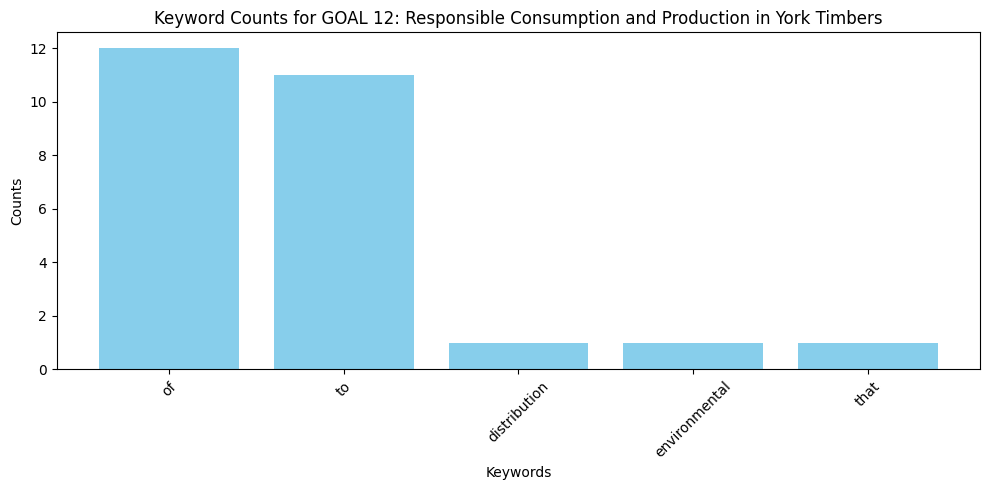

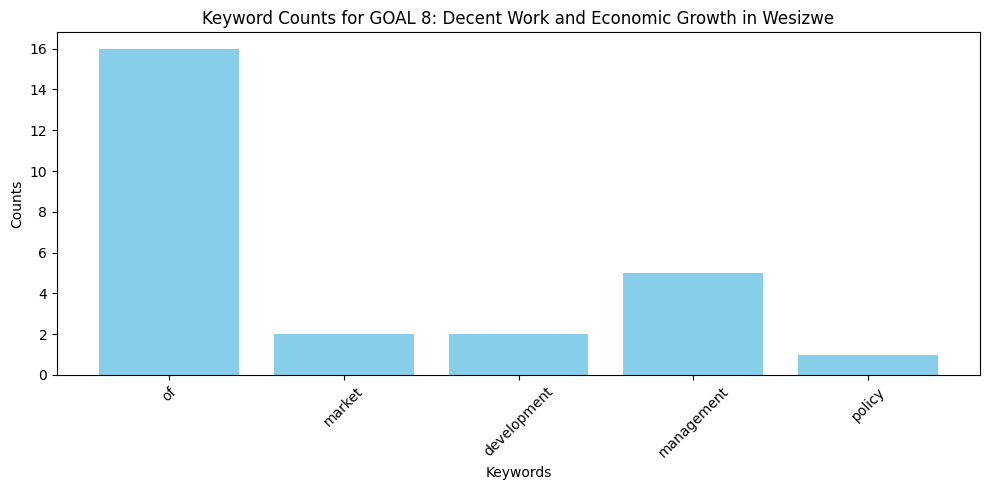

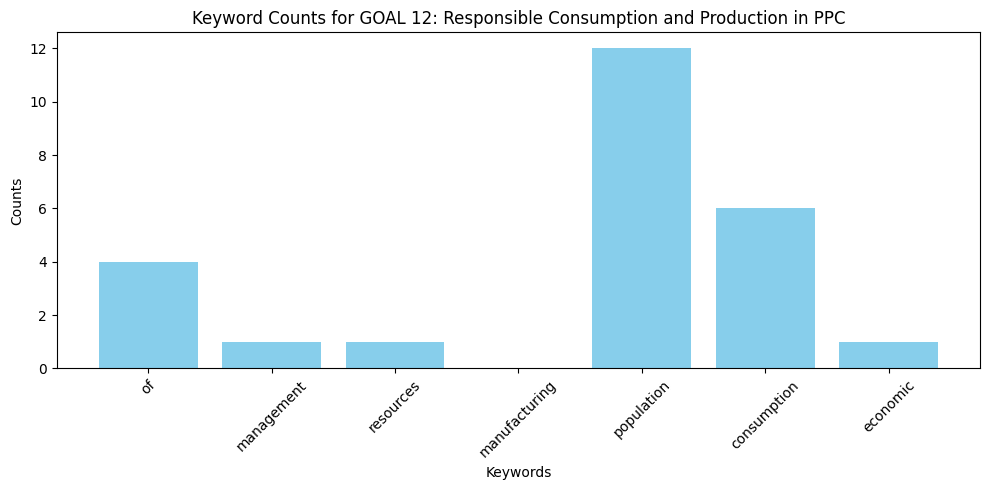

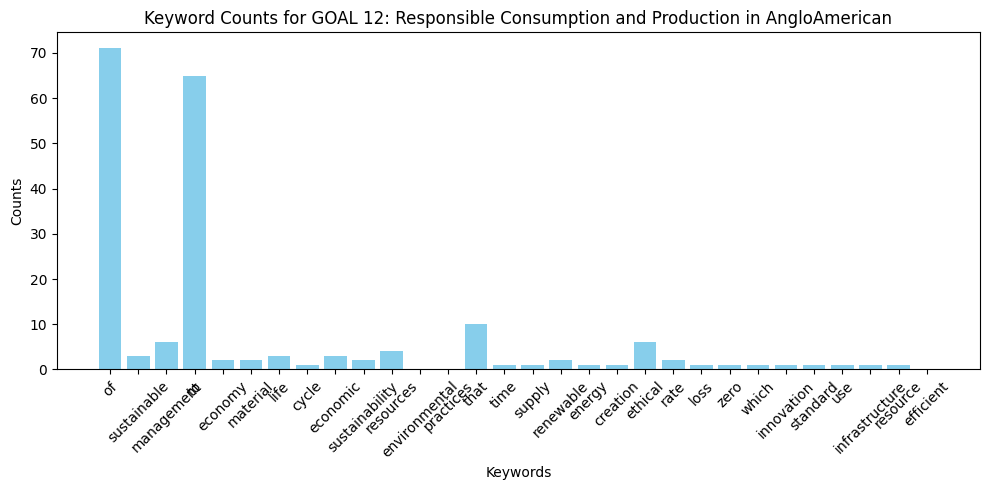

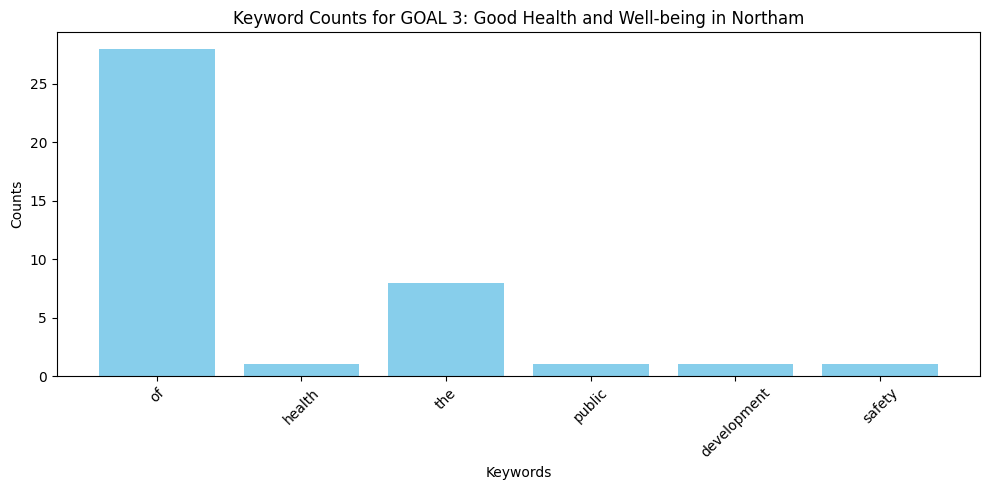

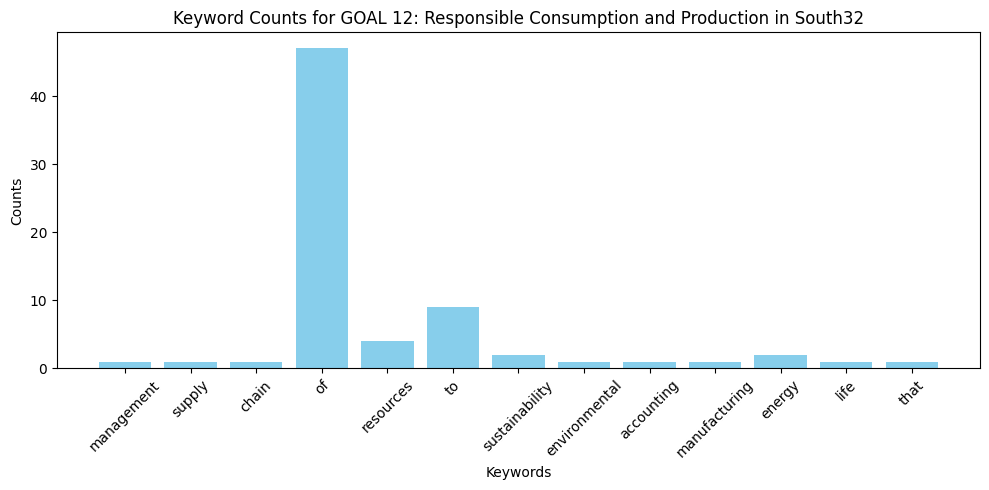

No keywords found for GOAL 11: Sustainable Cities and Communities in Implats


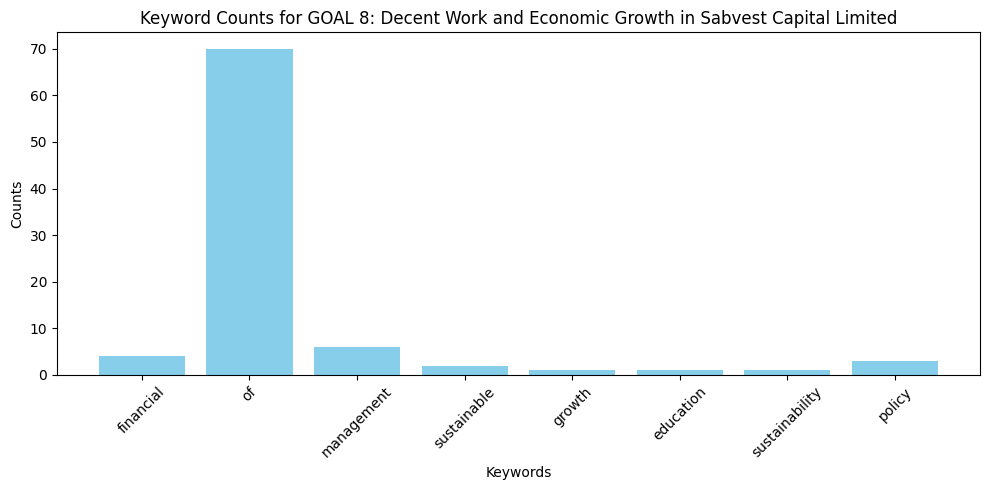

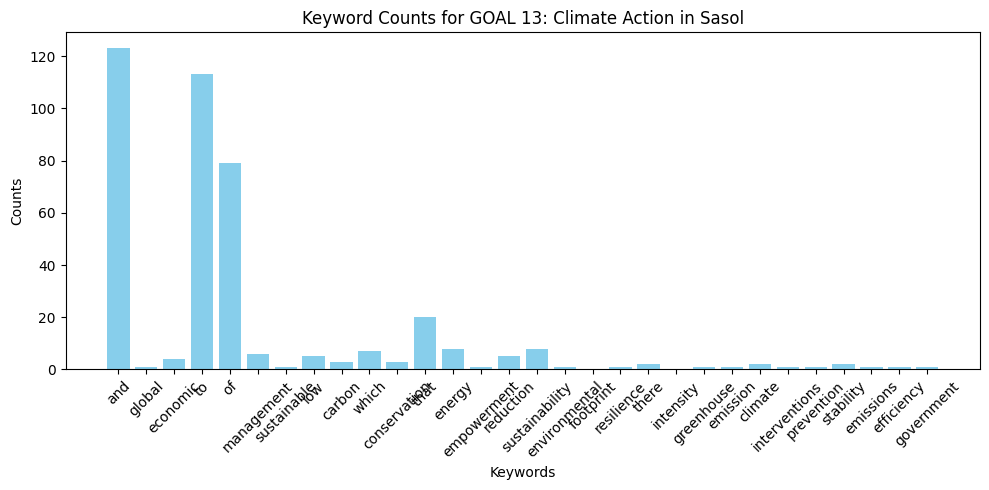

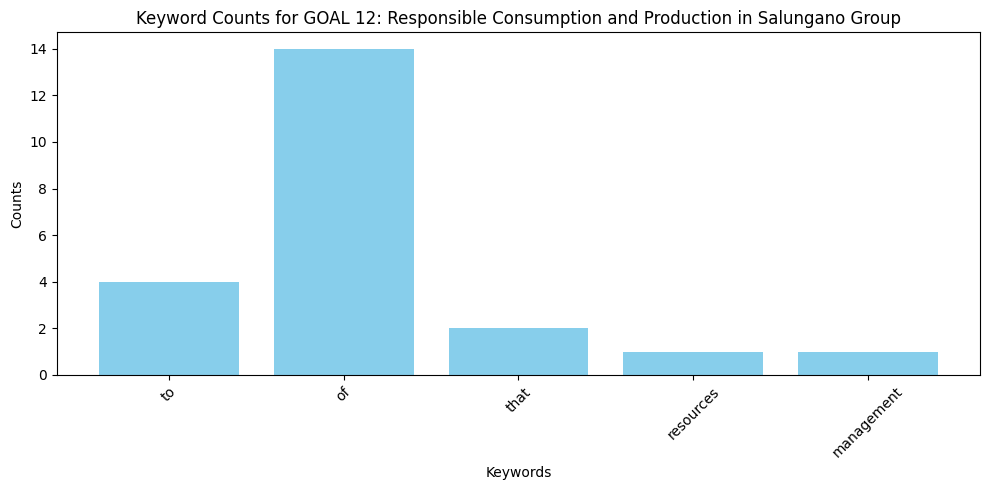

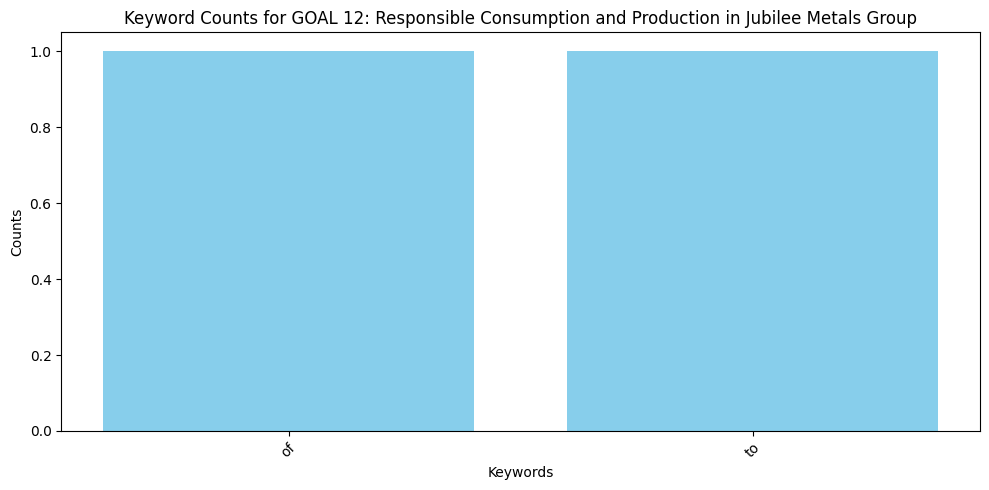

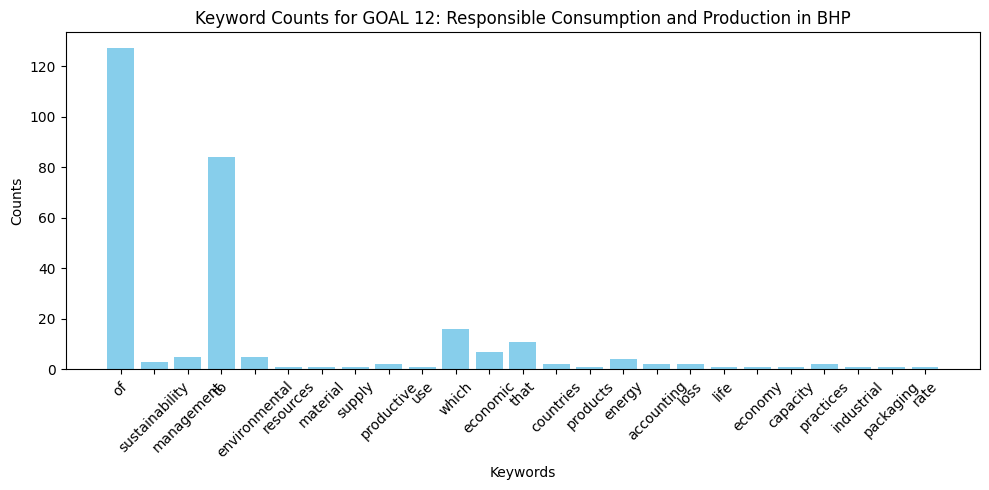

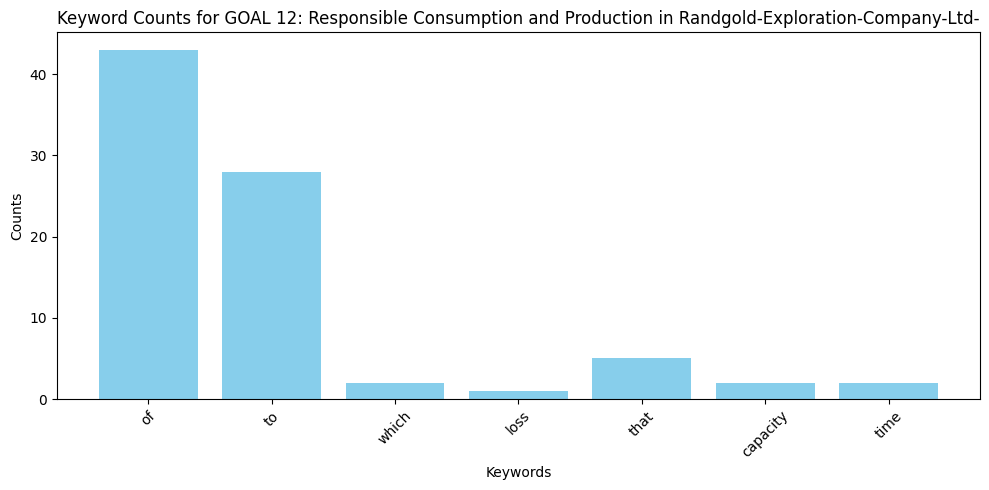

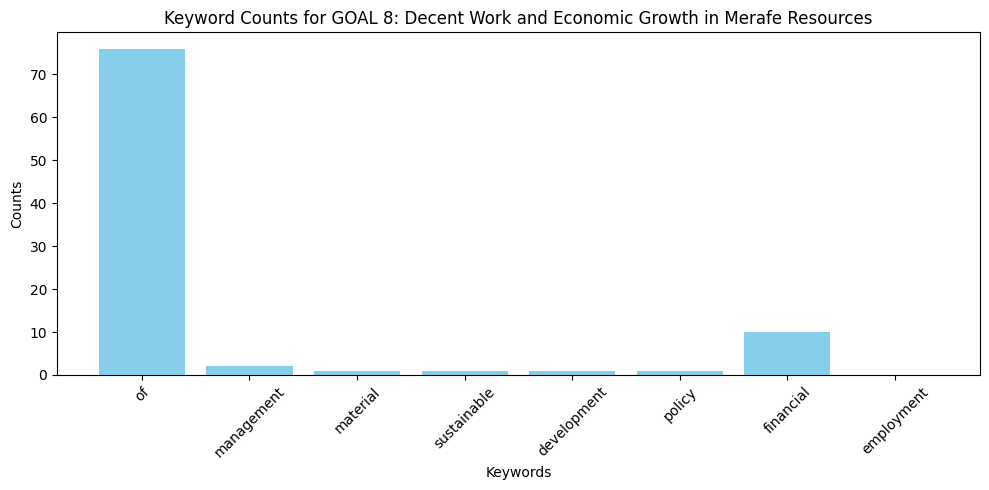

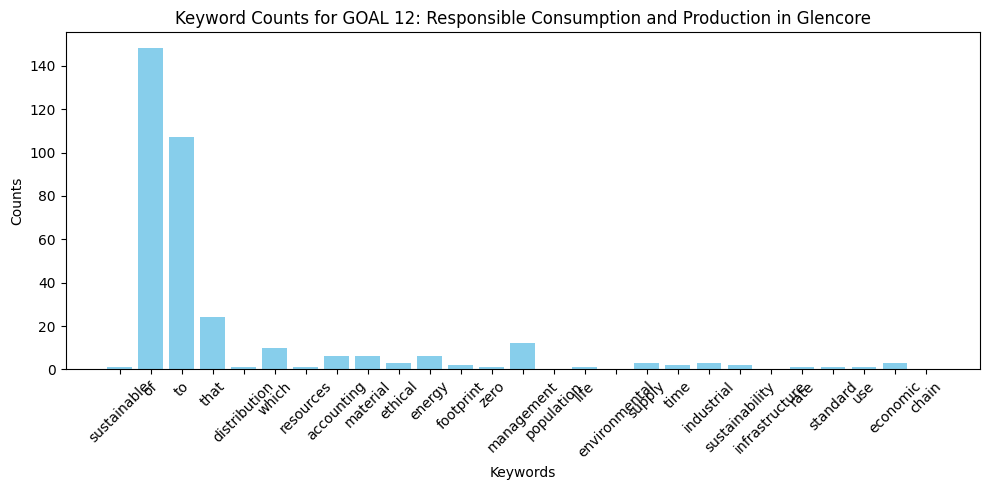

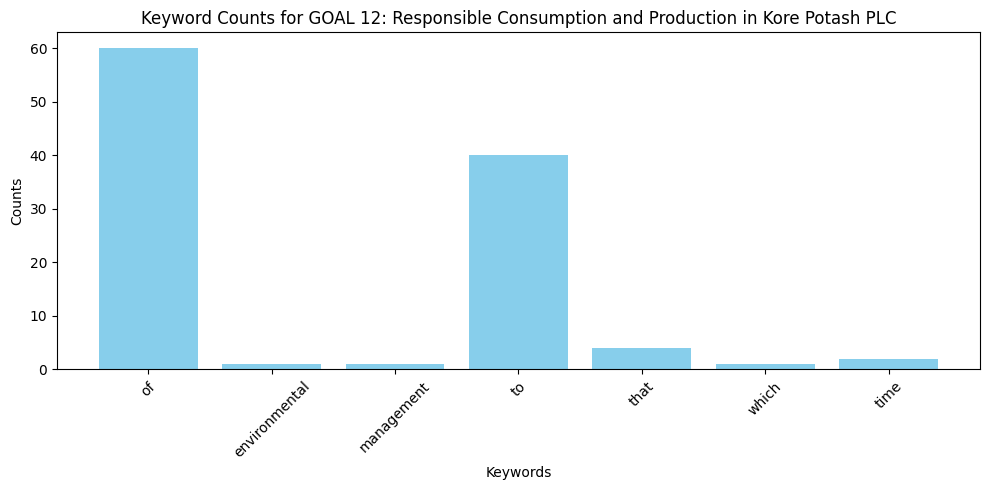

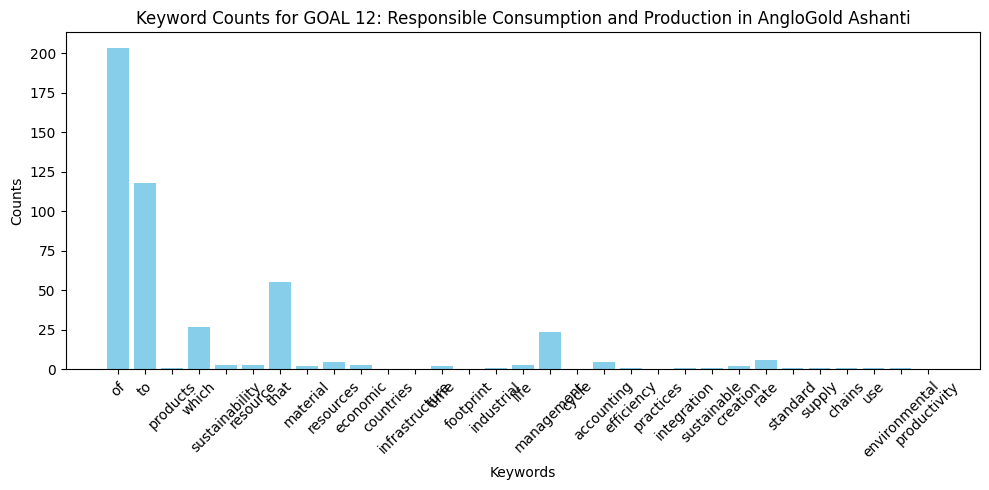

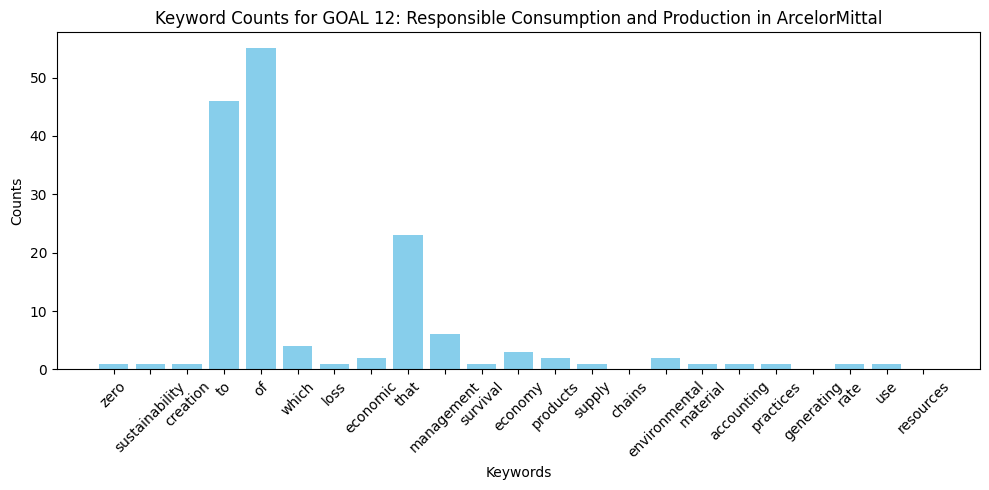

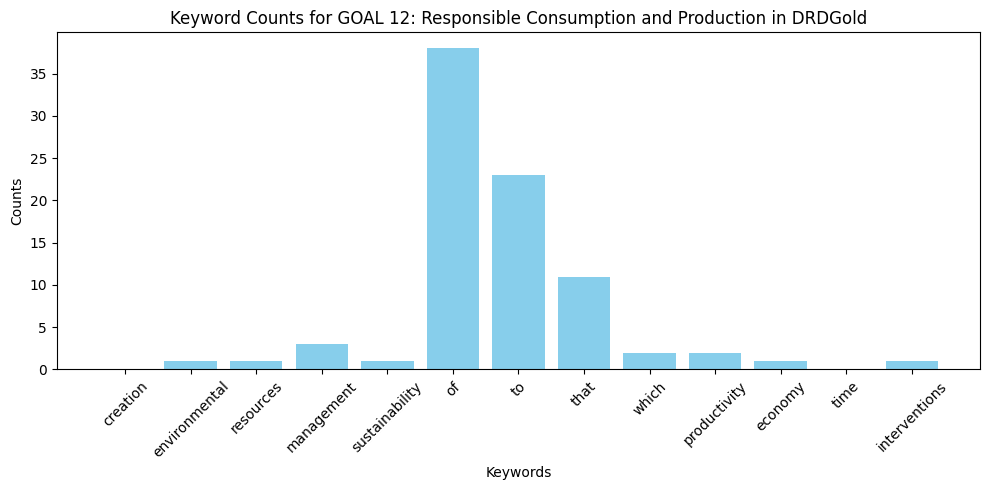

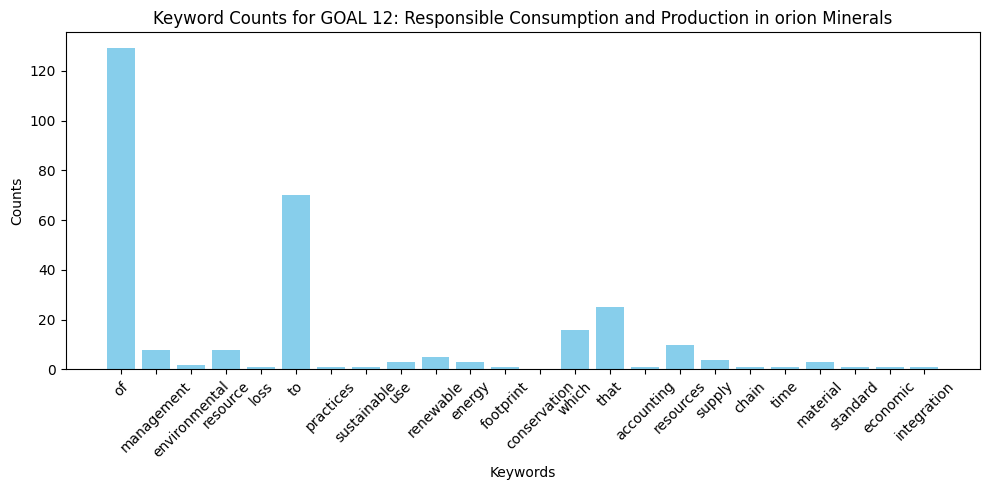

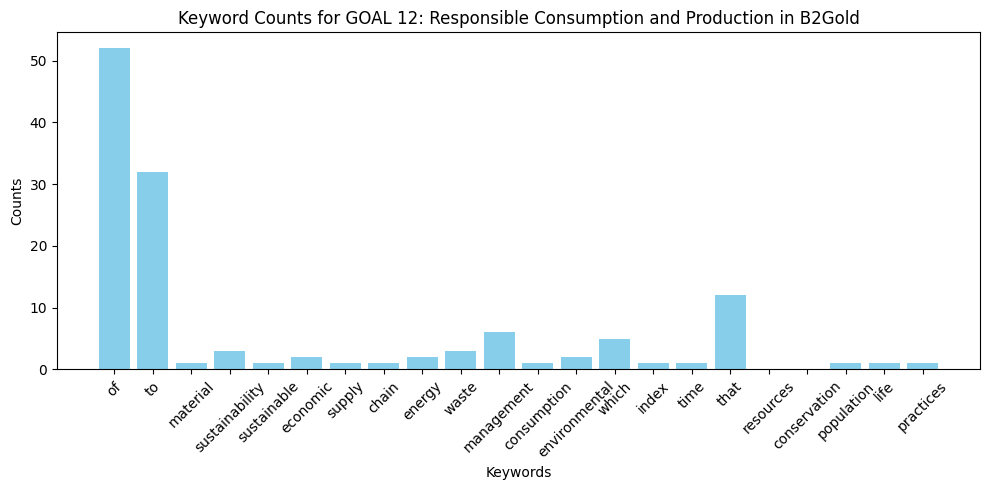

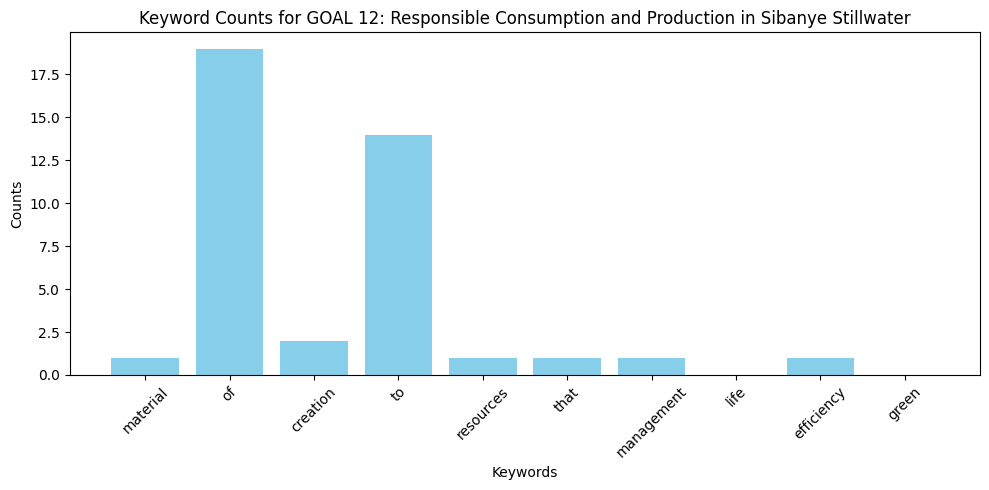

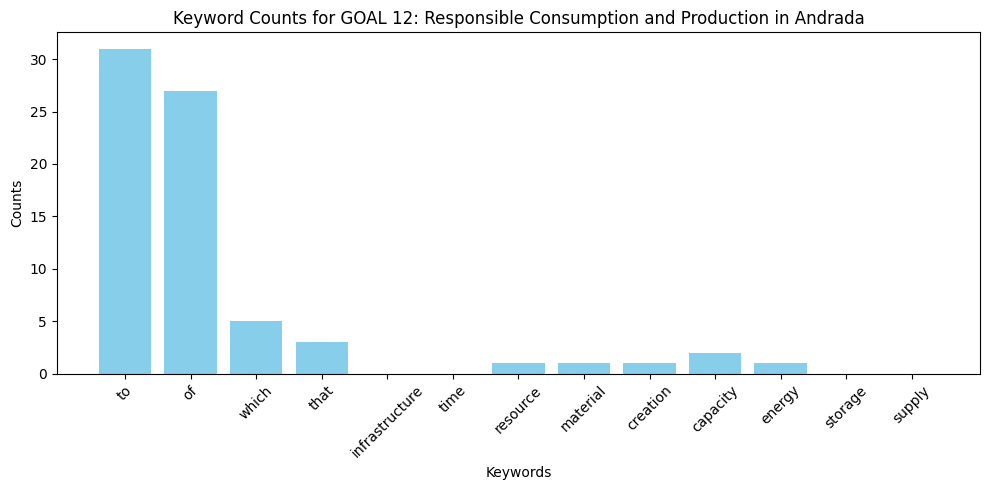

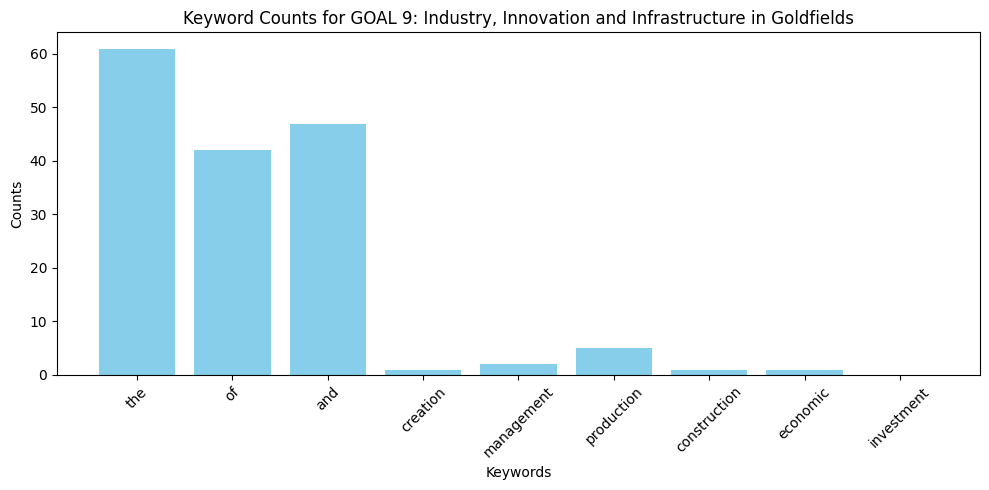

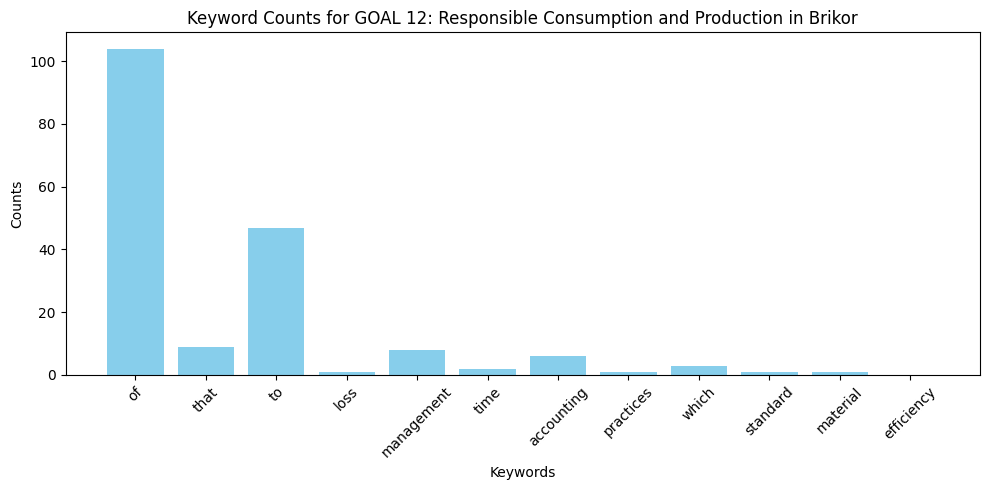

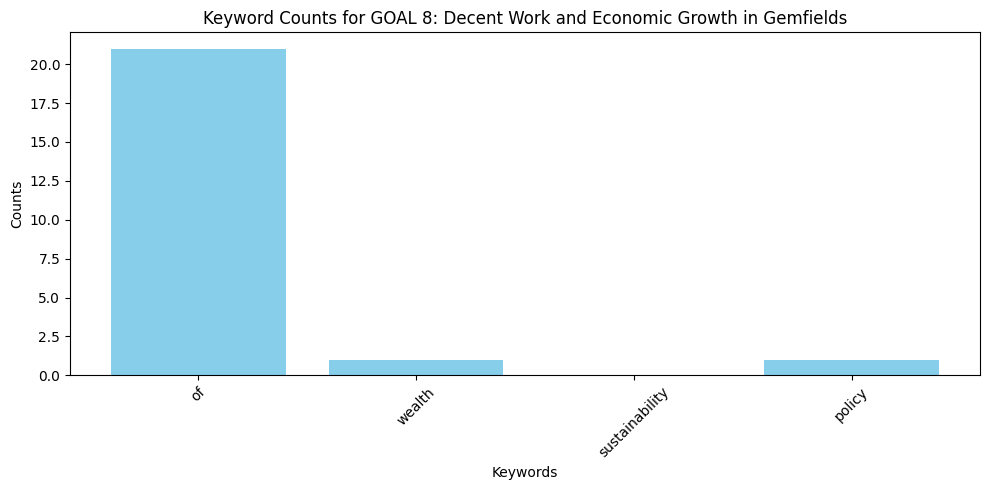

No keywords found for GOAL 11: Sustainable Cities and Communities in ARM-


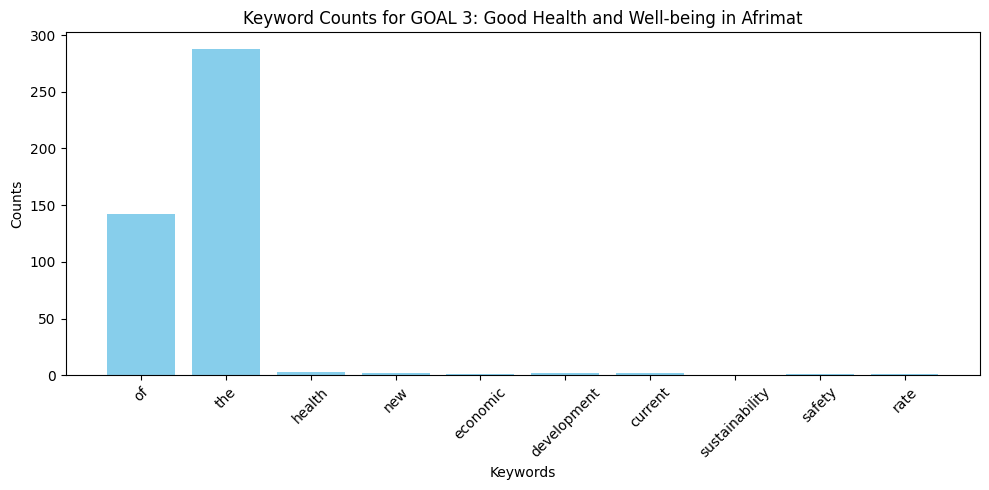

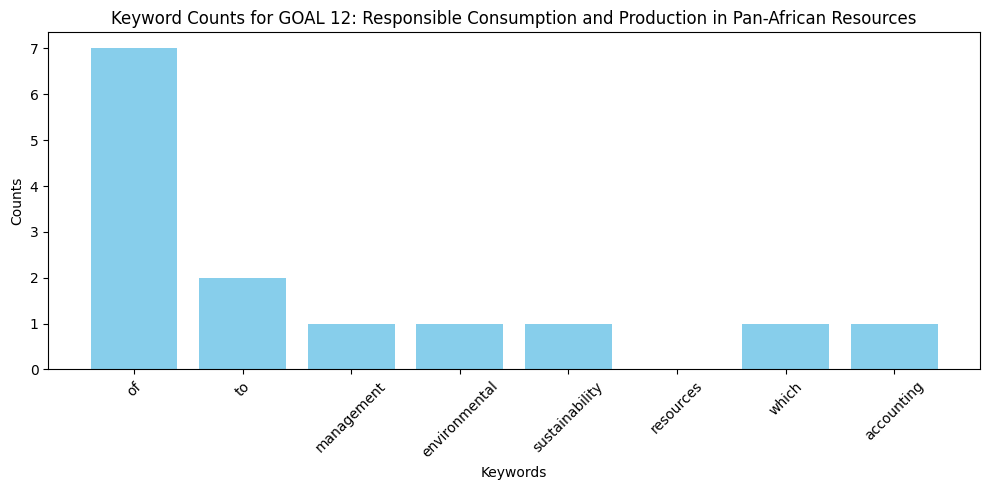

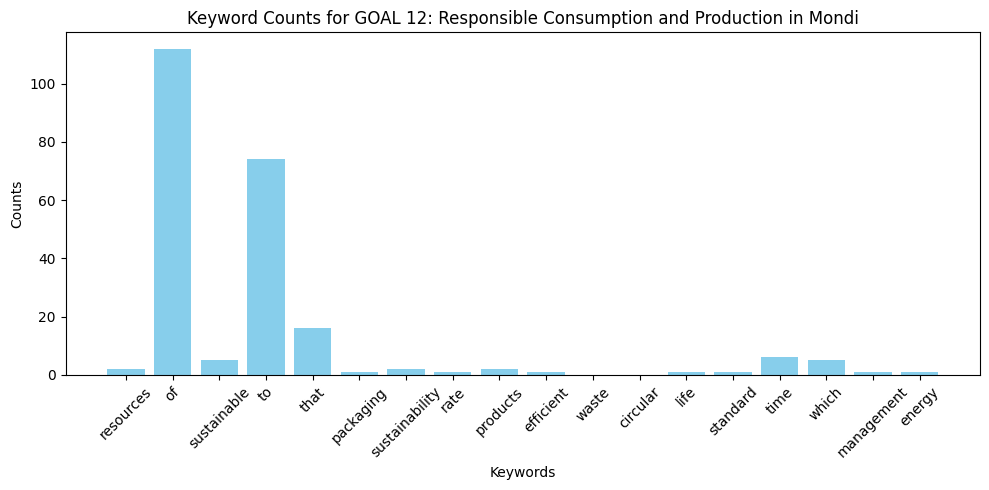

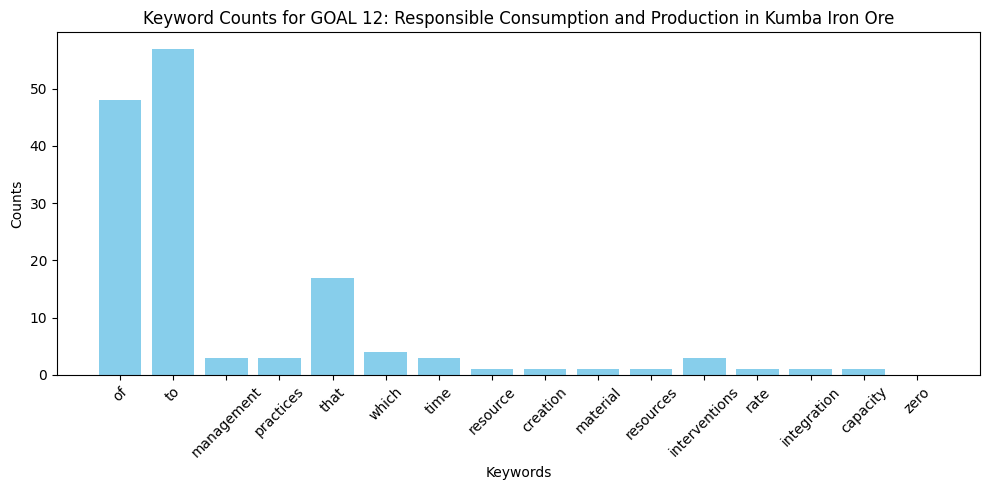

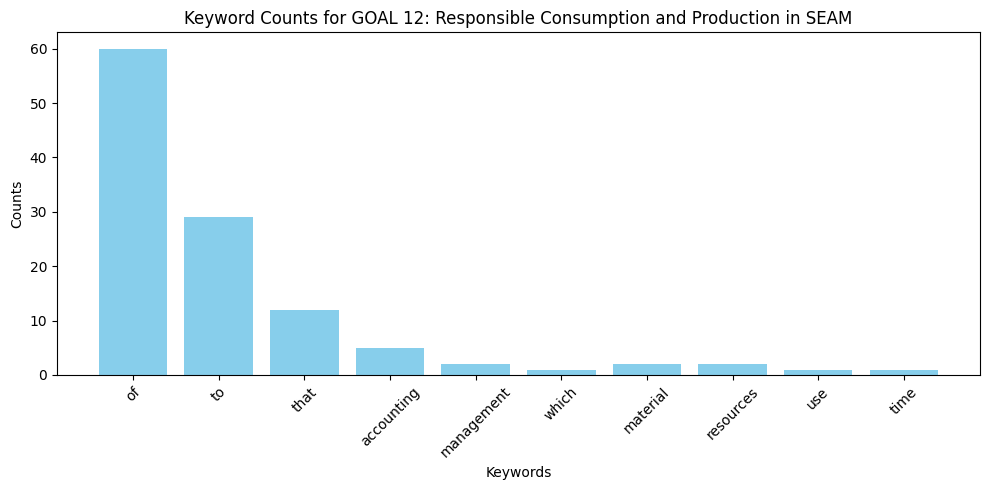

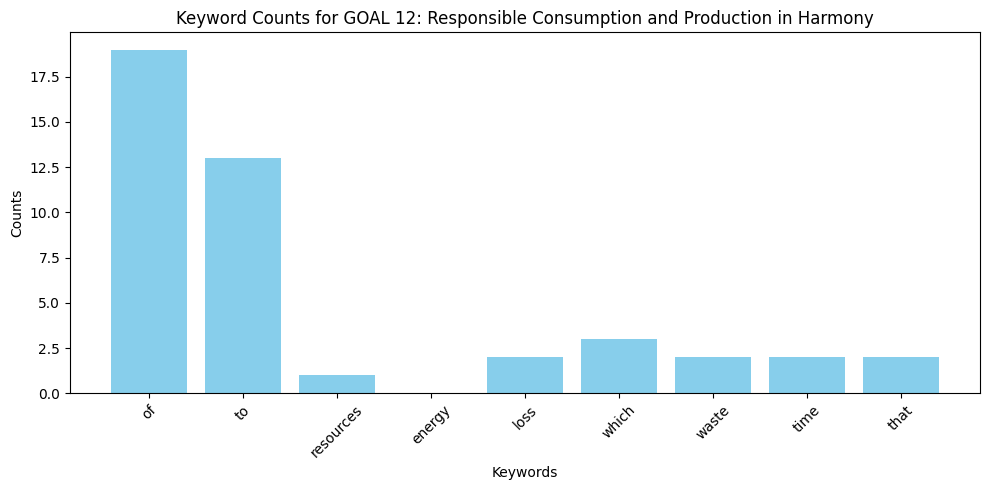

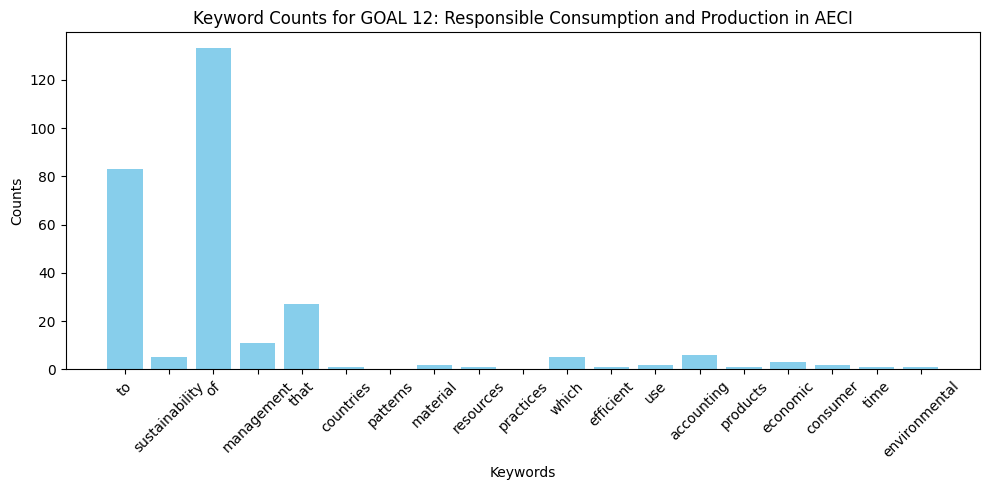

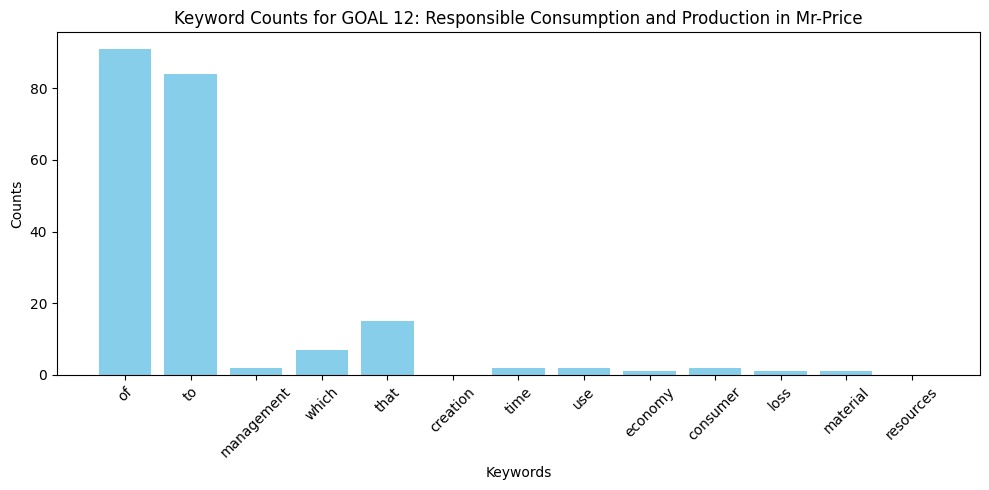

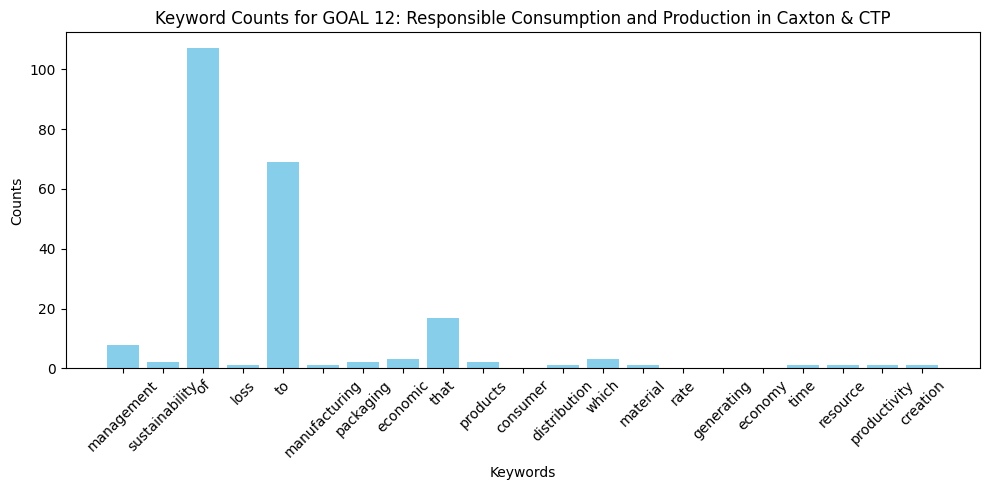

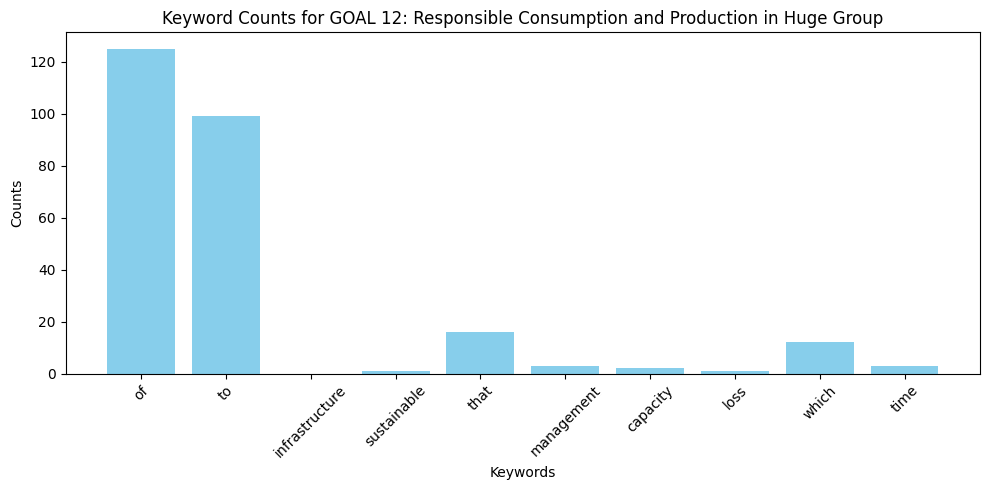

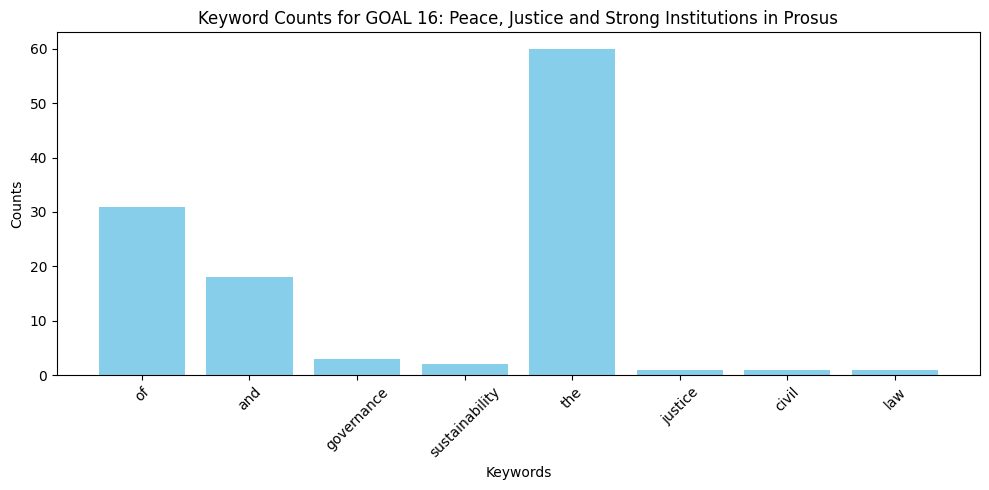

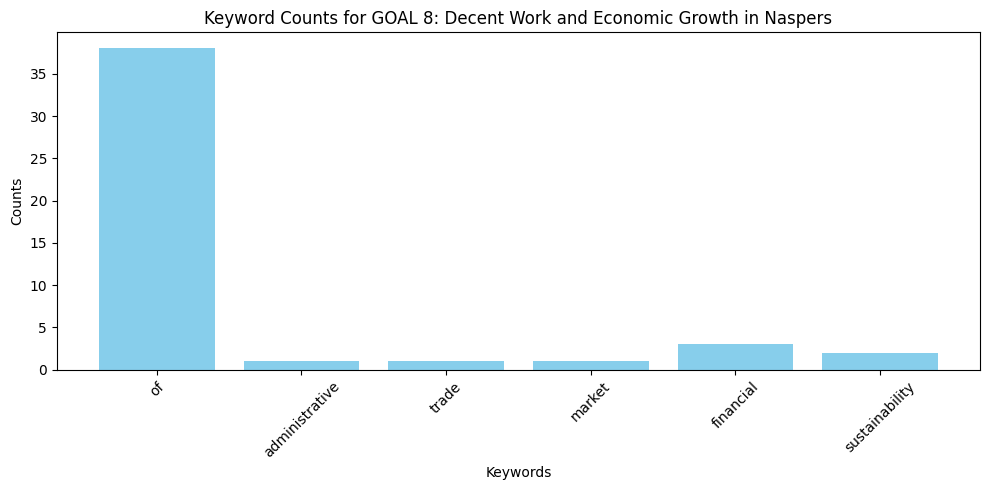

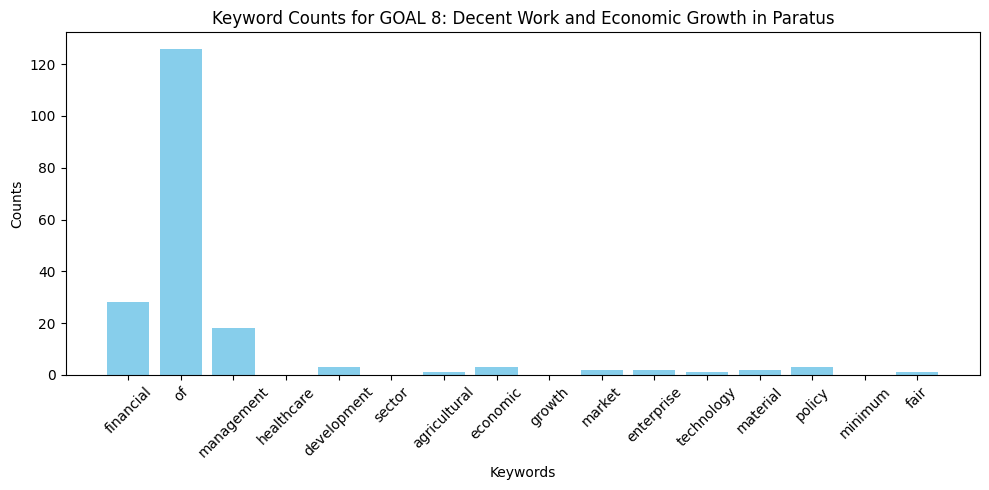

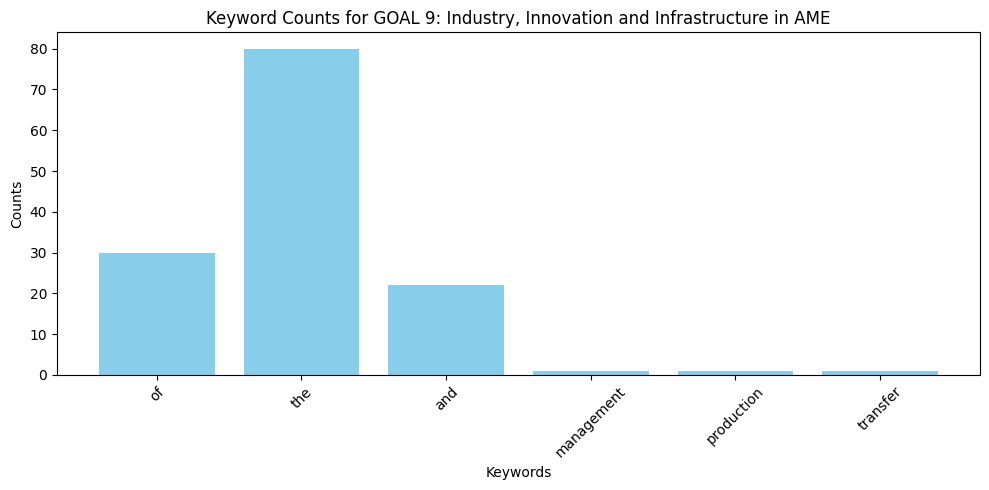

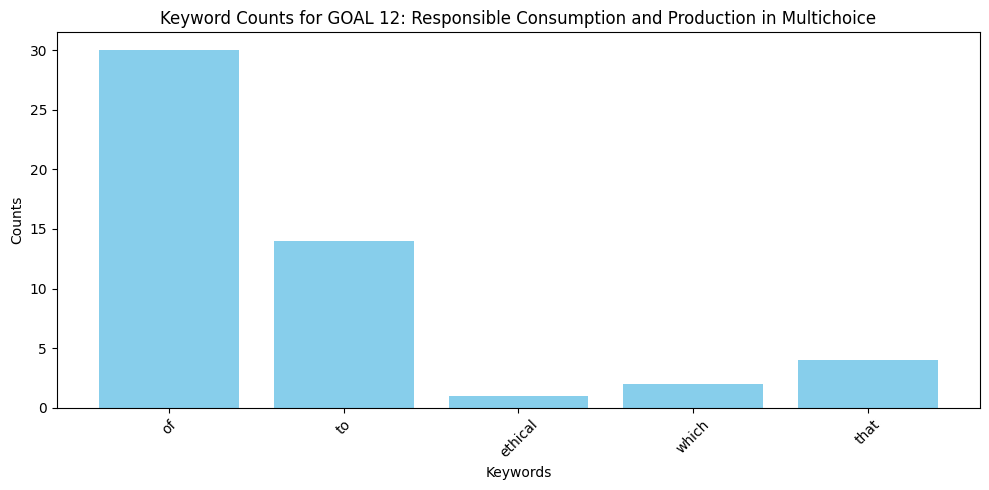

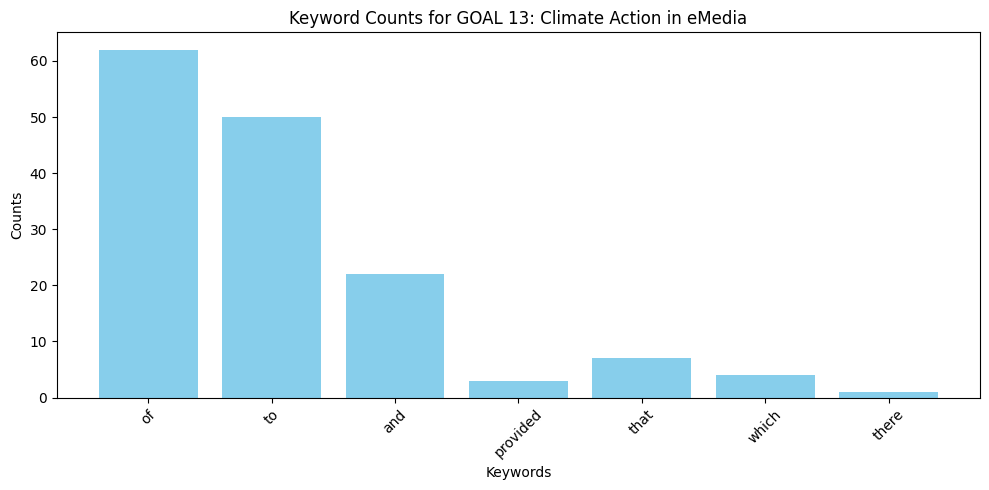

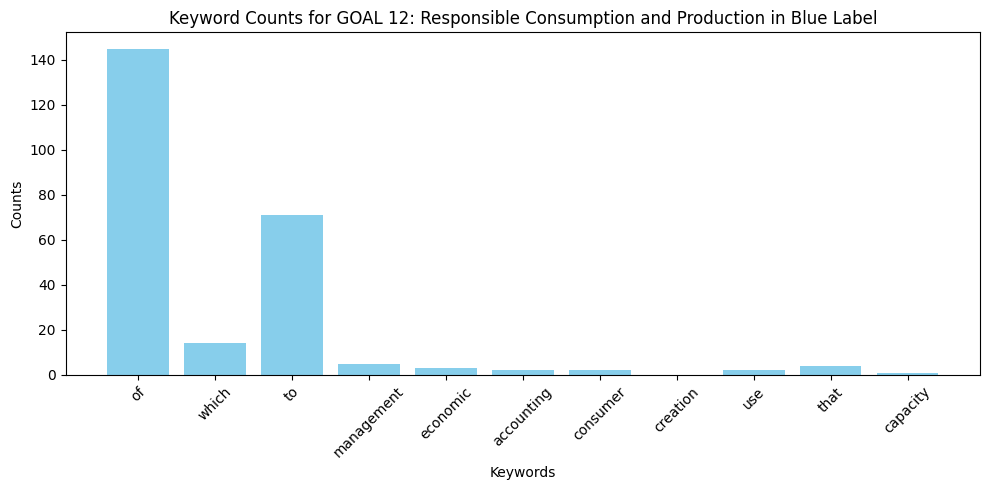

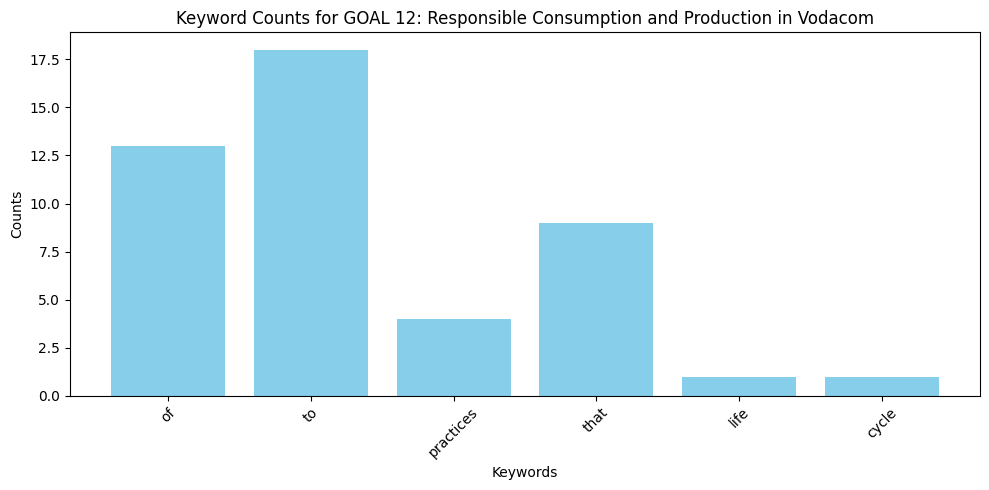

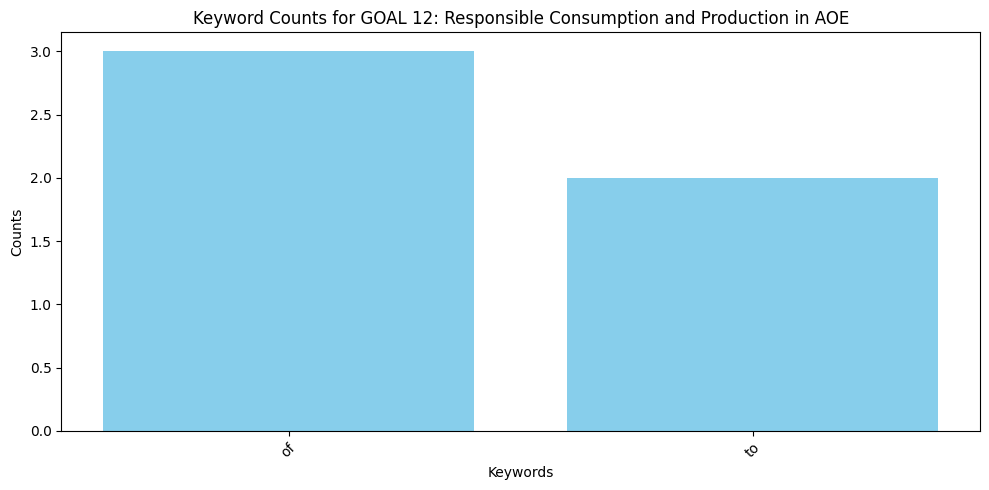

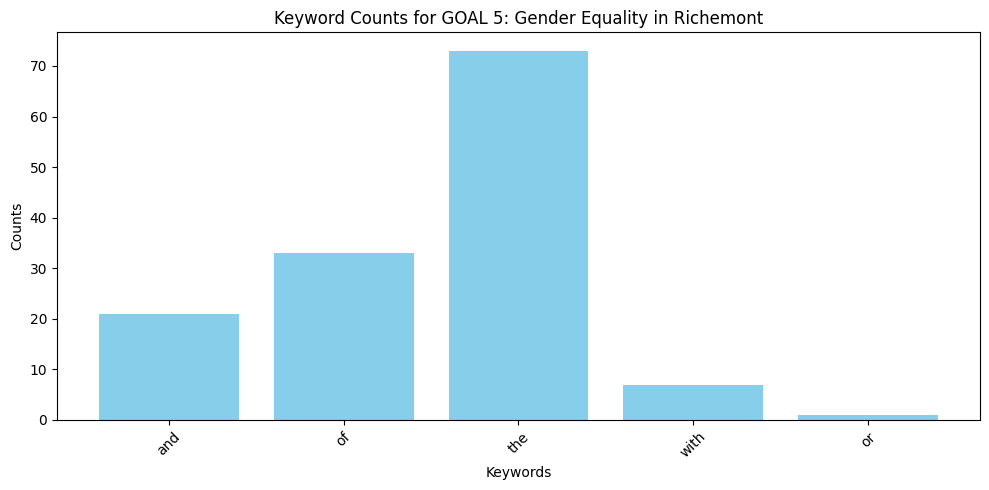

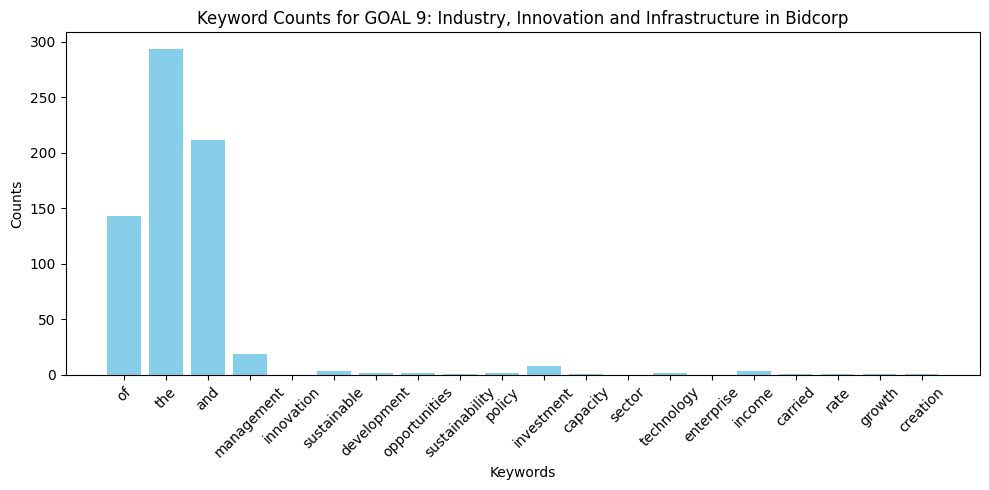

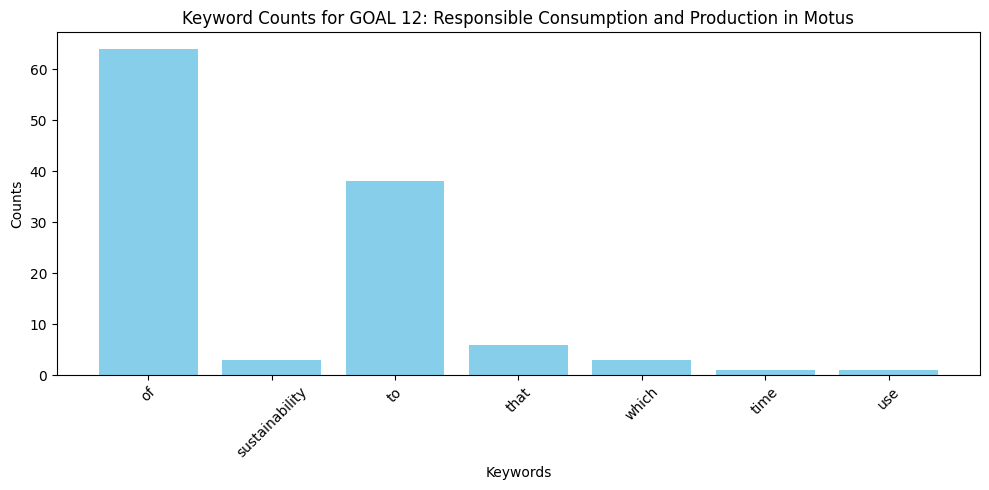

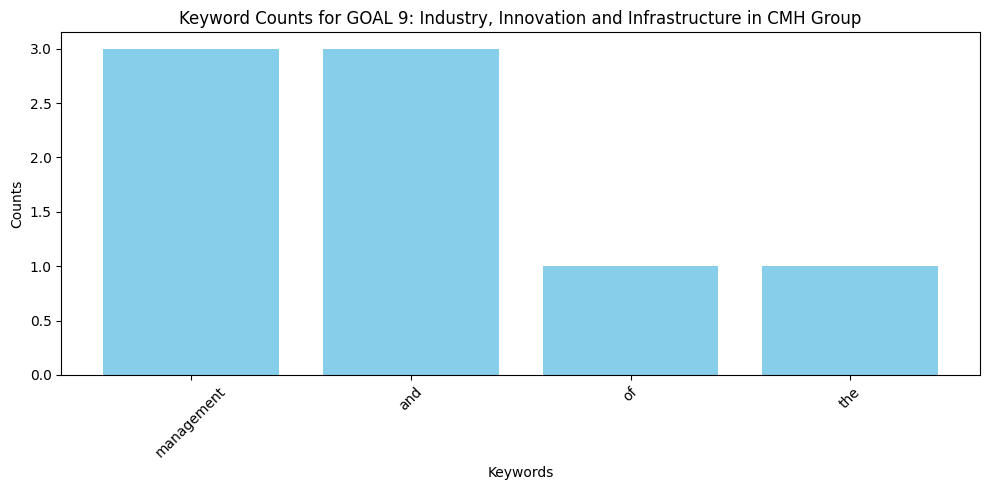

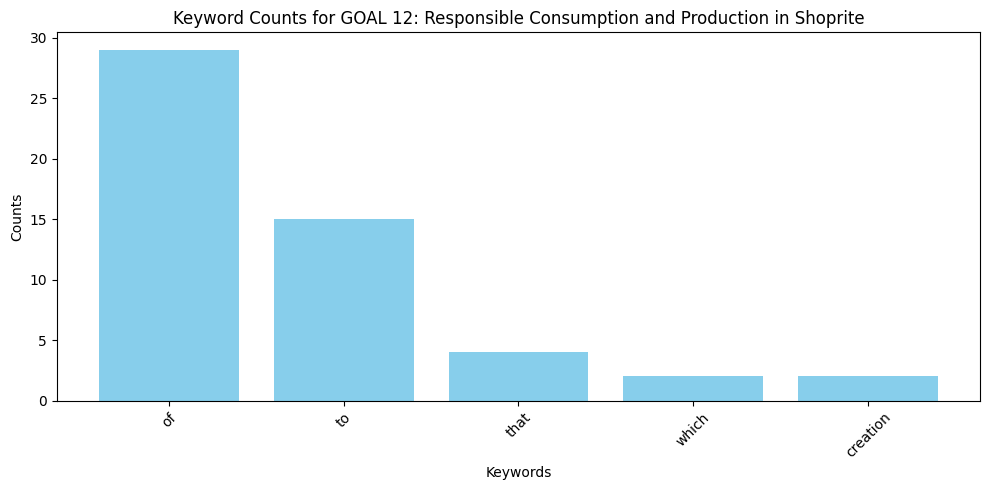

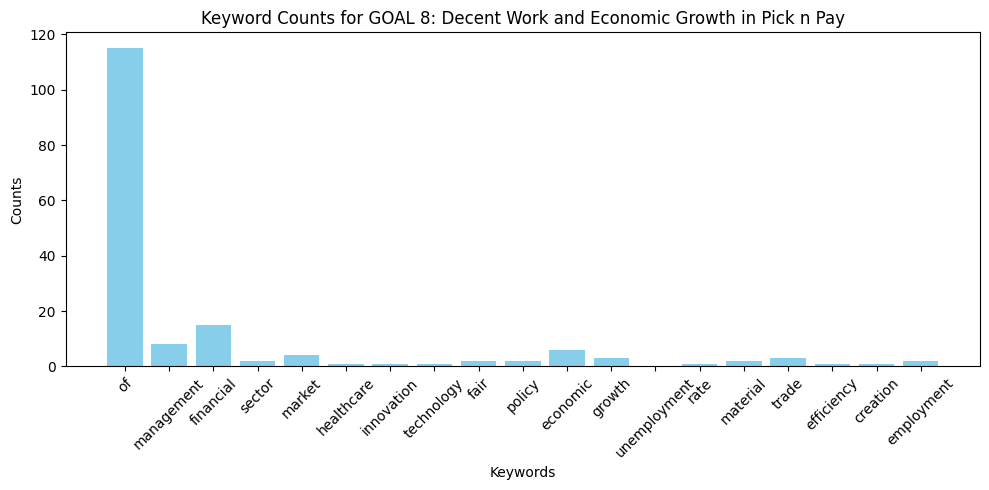

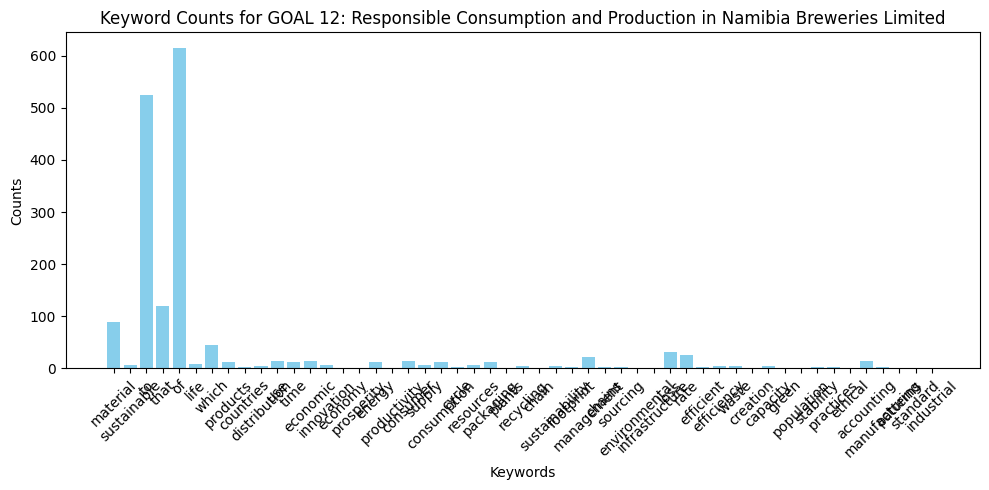

No keywords found for GOAL 12: Responsible Consumption and Production in City Lodge Hotels


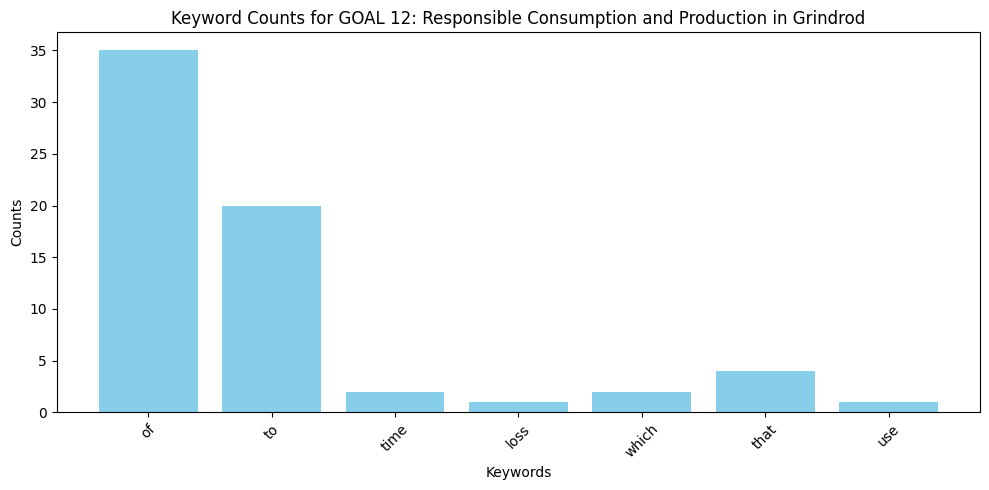

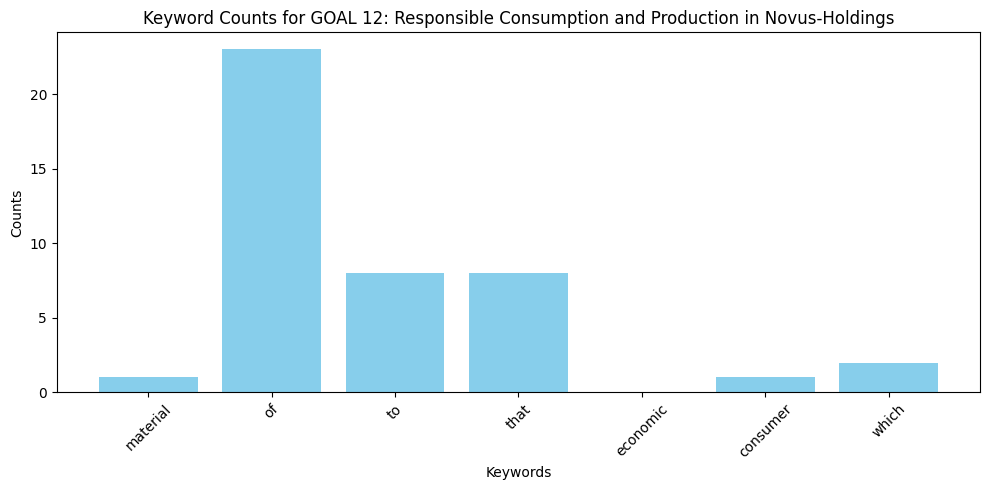

No keywords found for GOAL 11: Sustainable Cities and Communities in Homechoice


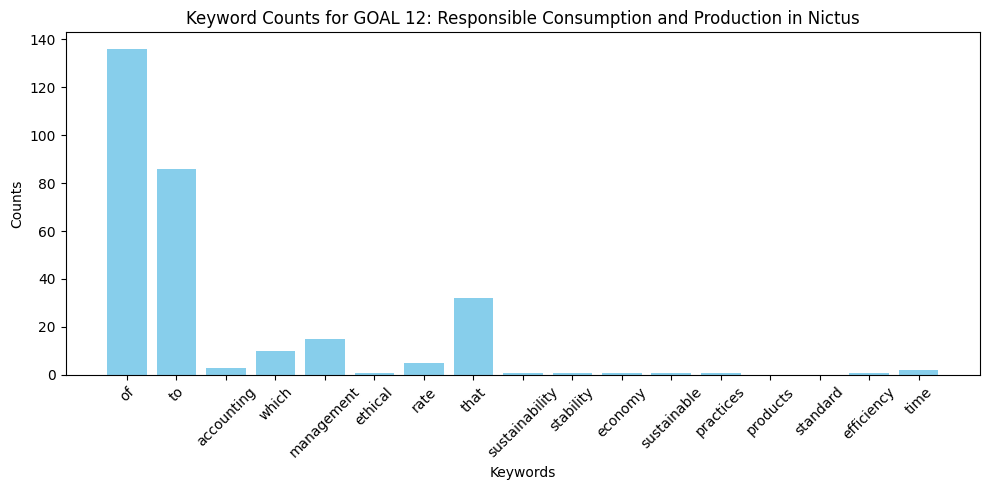

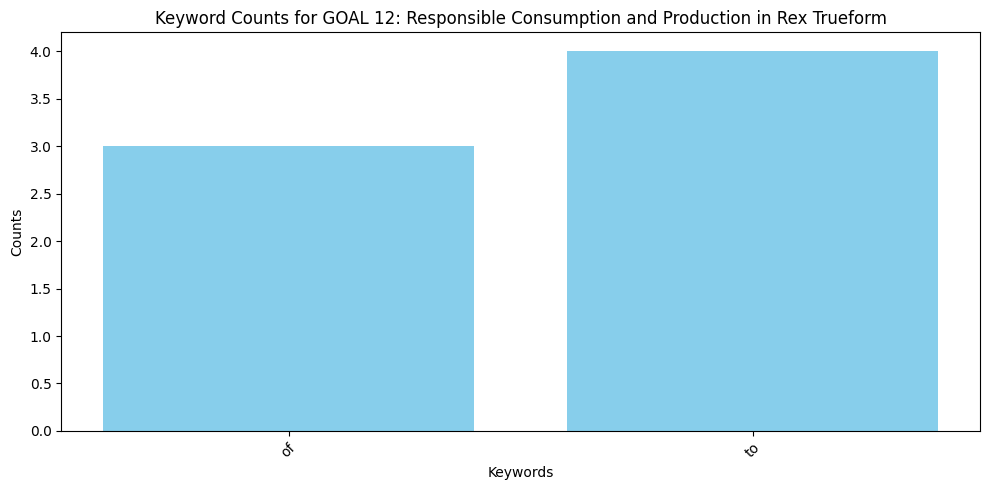

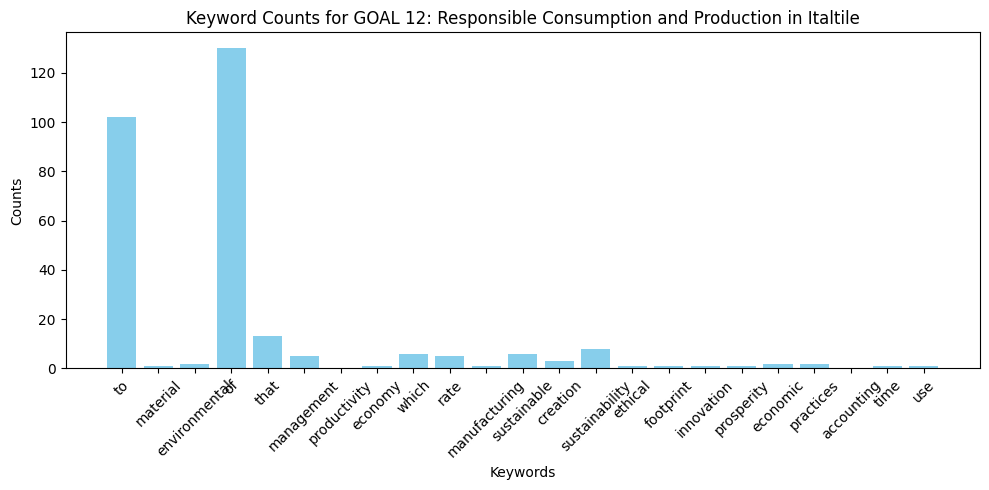

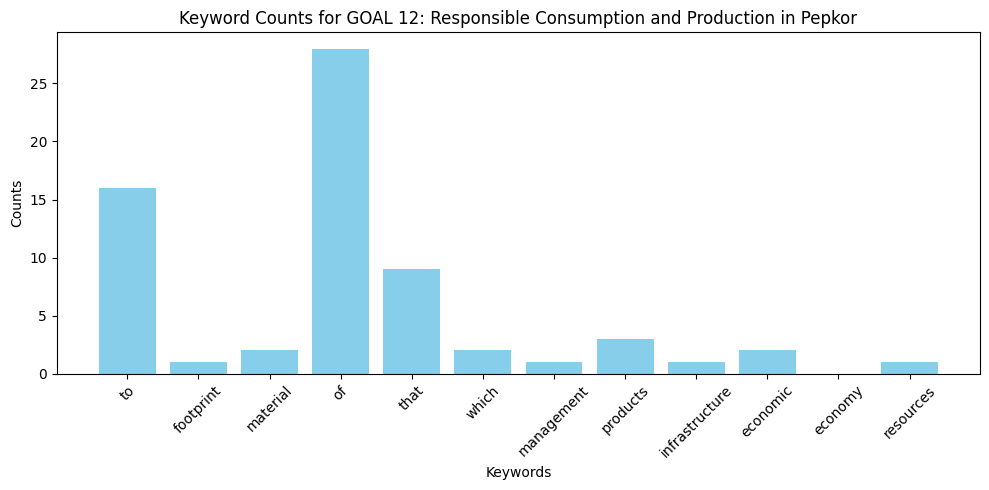

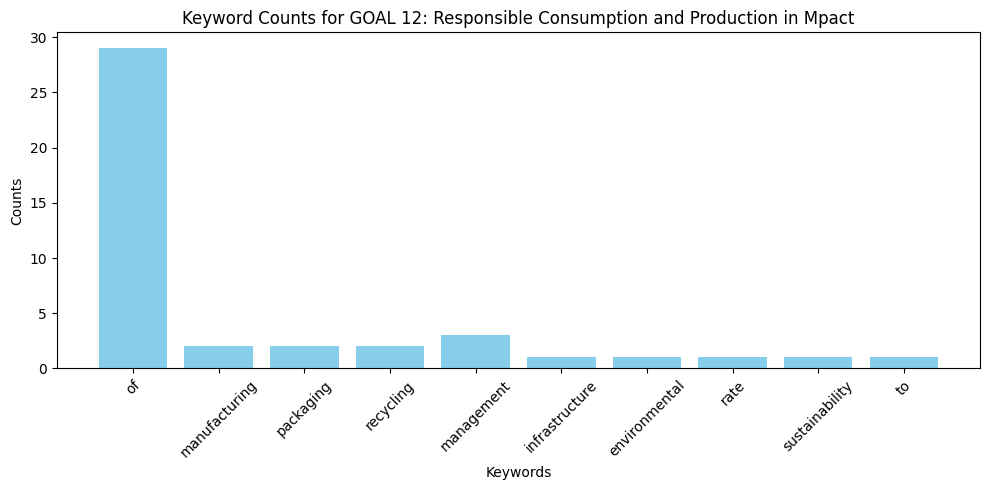

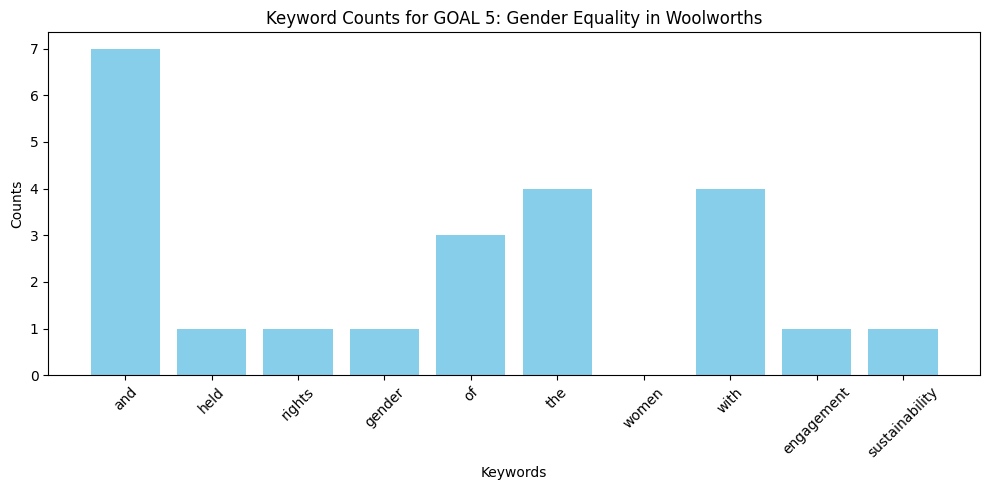

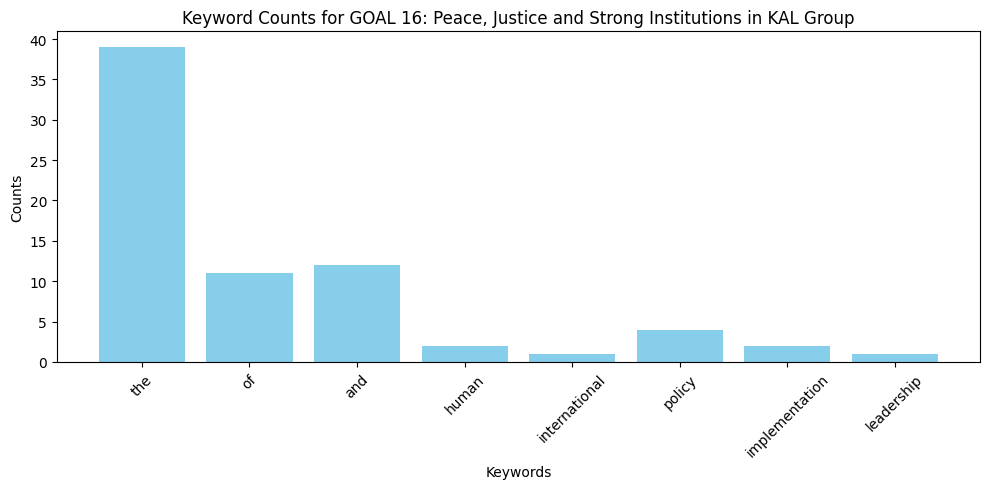

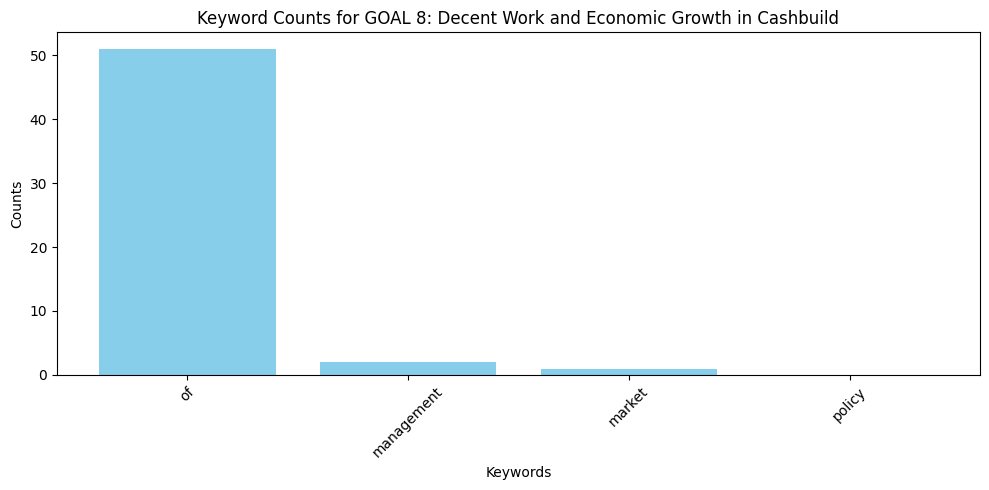

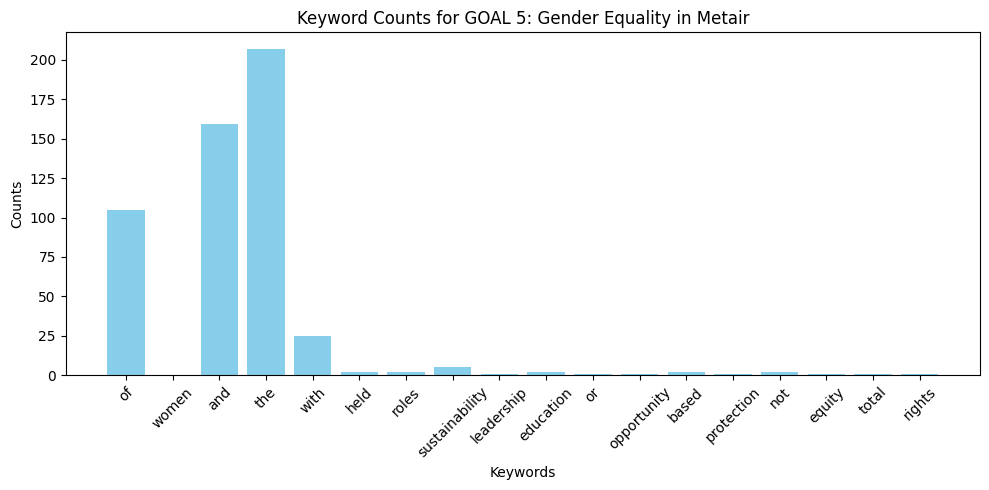

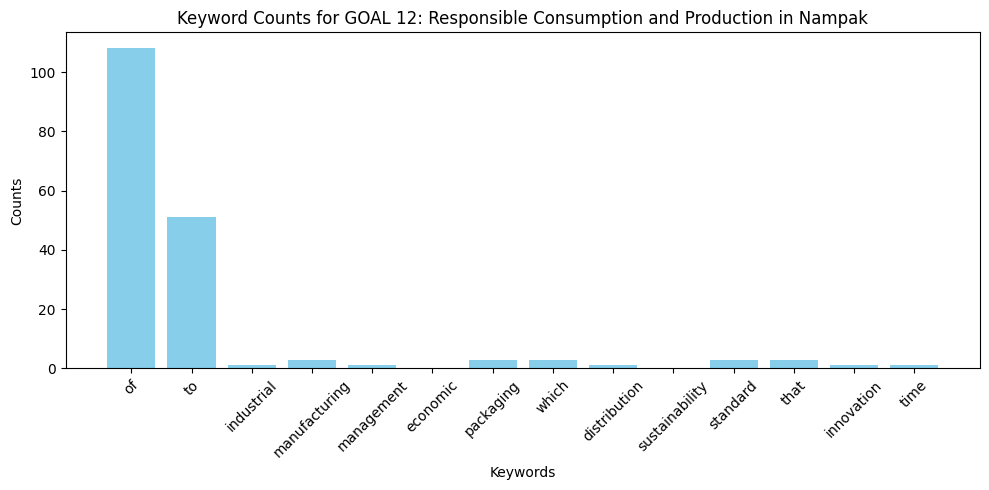

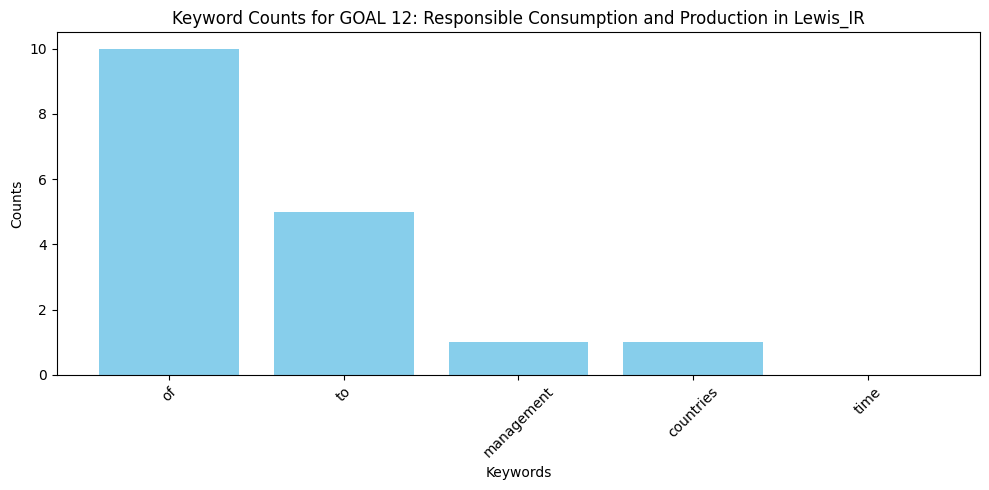

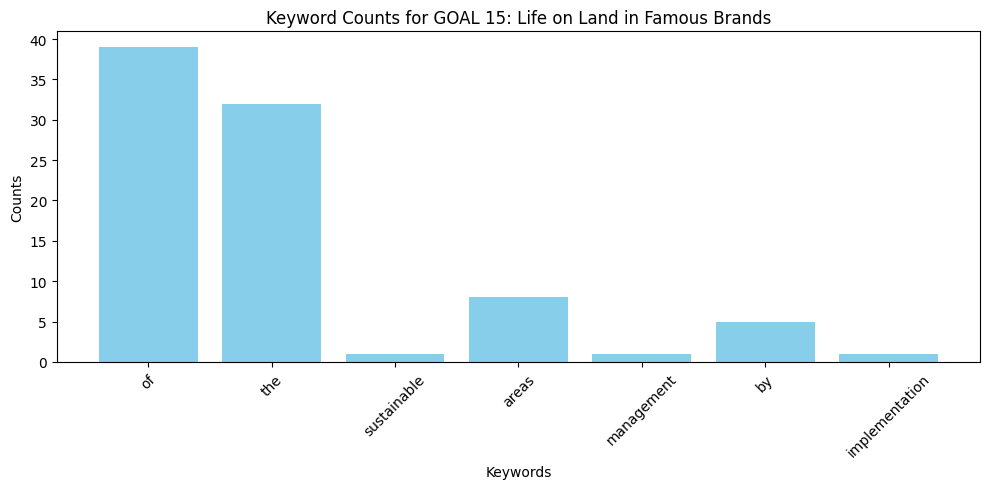

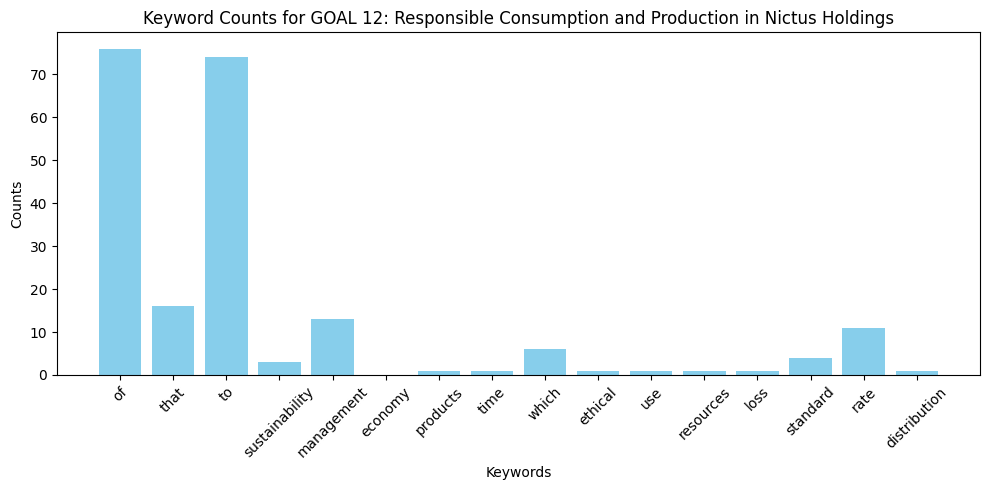

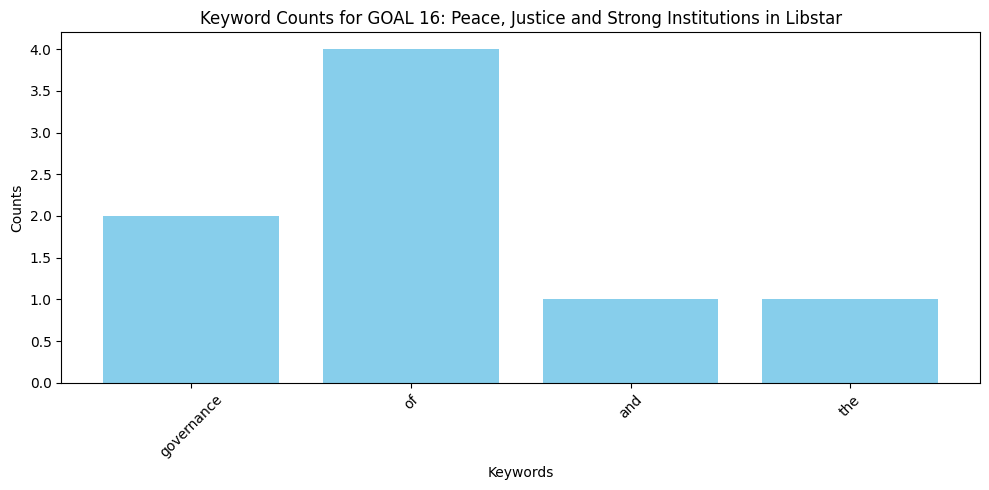

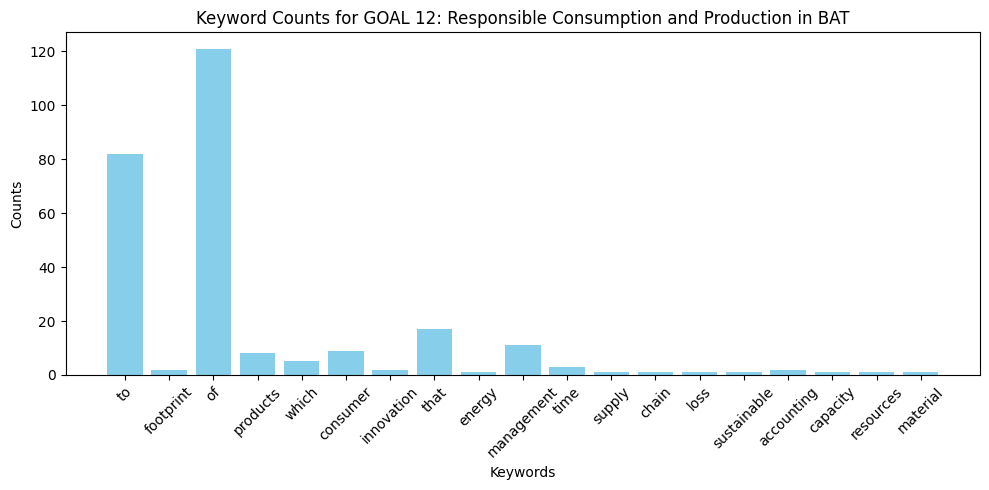

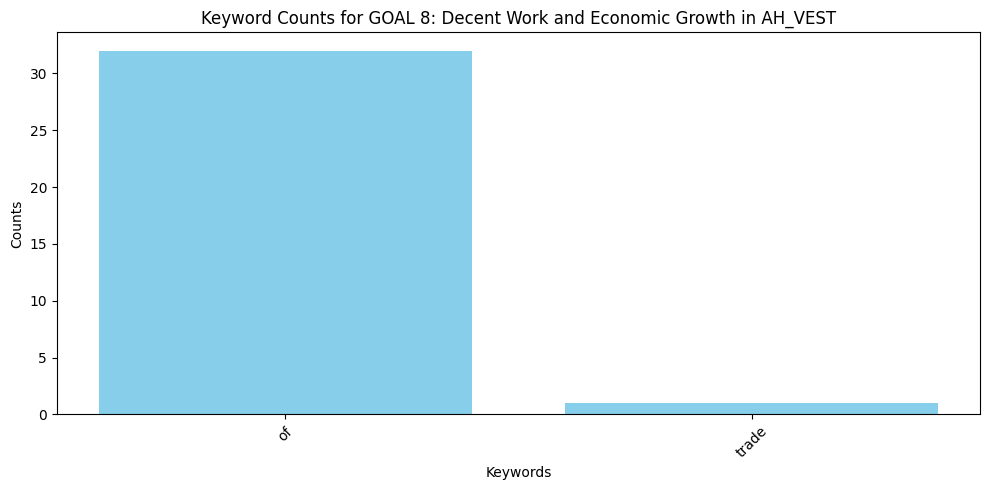

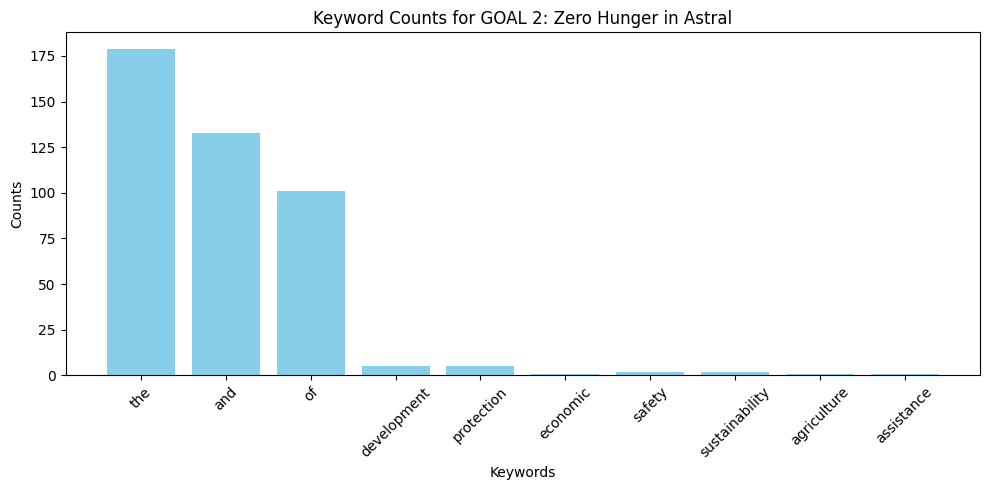

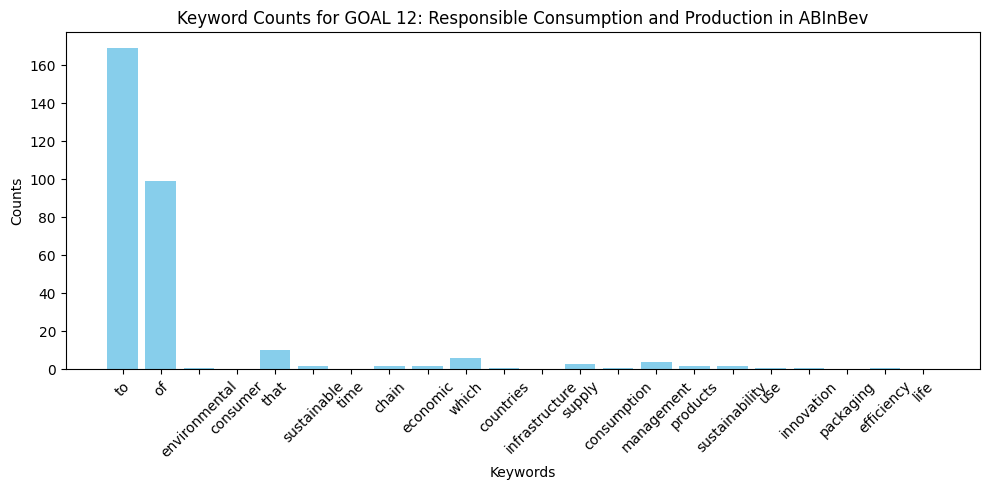

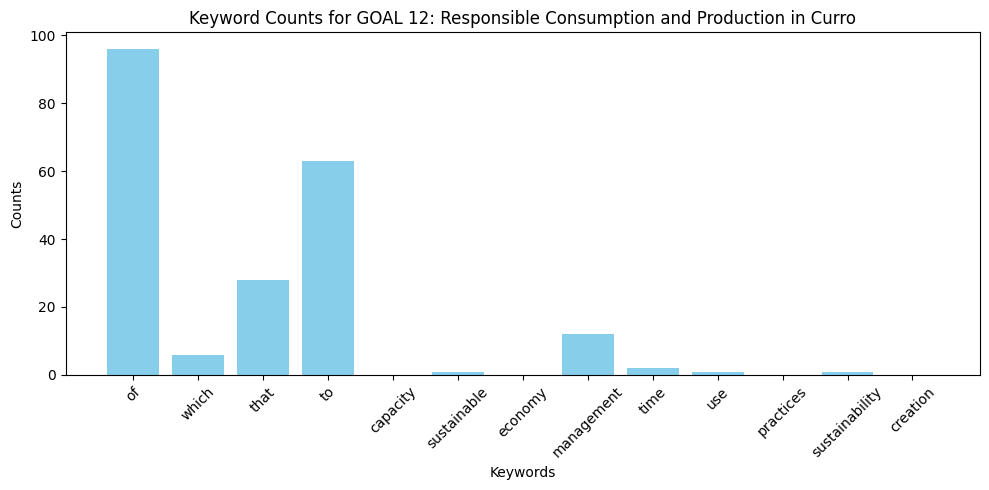

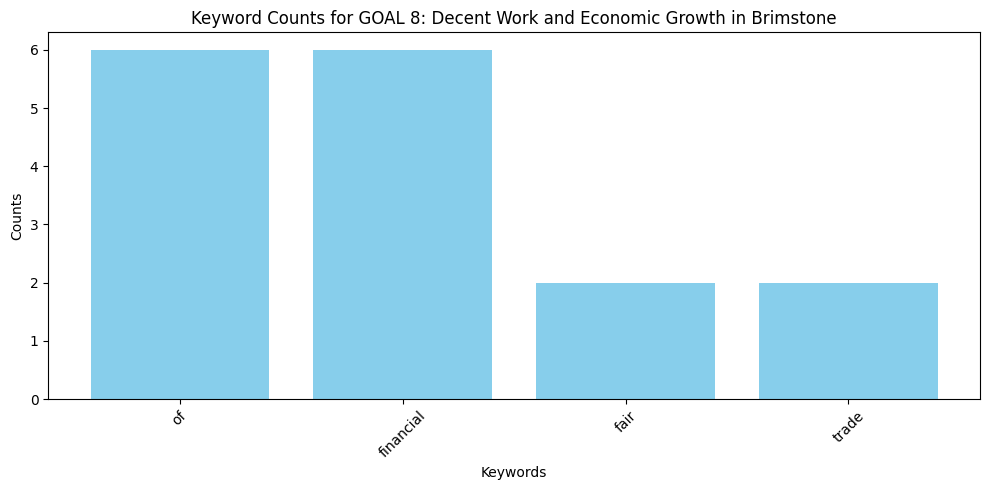

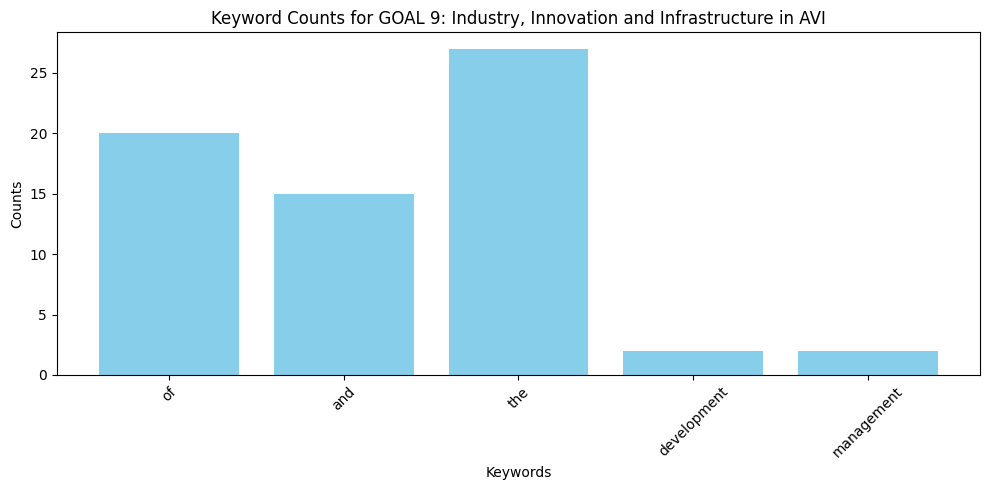

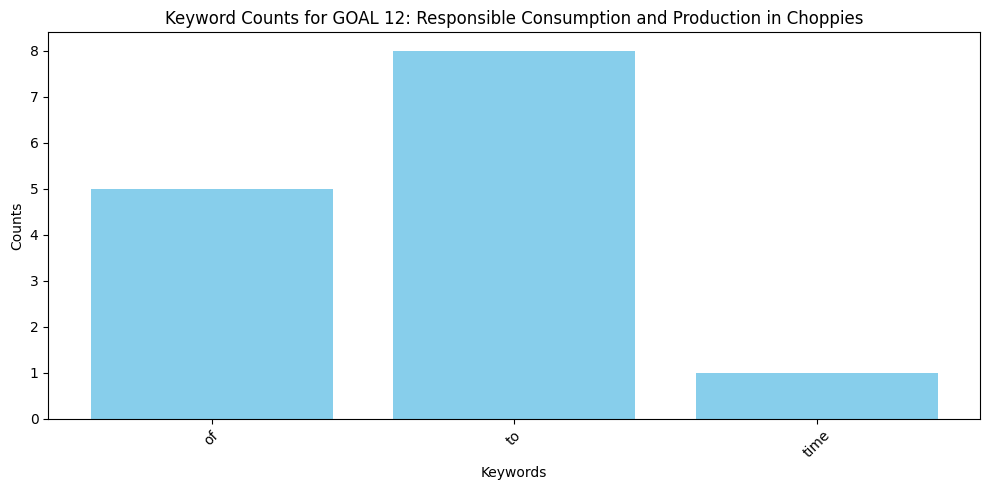

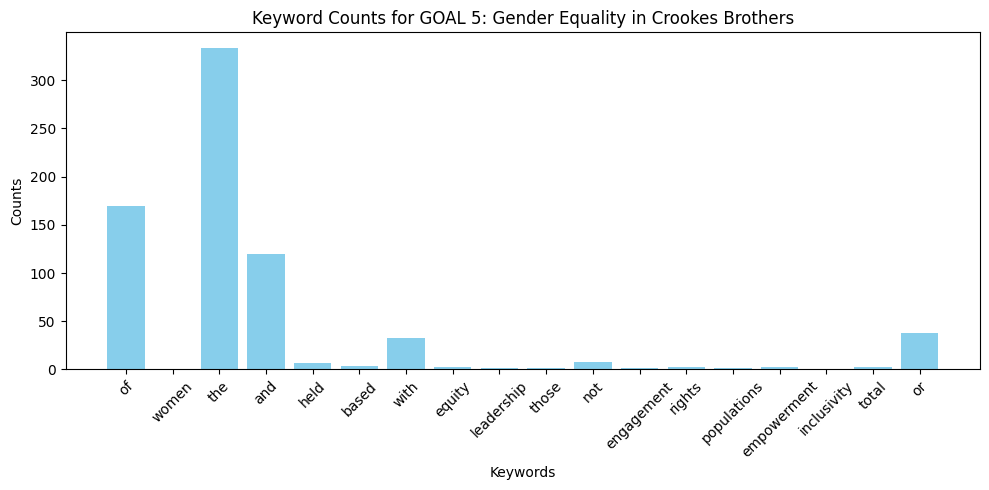

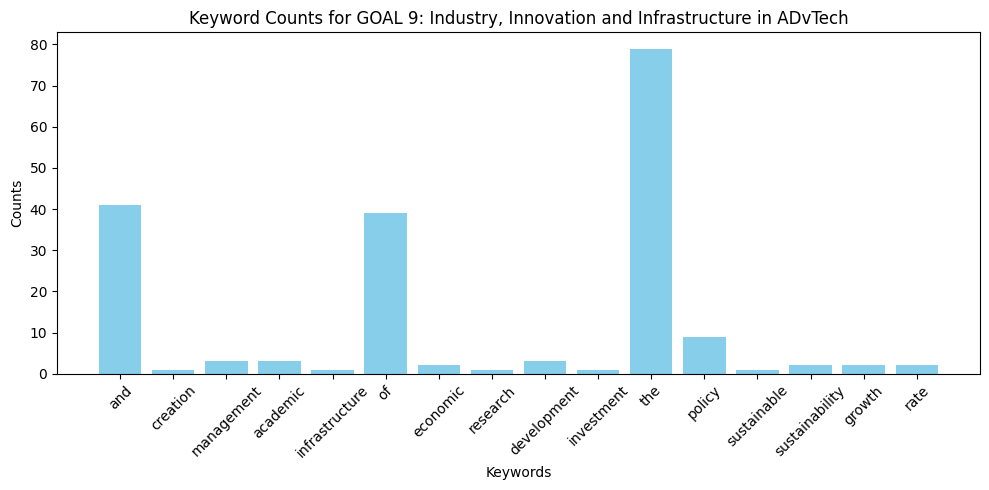

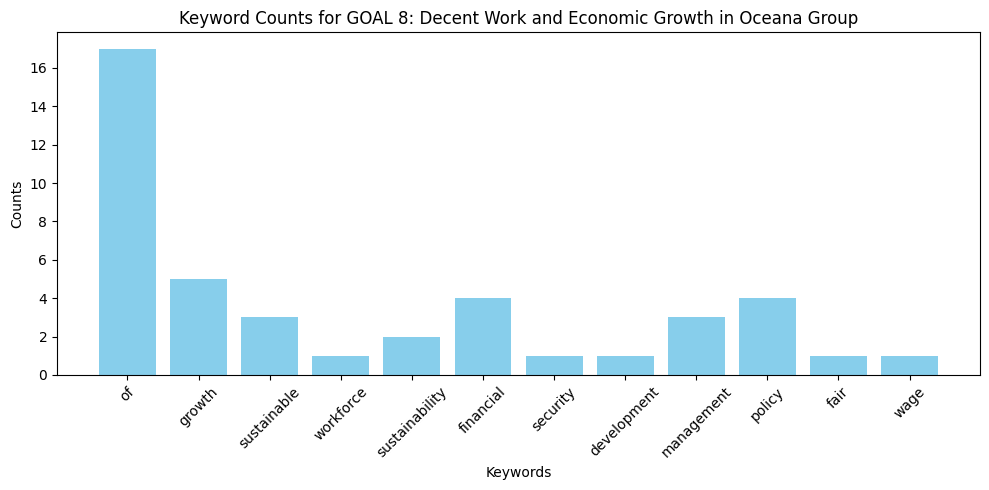

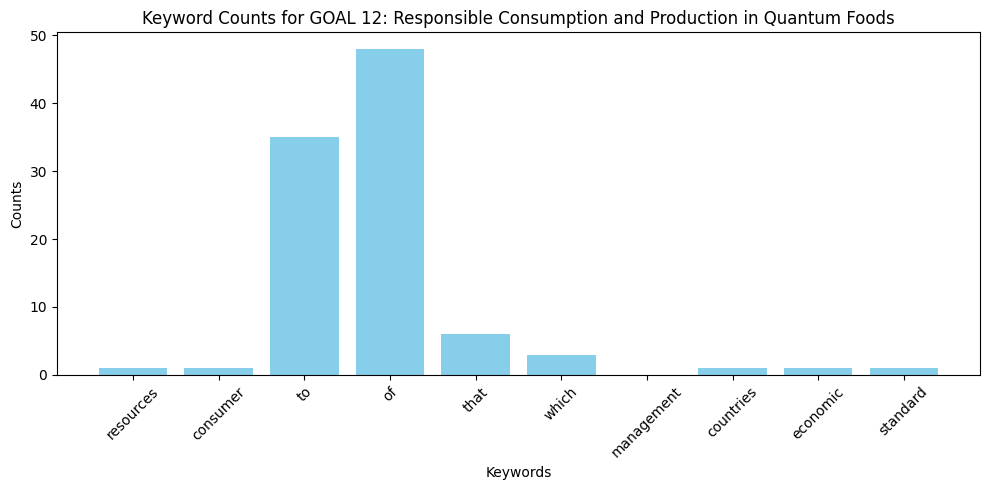

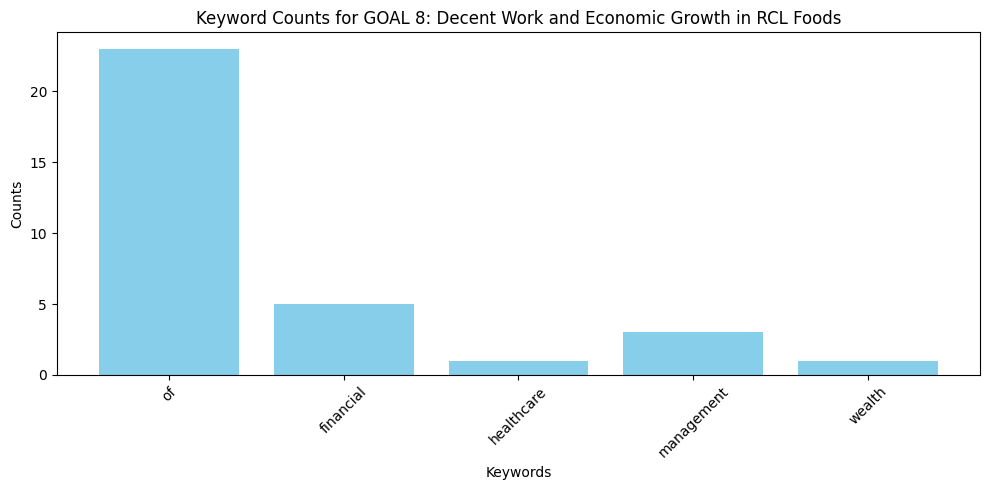

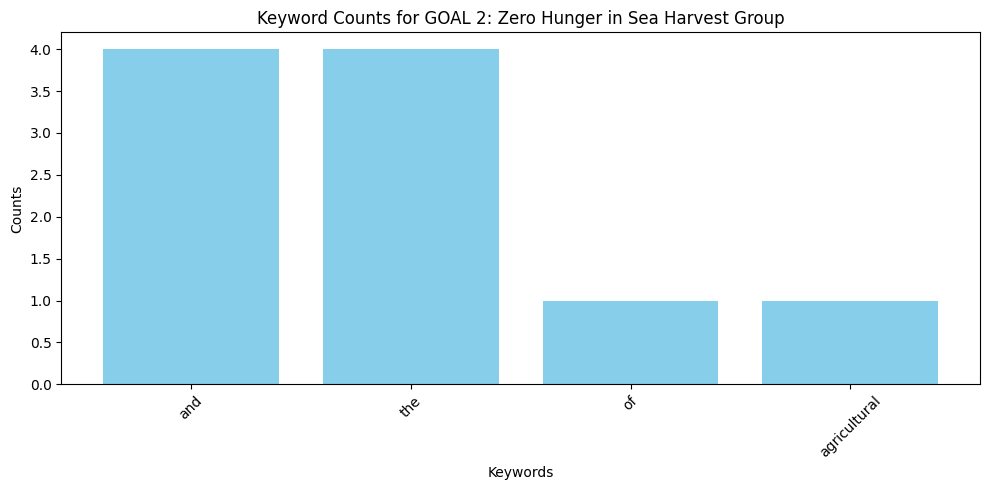

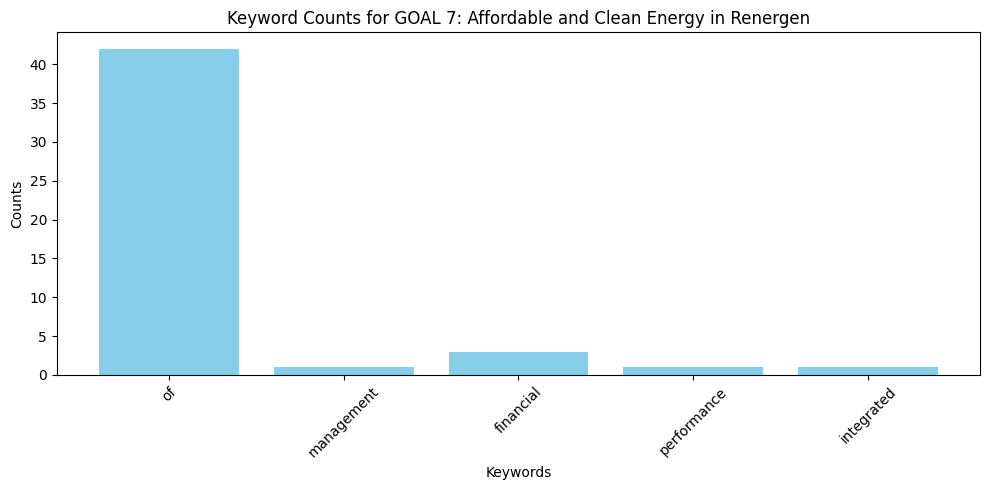

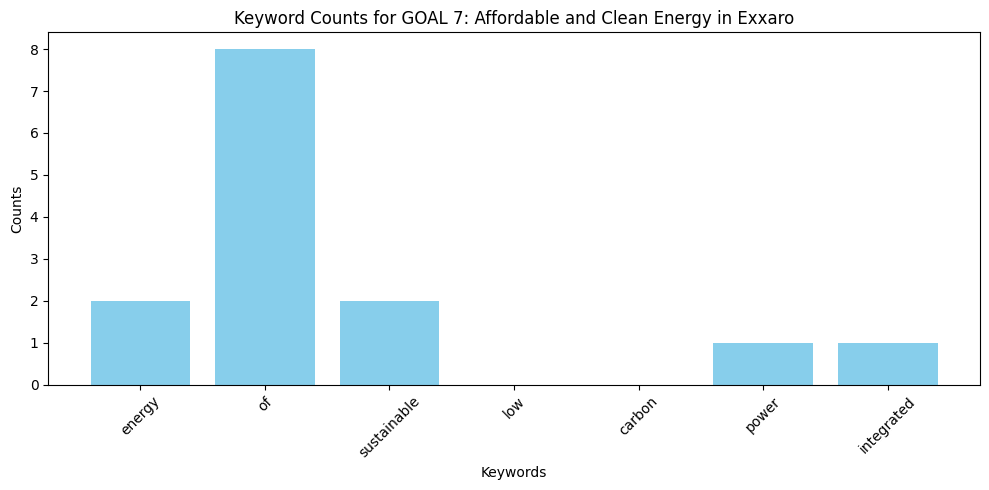

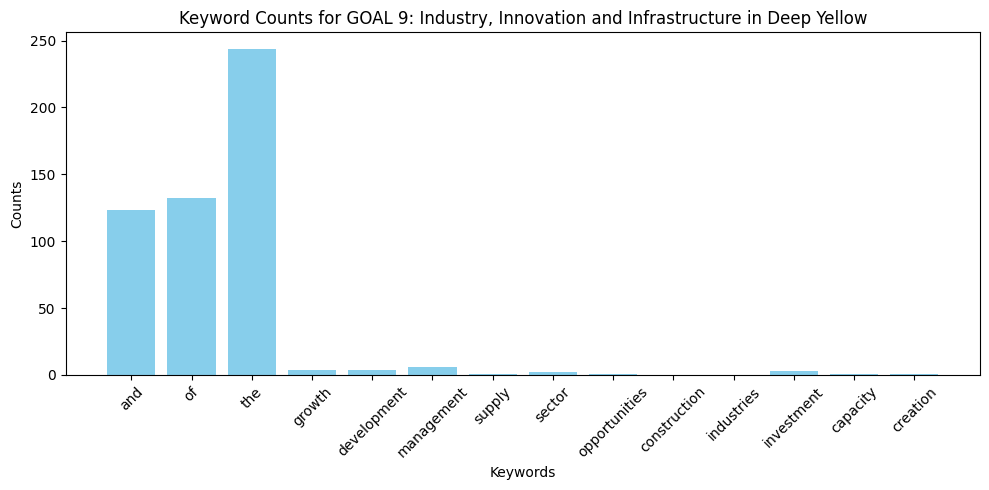

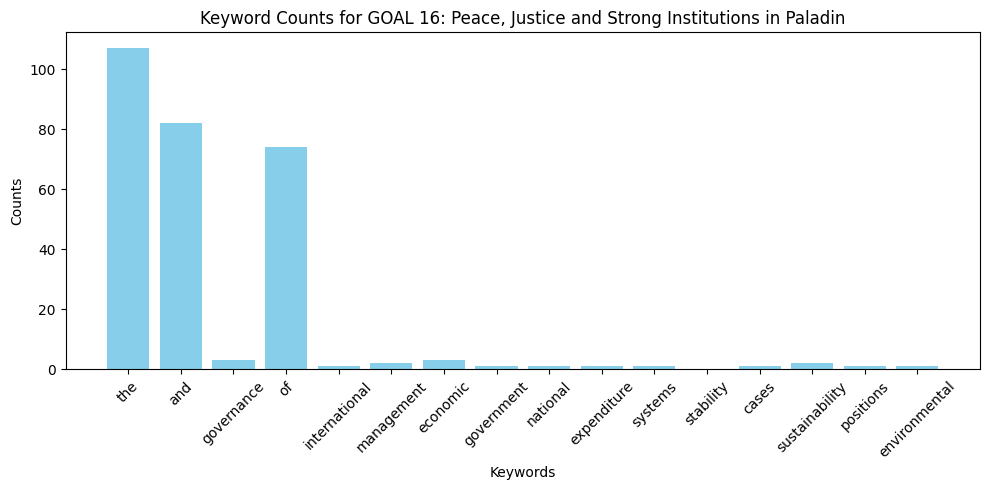

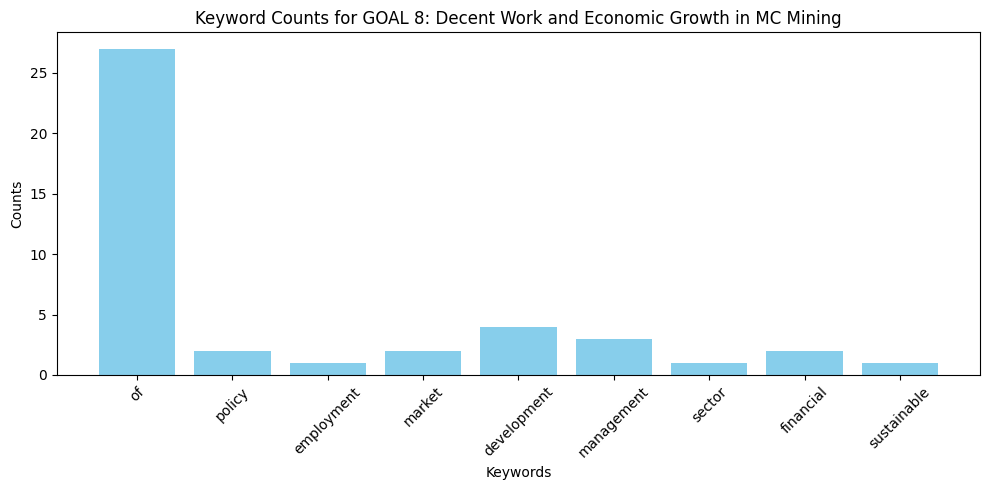

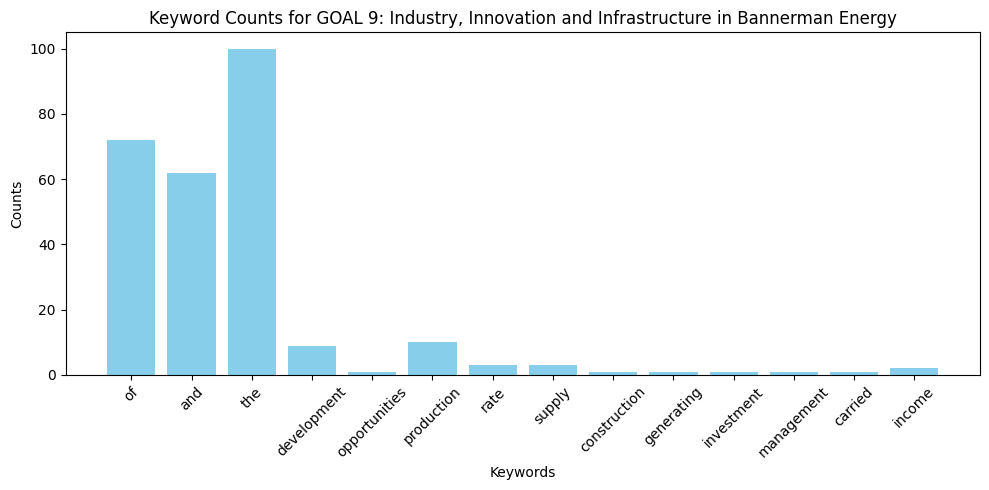

No keywords found for GOAL 11: Sustainable Cities and Communities in Castleview


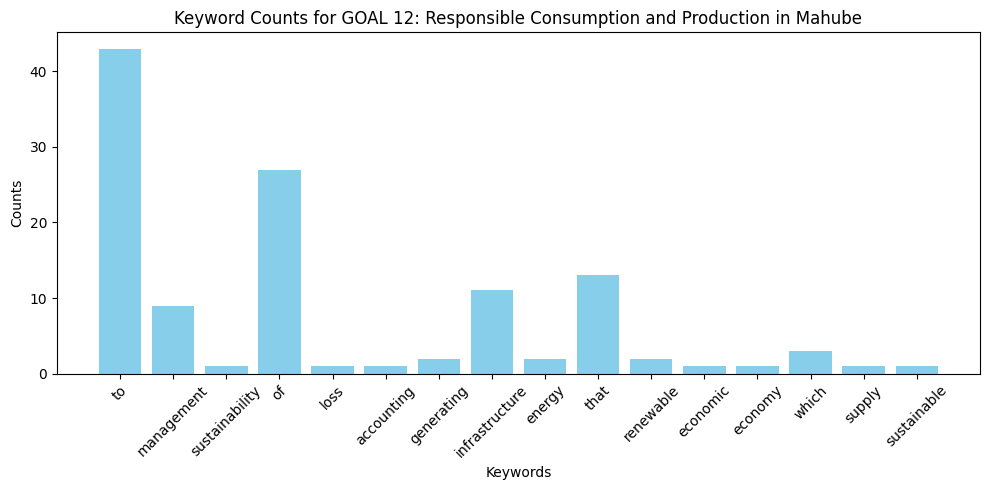

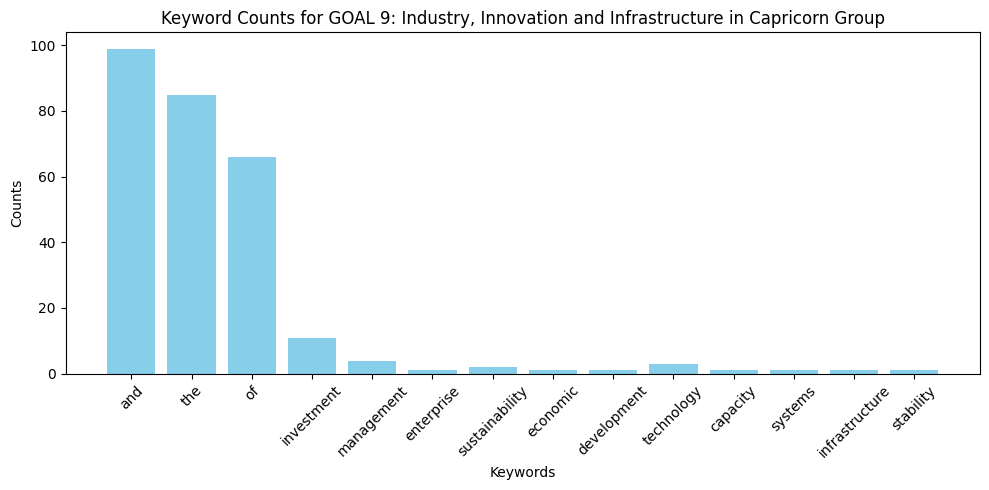

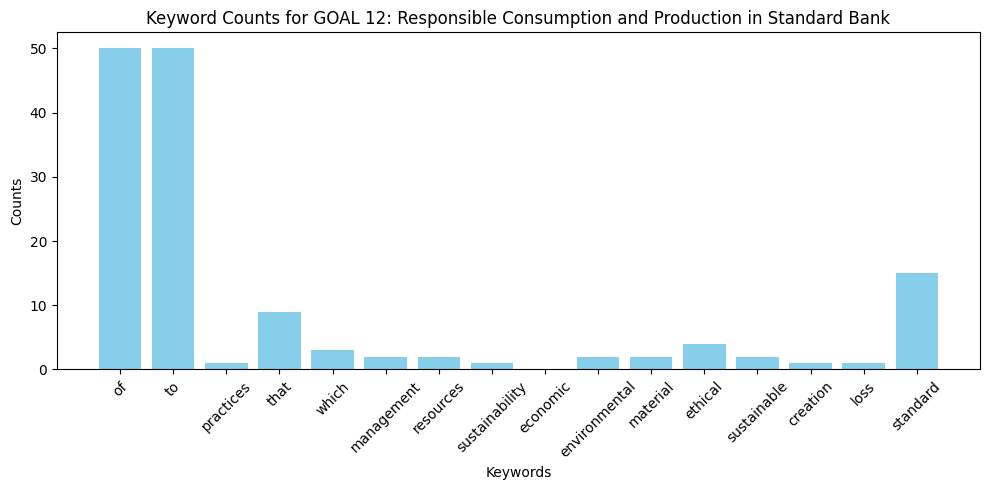

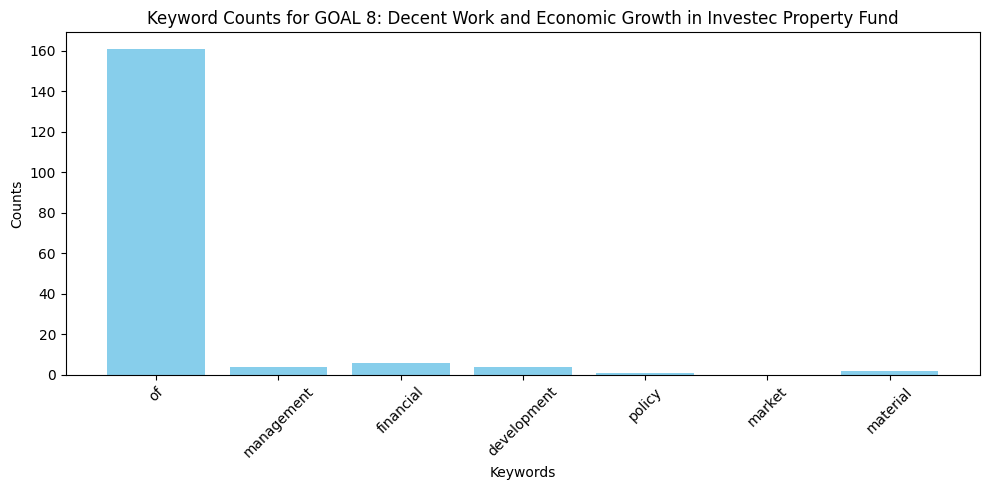

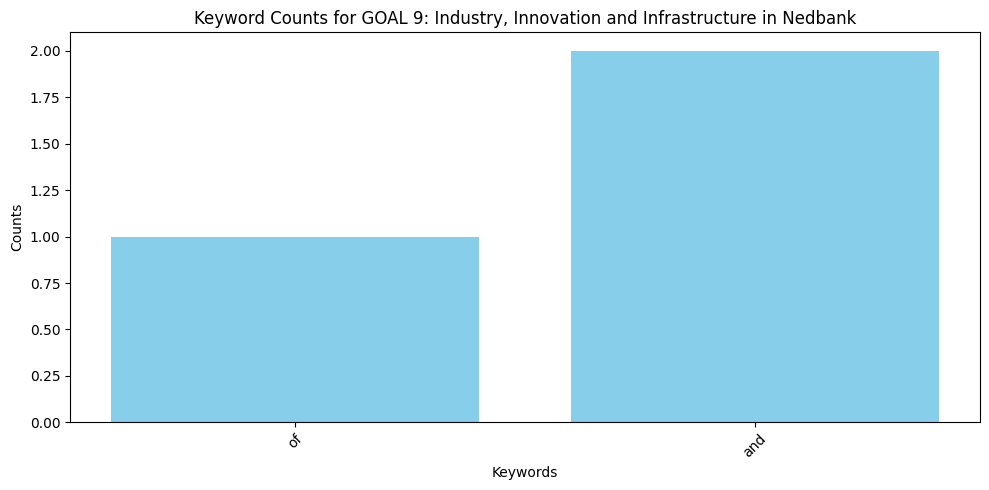

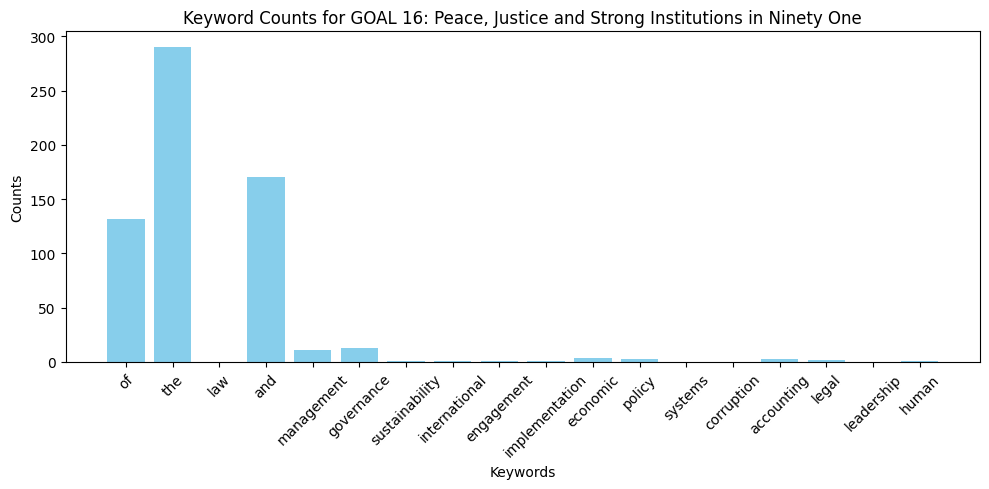

No keywords found for GOAL 11: Sustainable Cities and Communities in Namibia Asset Management


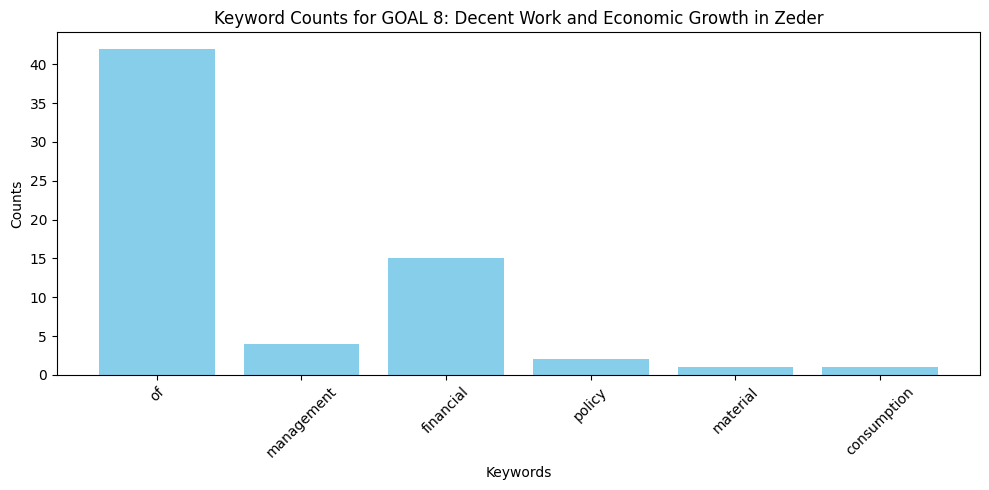

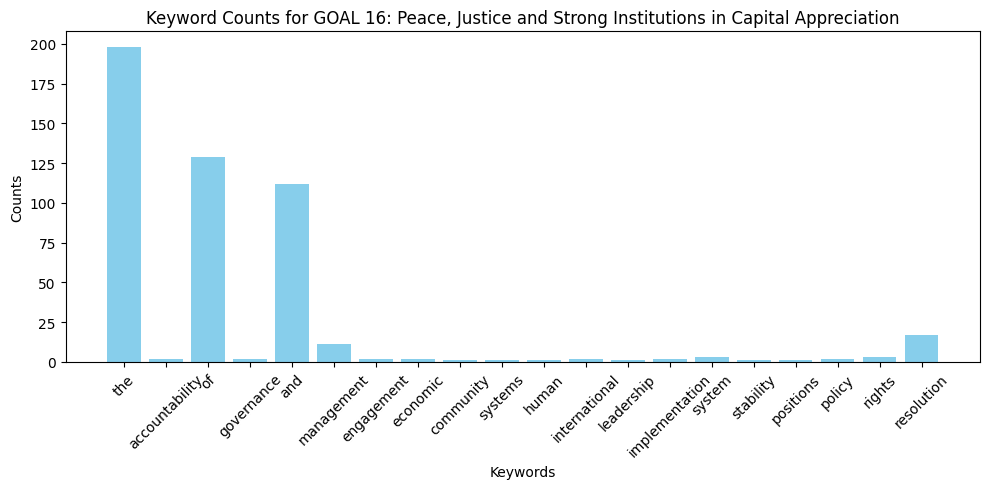

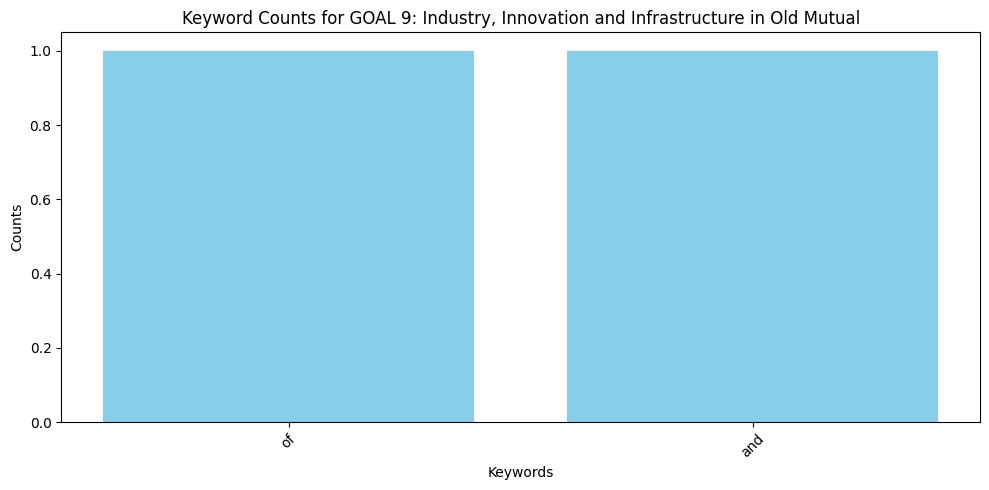

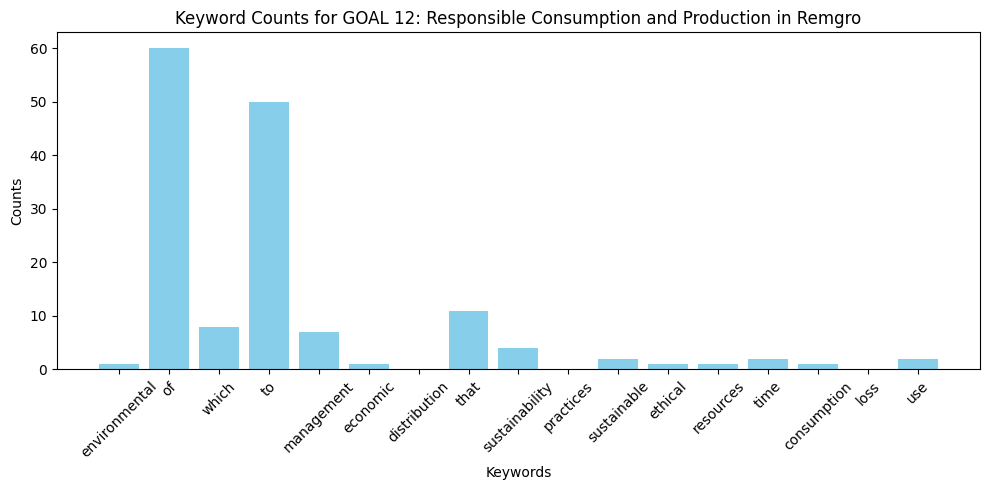

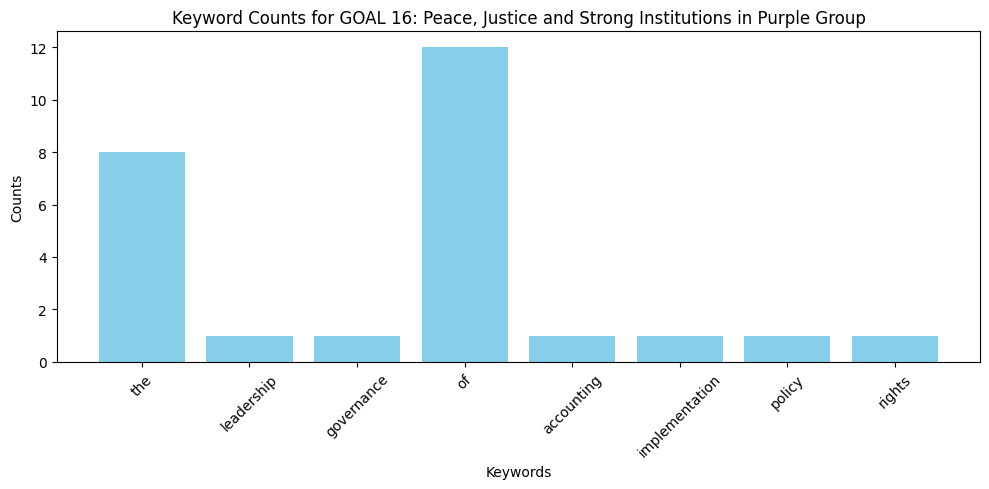

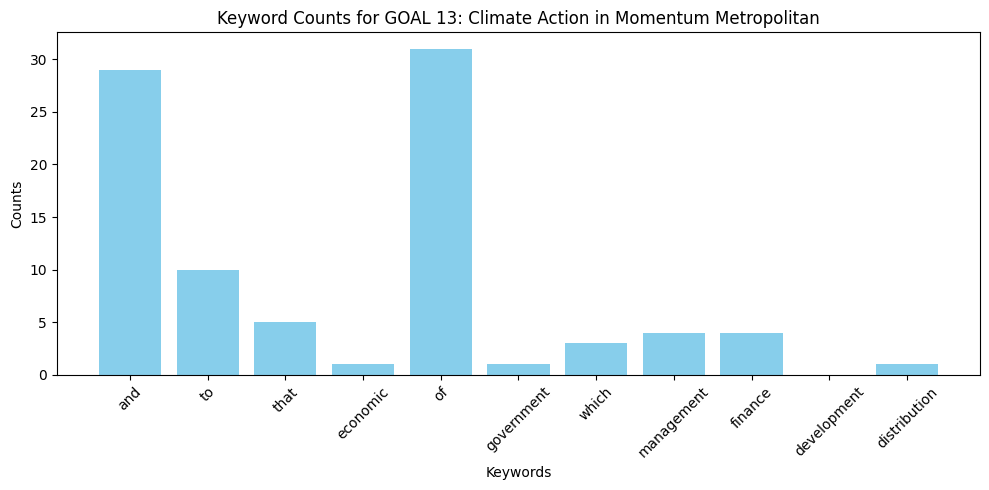

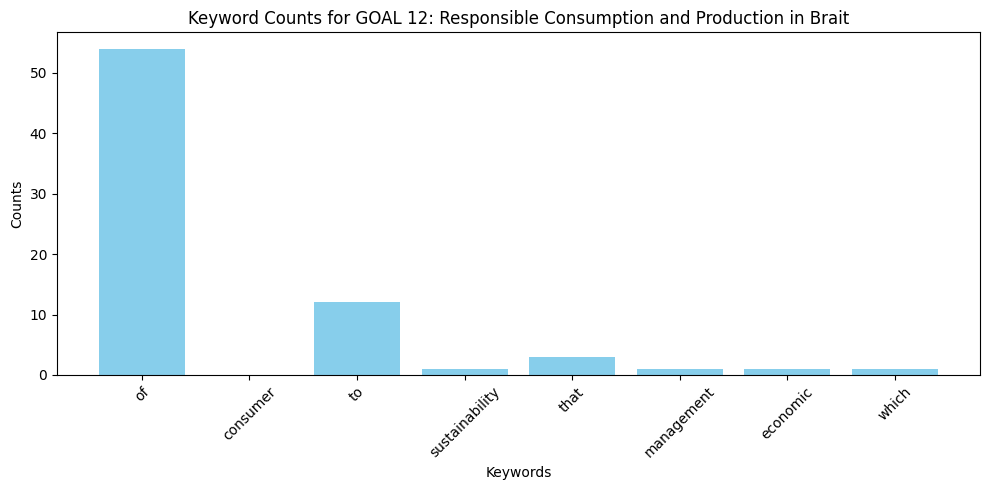

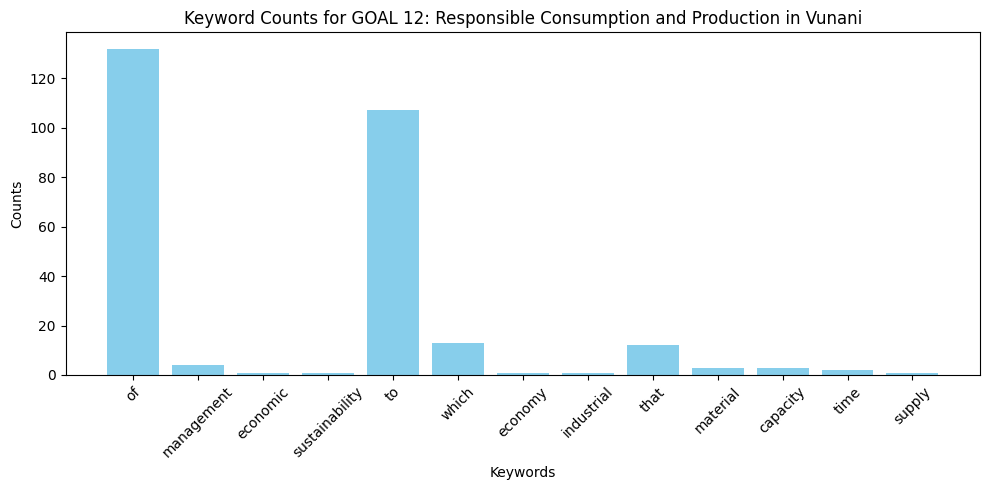

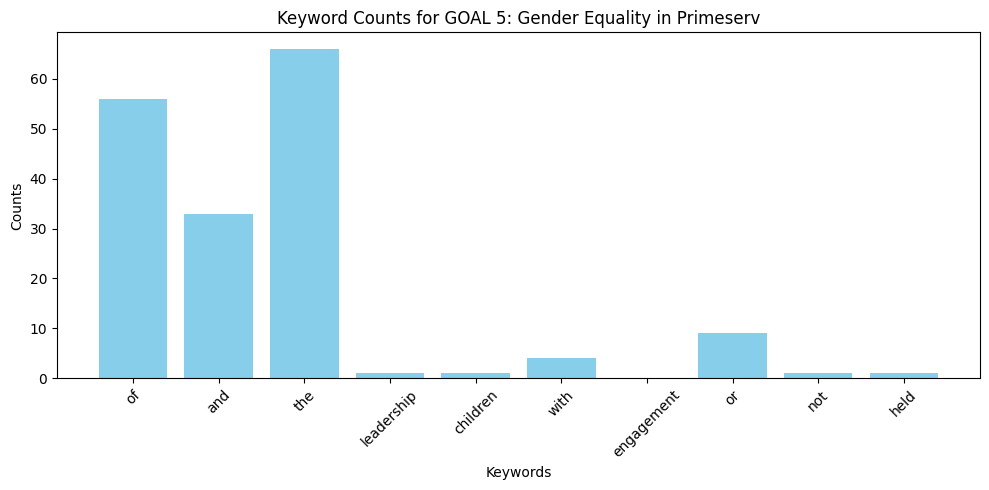

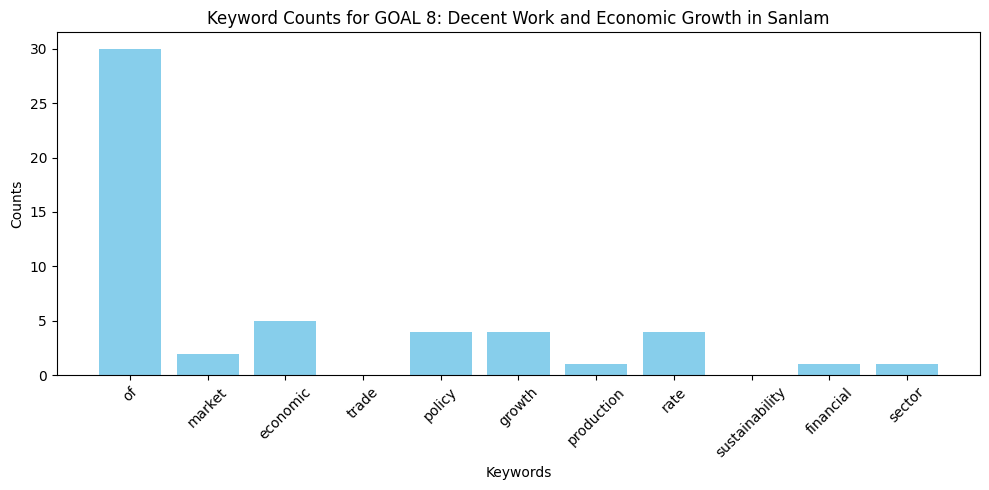

No keywords found for GOAL 11: Sustainable Cities and Communities in ABSA


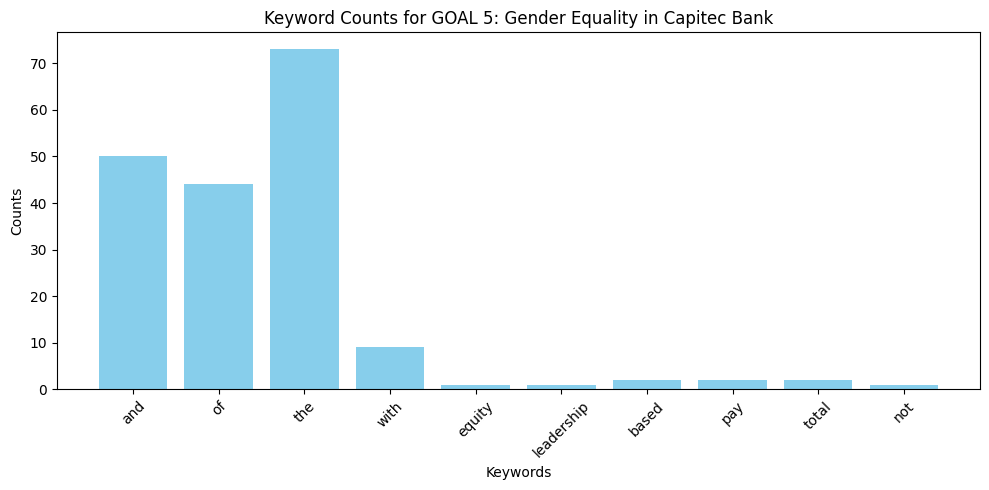

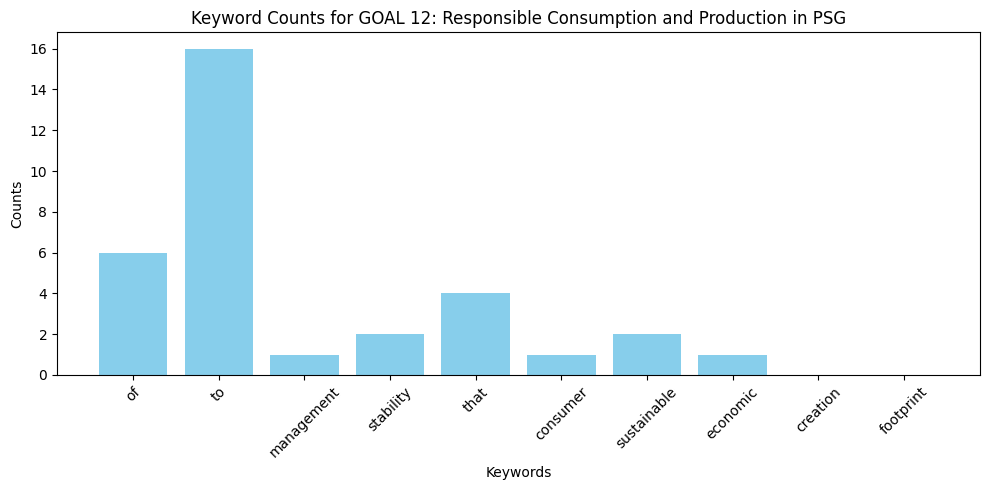

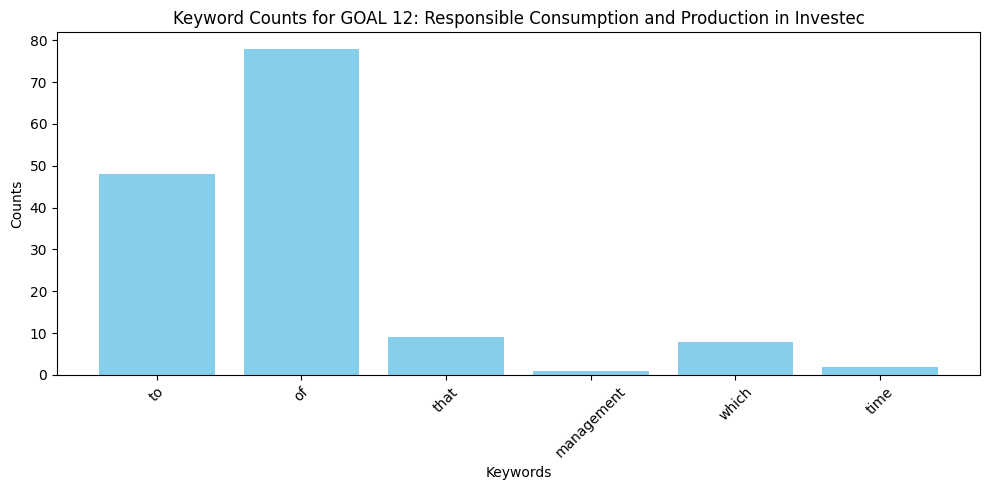

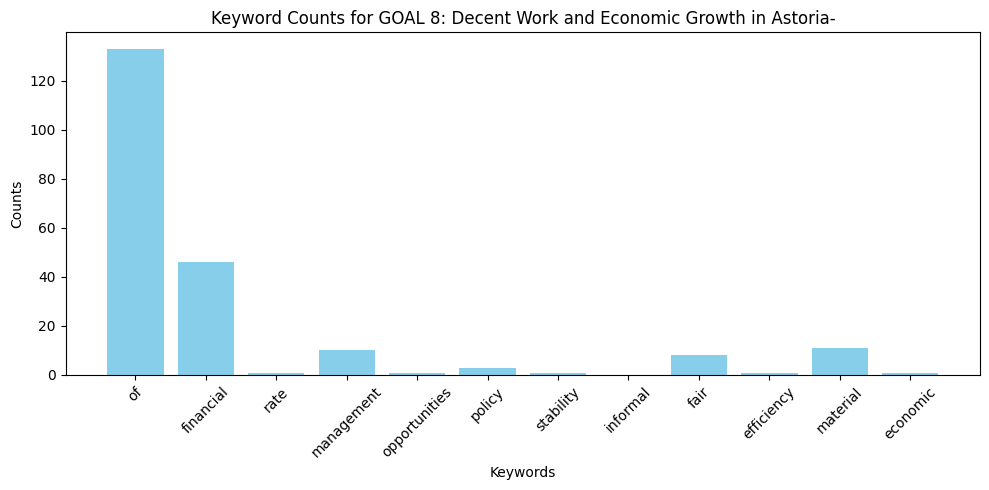

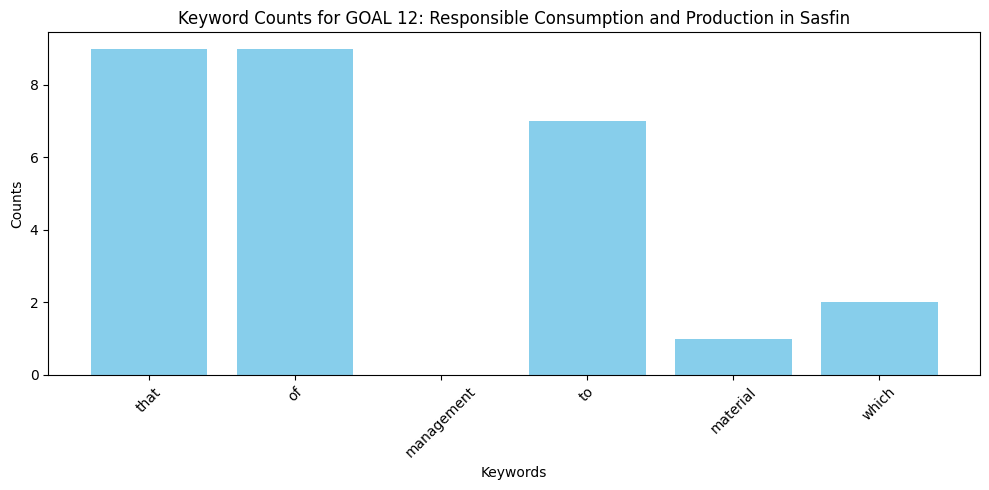

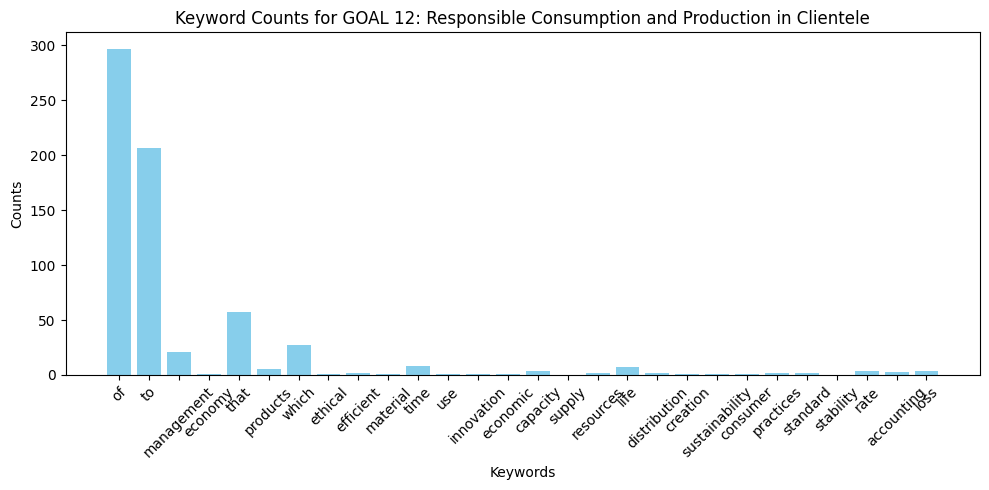

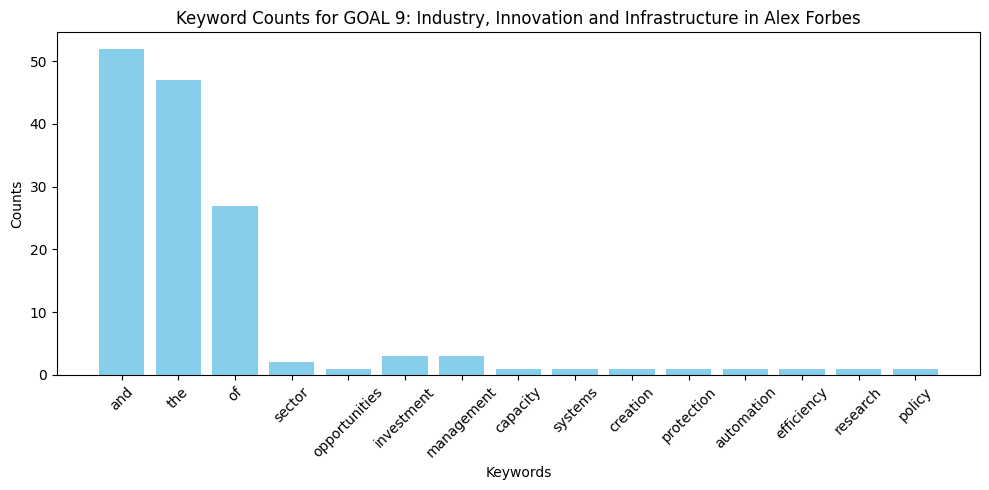

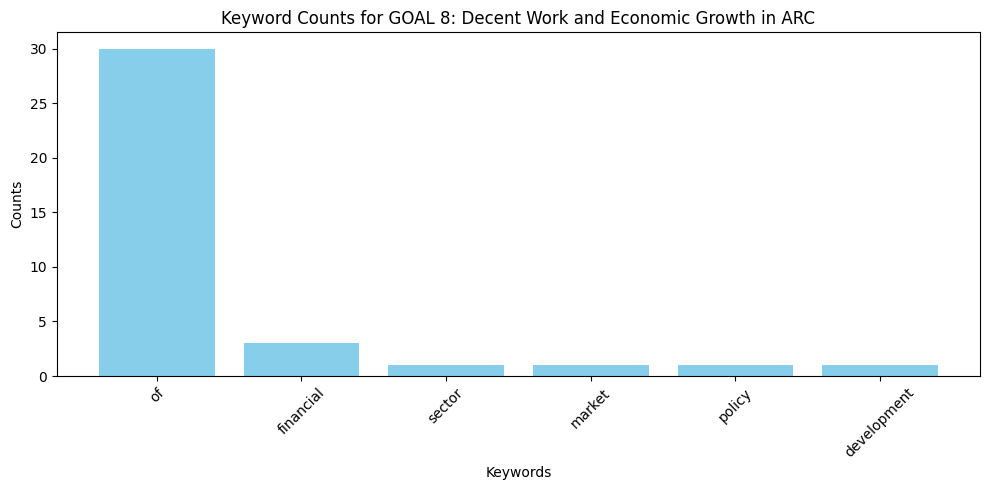

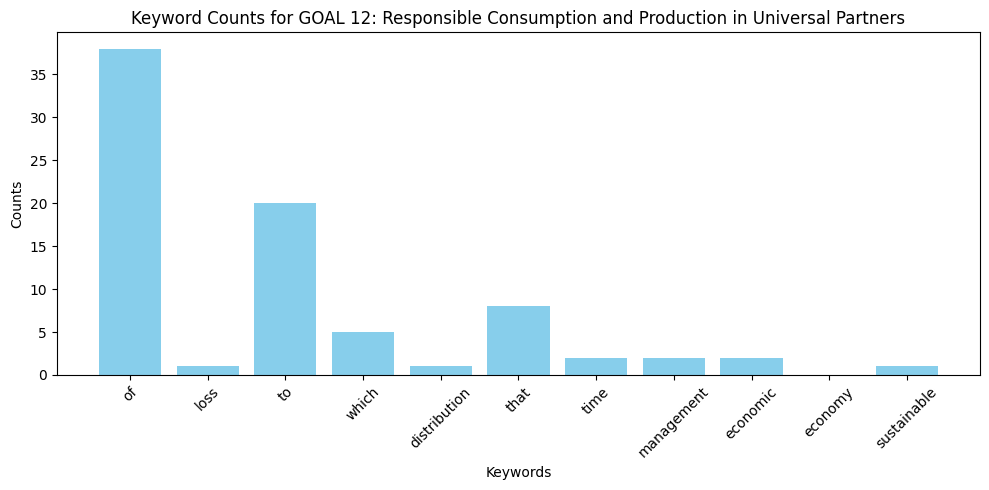

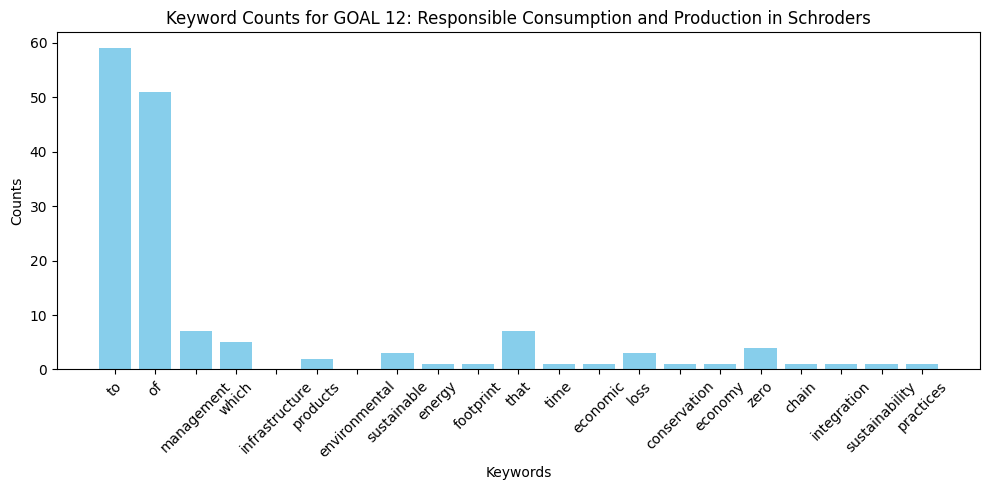

No keywords found for GOAL 11: Sustainable Cities and Communities in Discovery


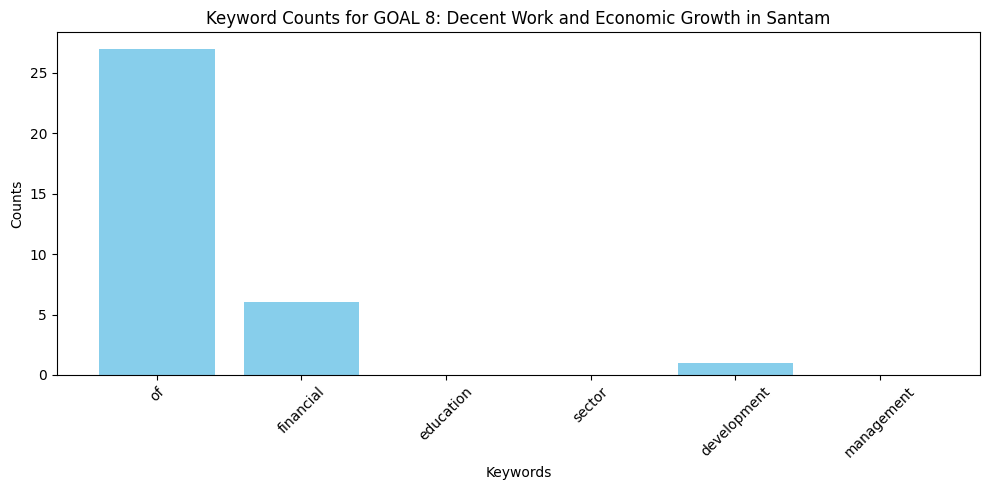

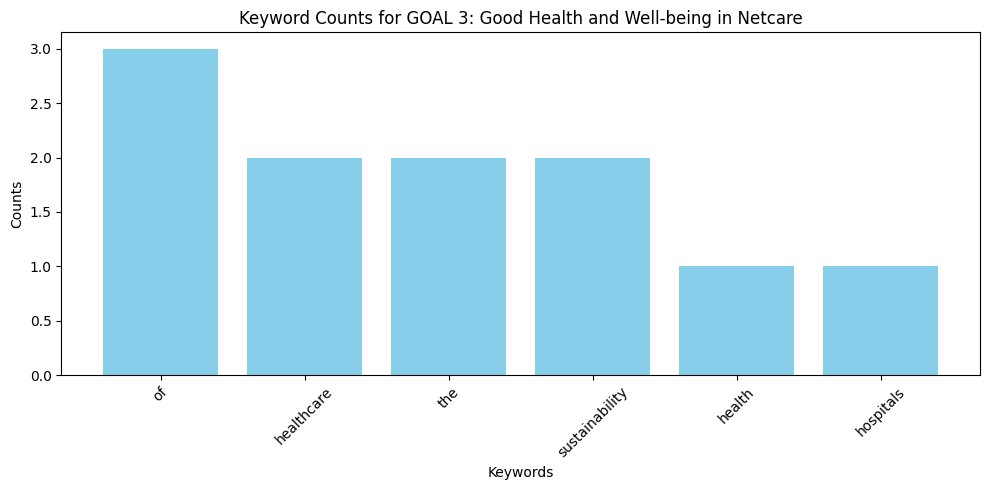

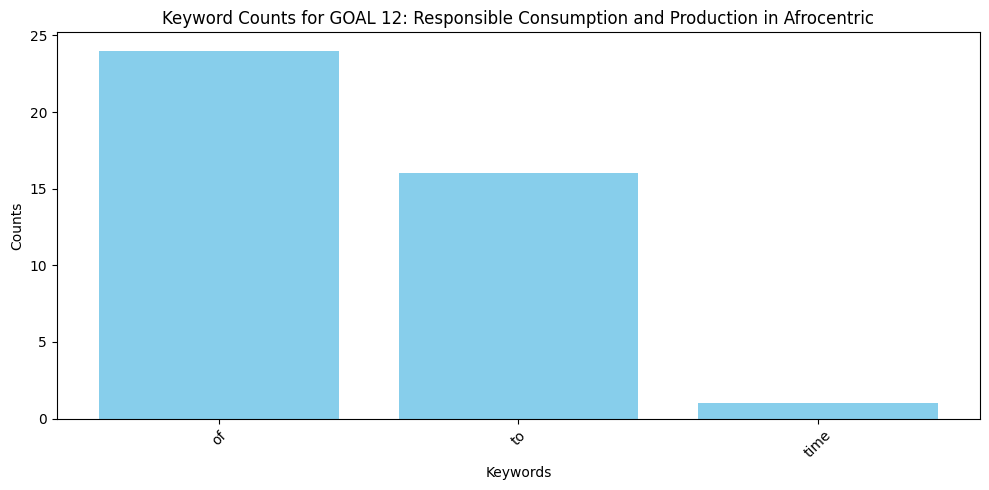

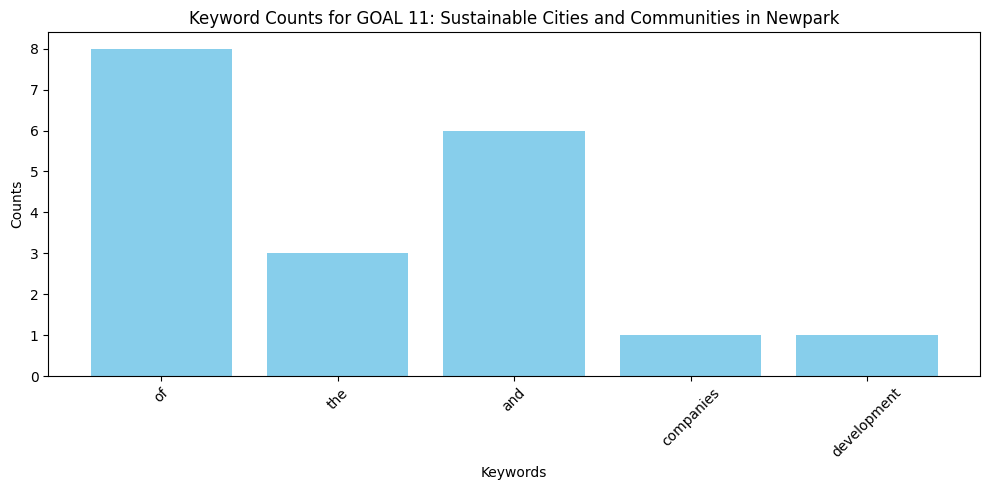

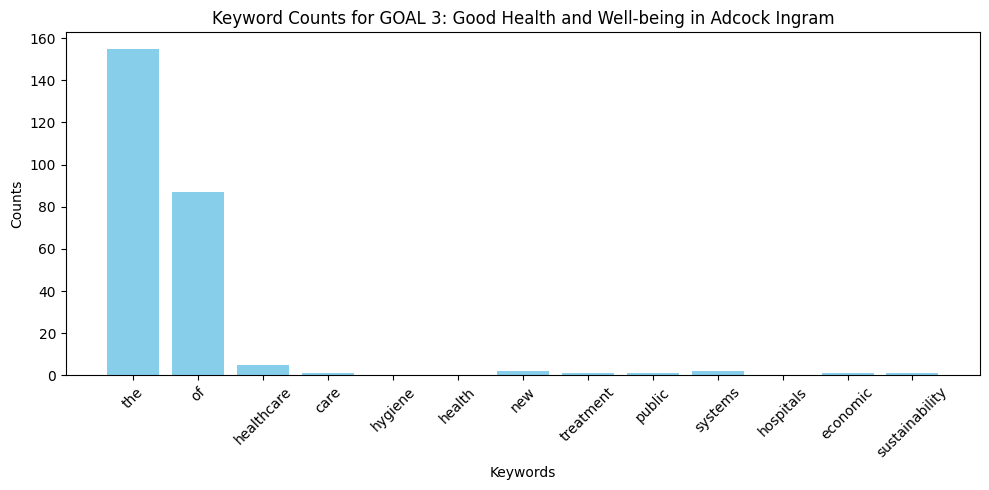

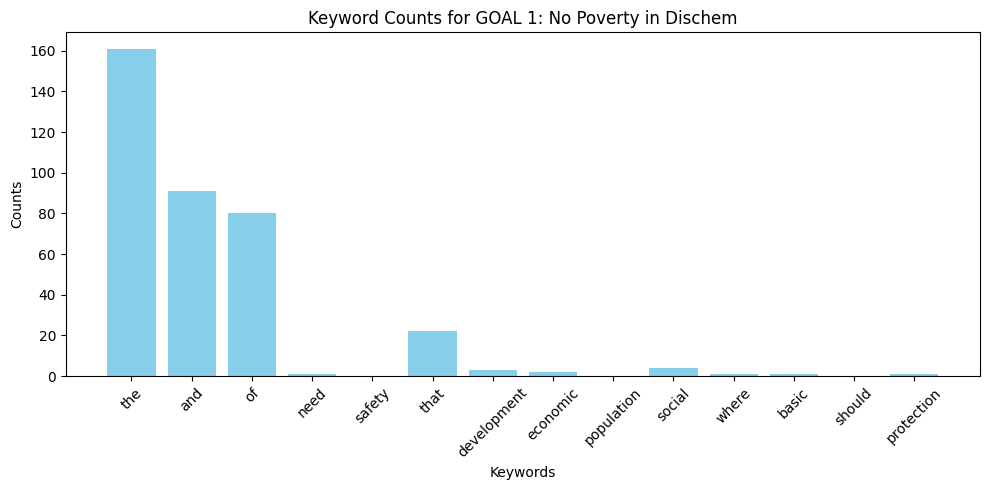

No keywords found for GOAL 11: Sustainable Cities and Communities in Aspen
No keywords found for GOAL 11: Sustainable Cities and Communities in Life Healthcare


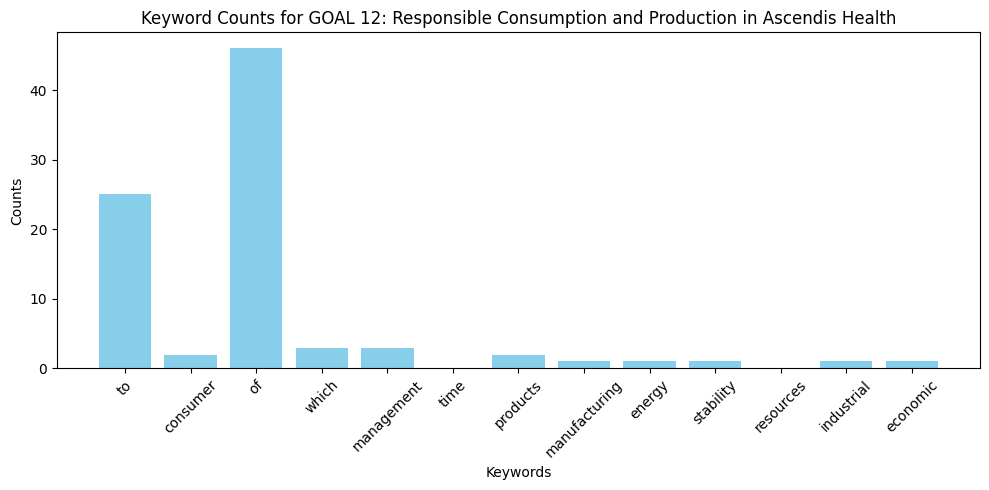

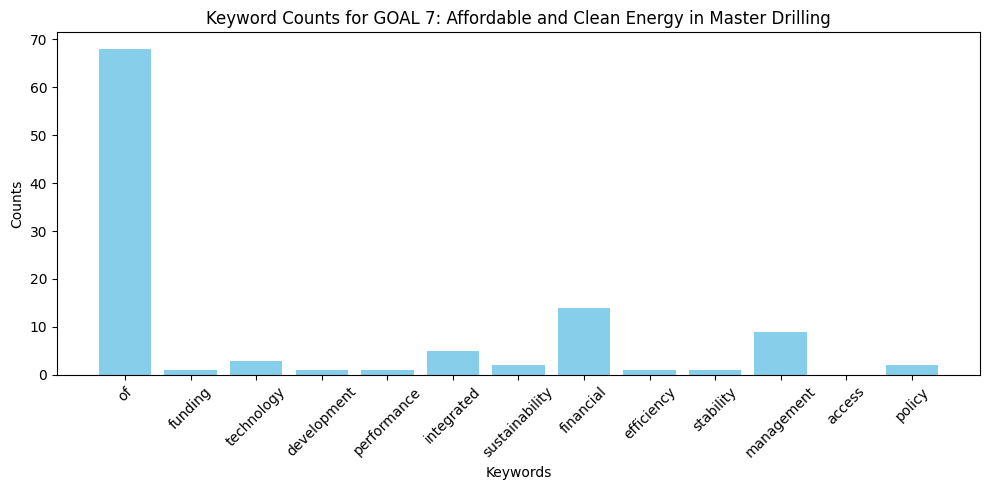

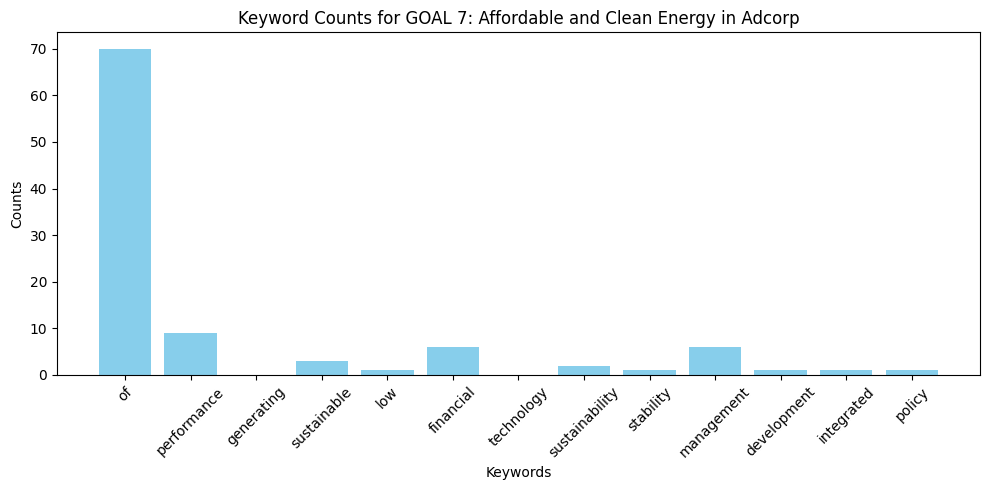

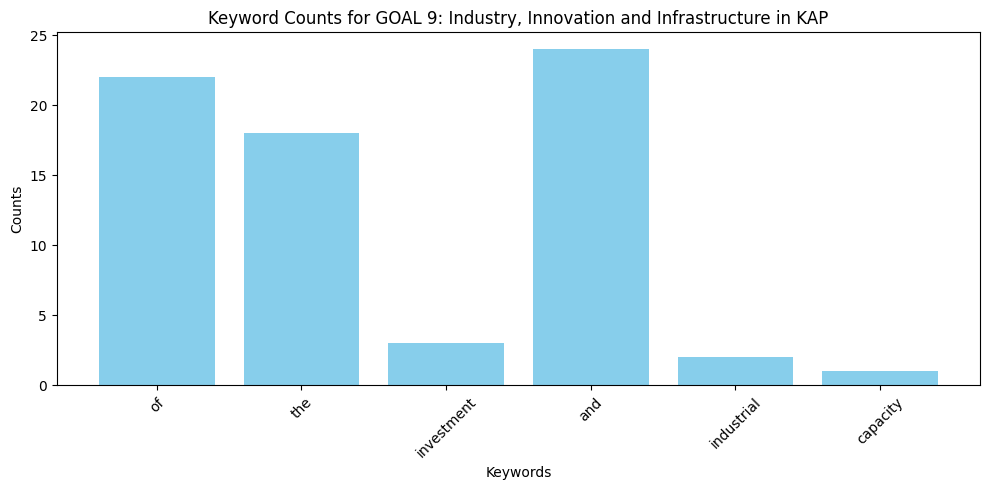

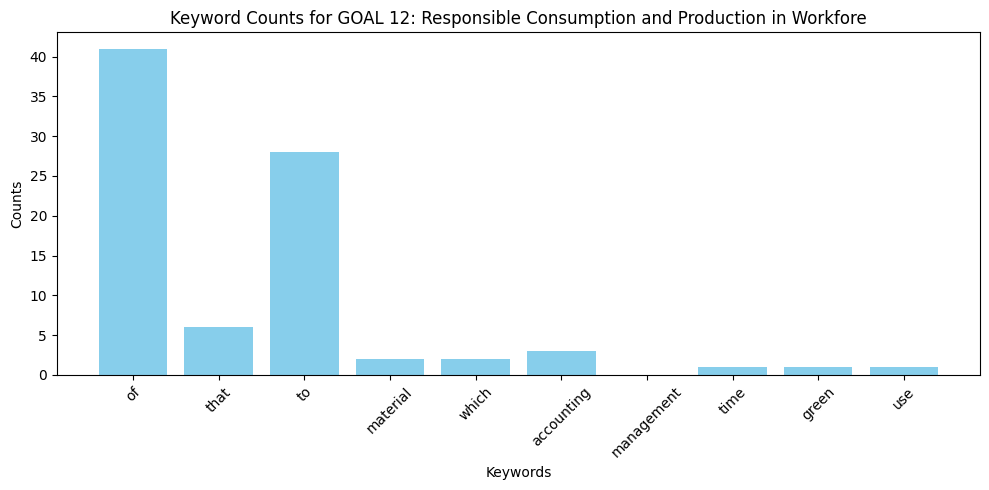

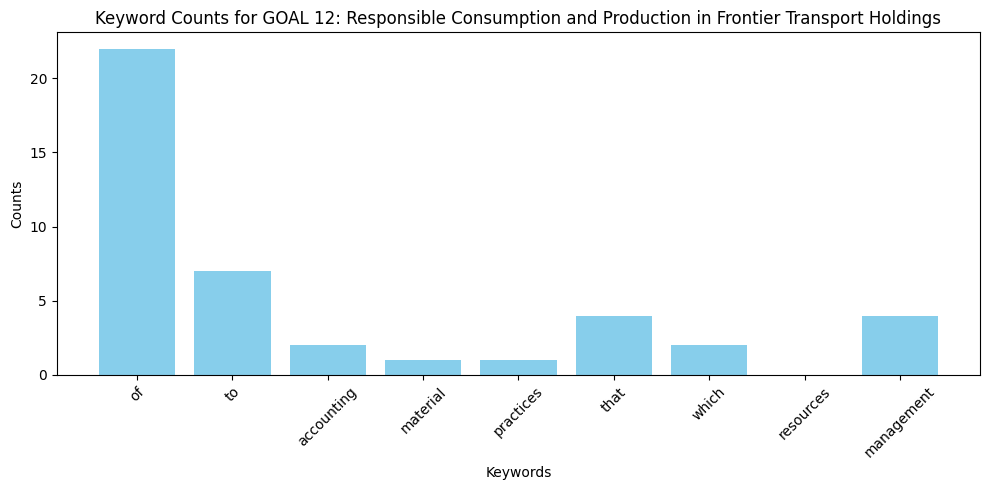

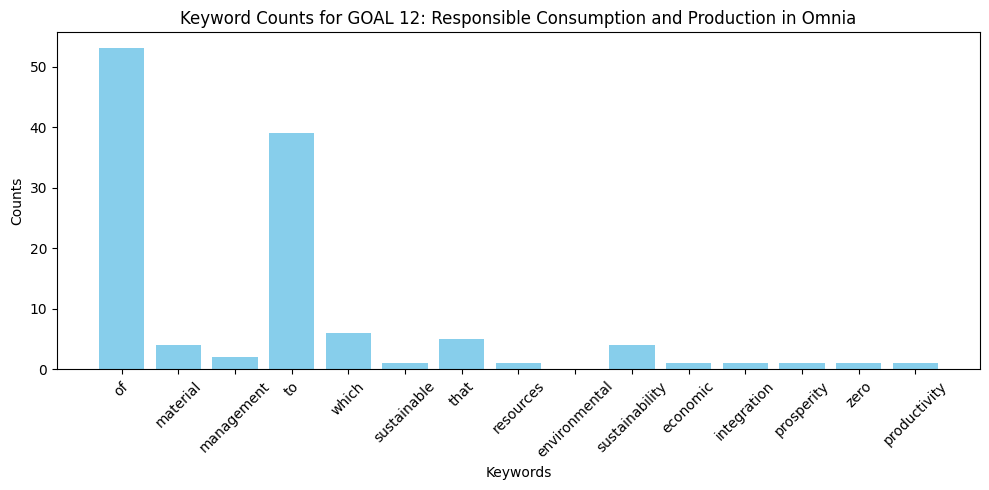

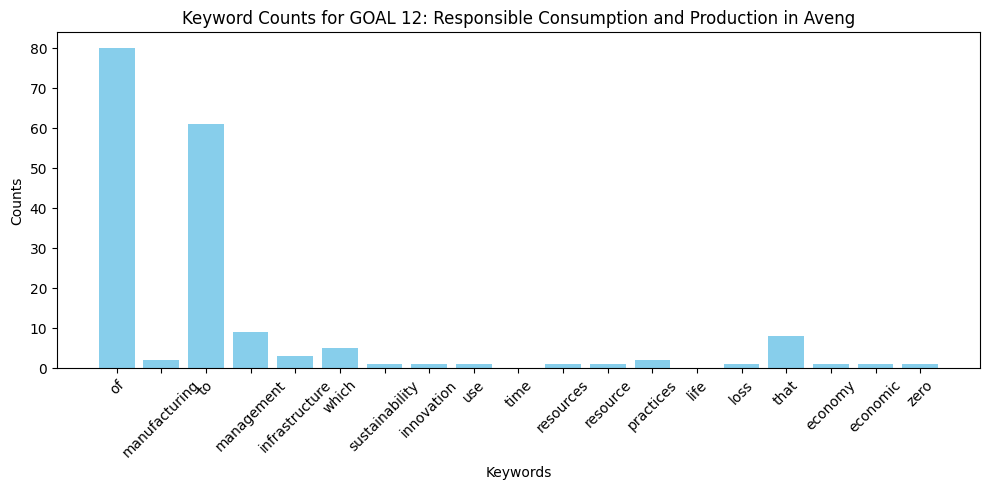

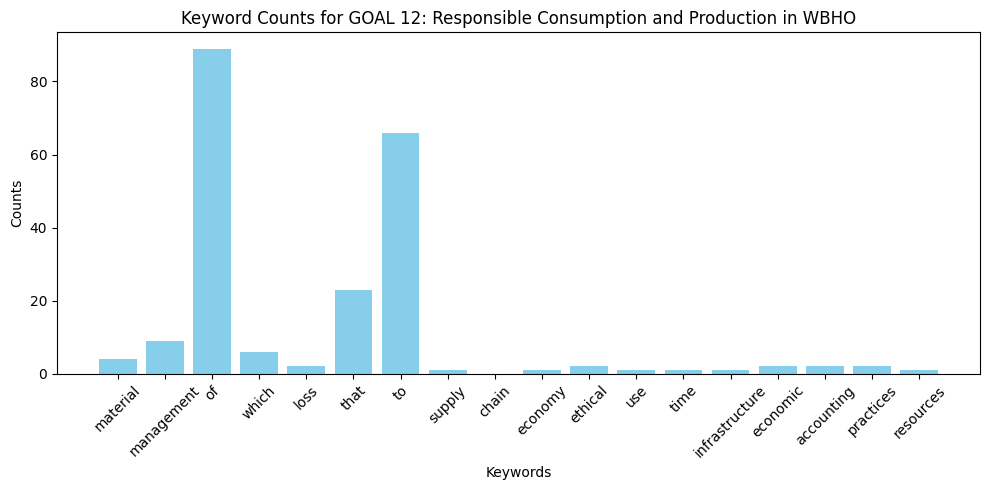

No keywords found for GOAL 11: Sustainable Cities and Communities in Metrofile Group


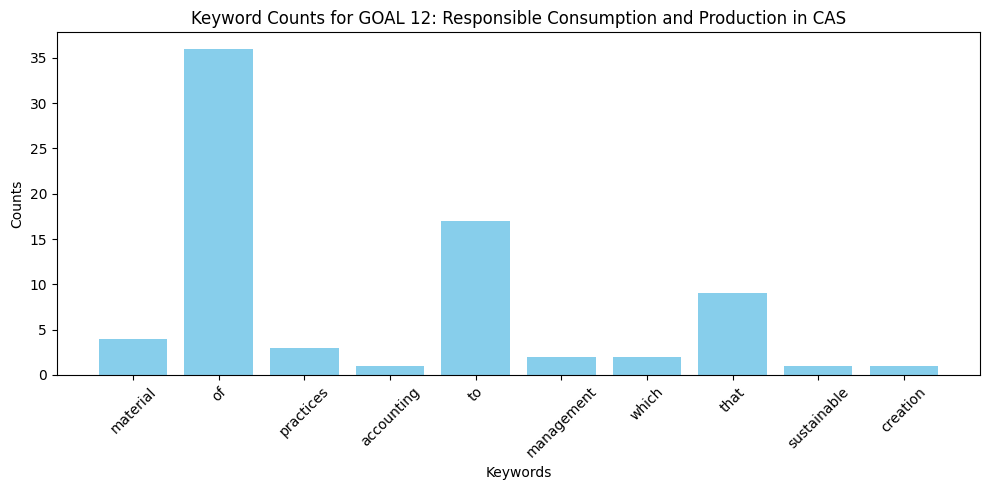

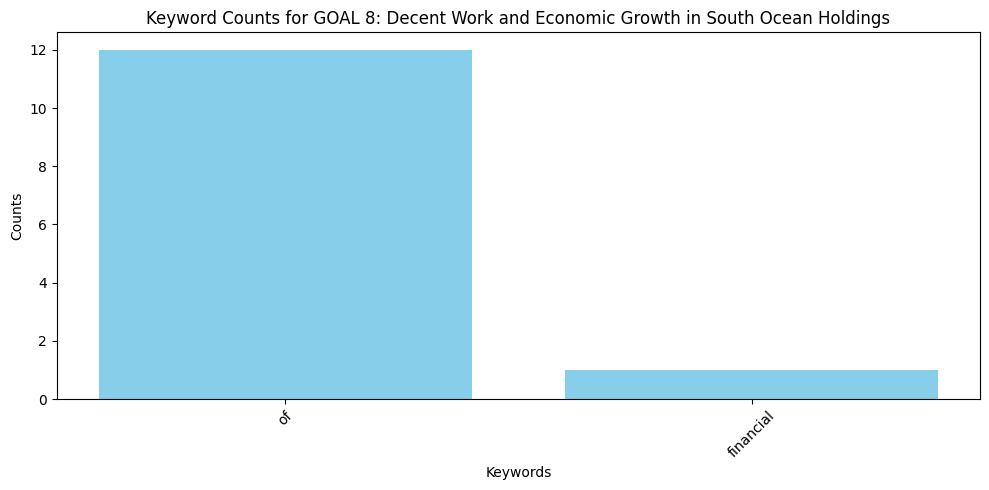

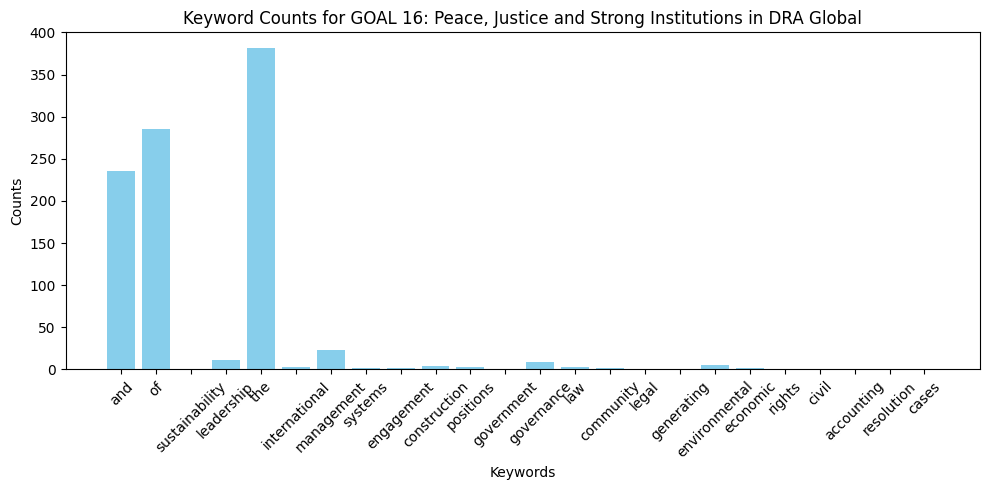

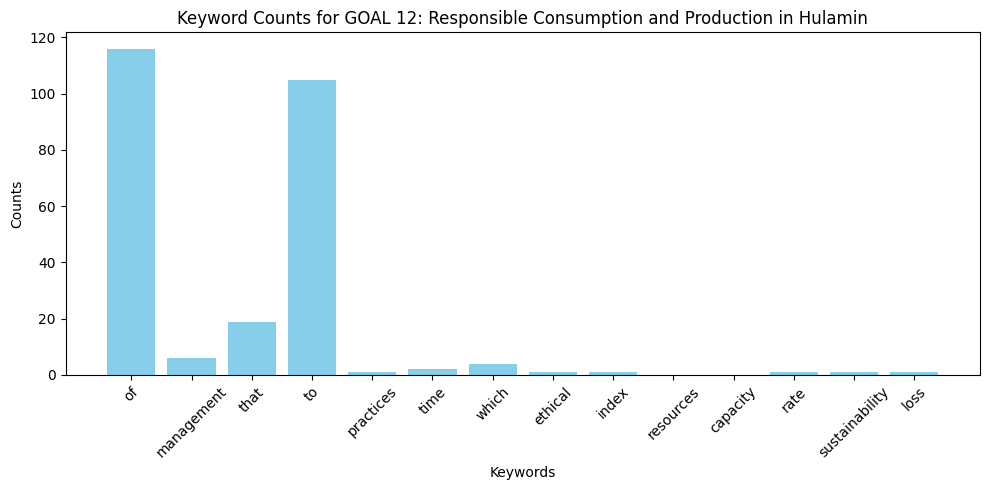

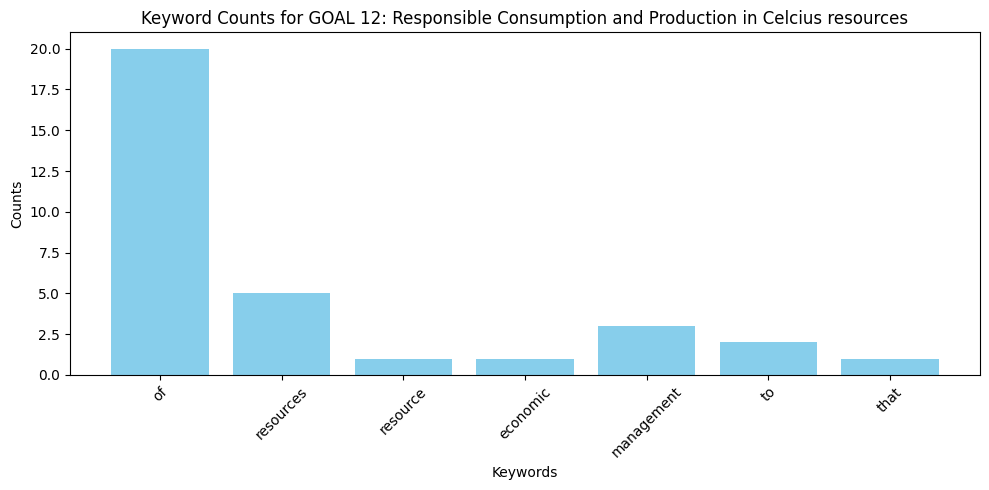

No keywords found for GOAL 11: Sustainable Cities and Communities in Reunert


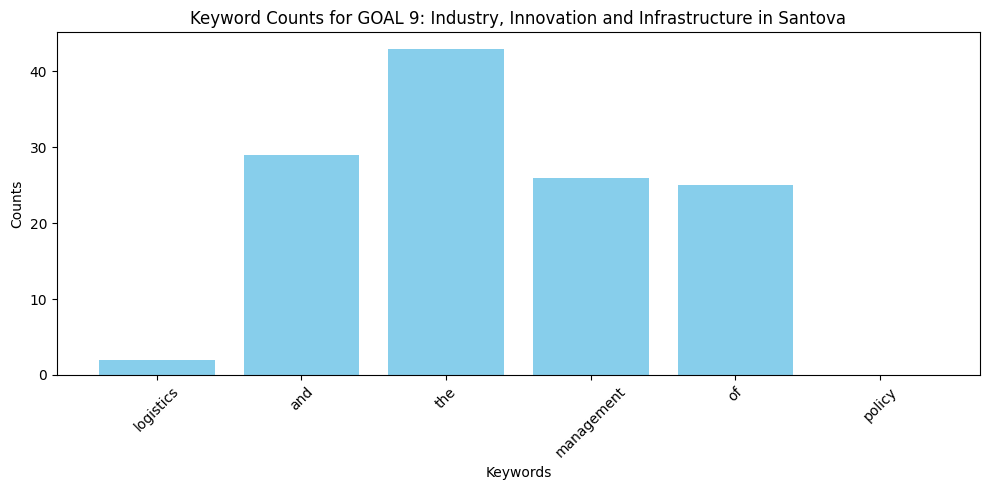

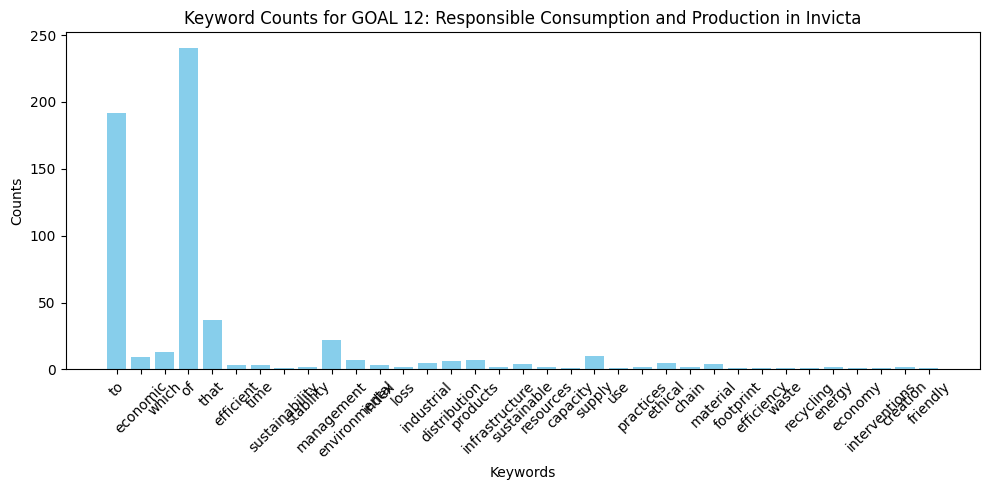

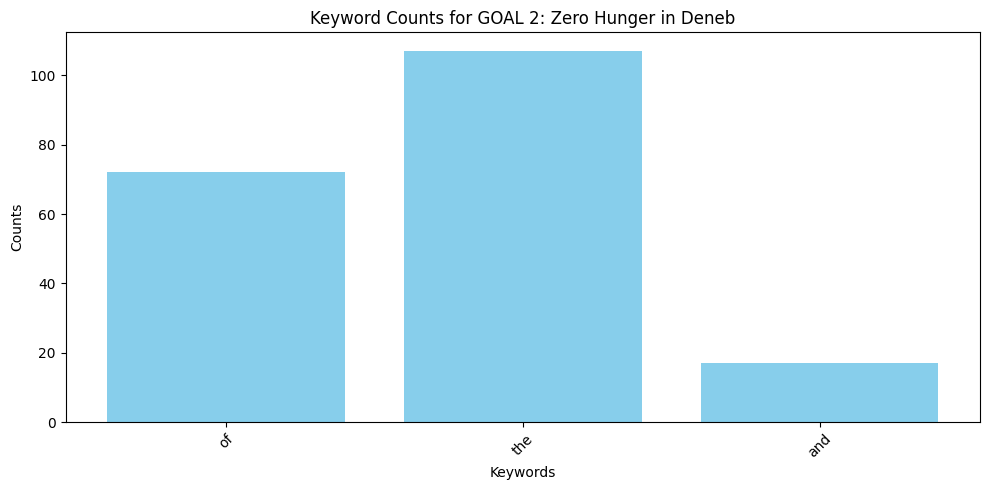

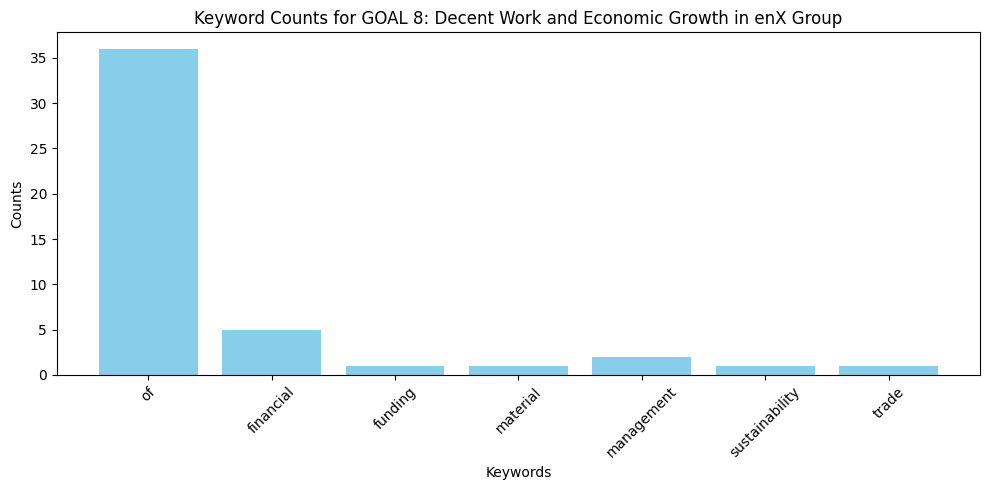

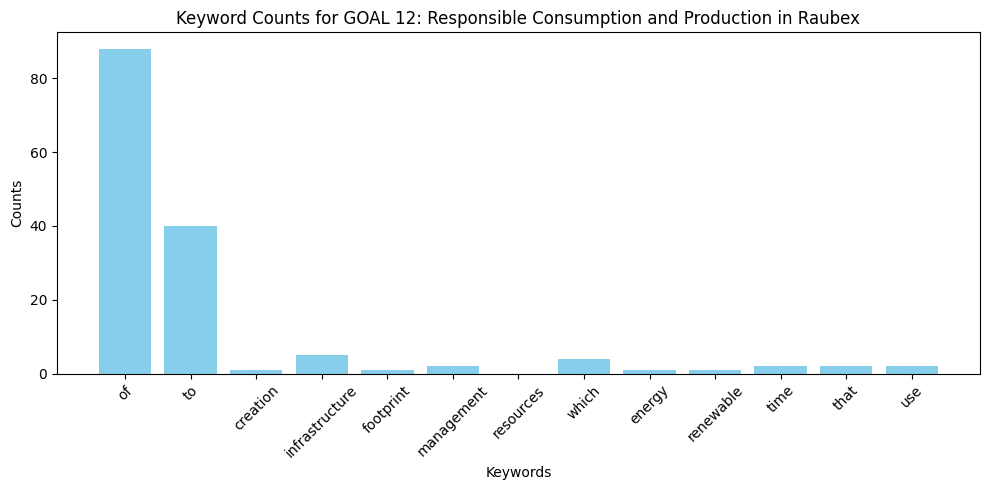

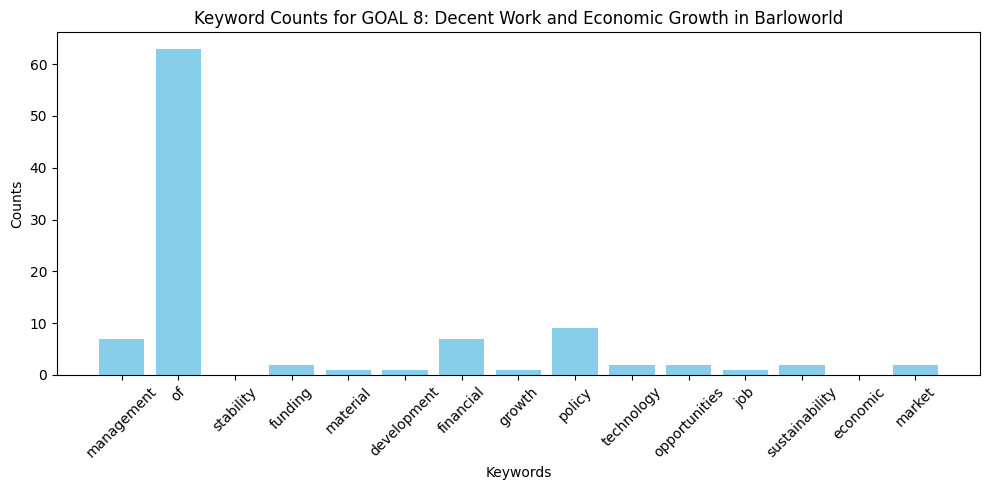

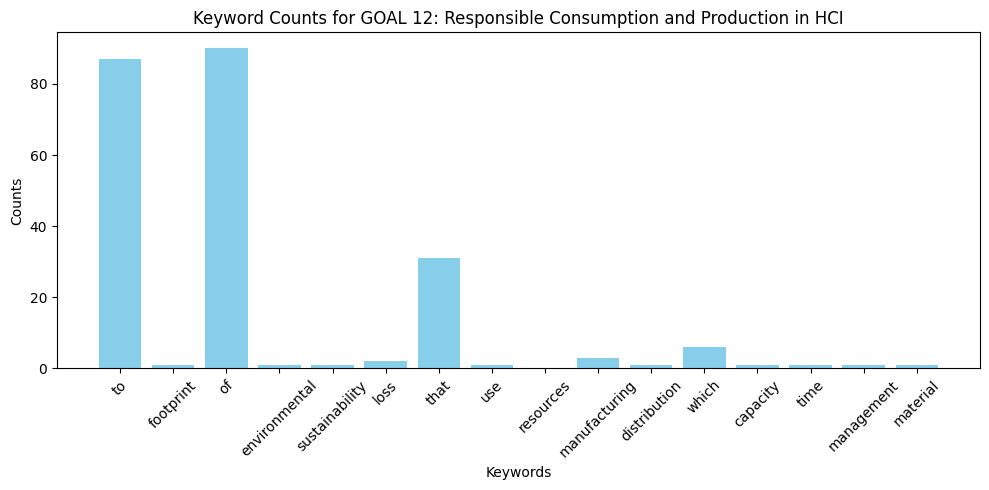

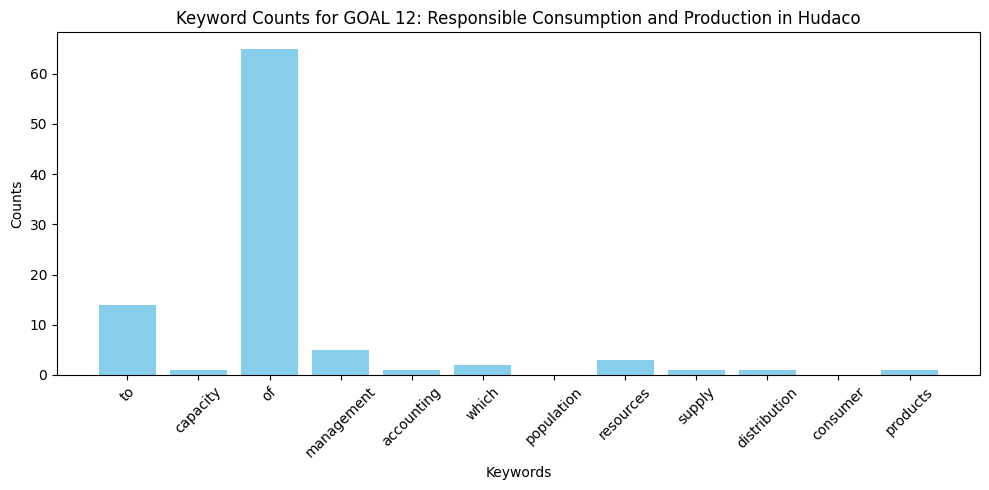

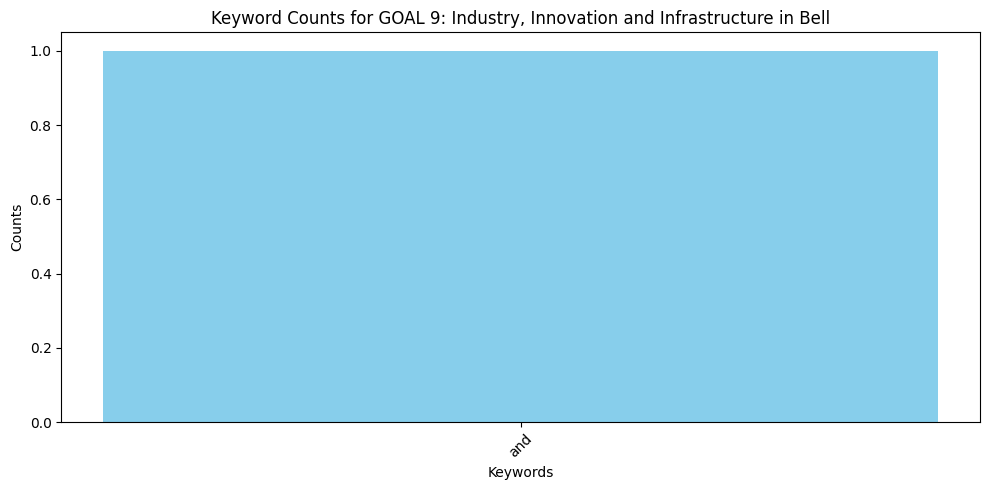

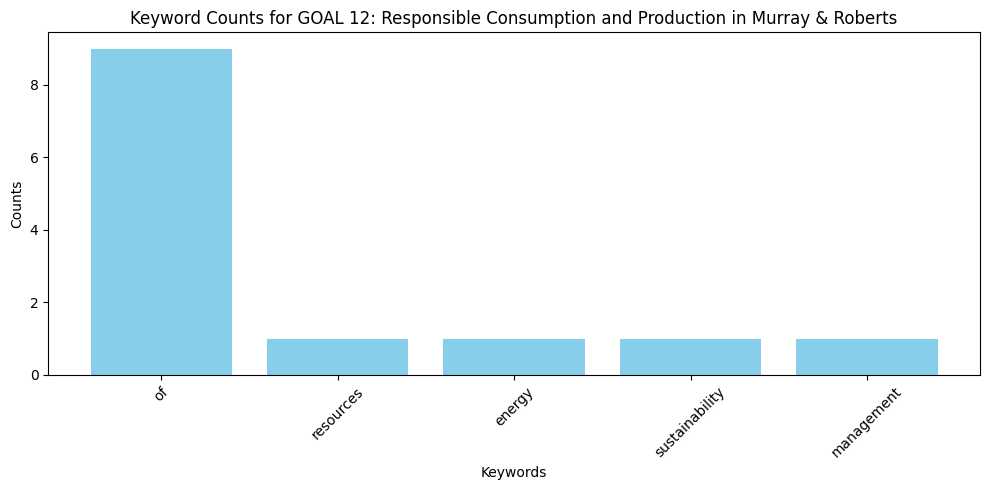

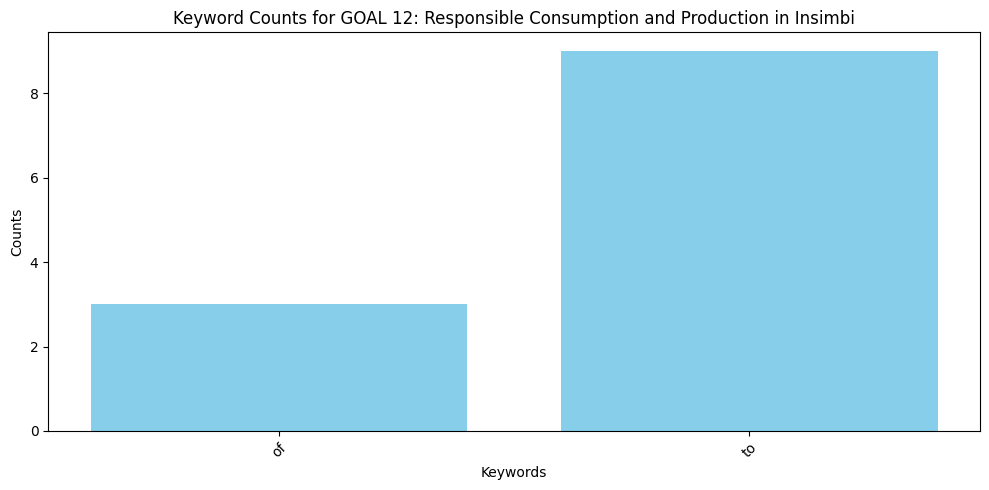

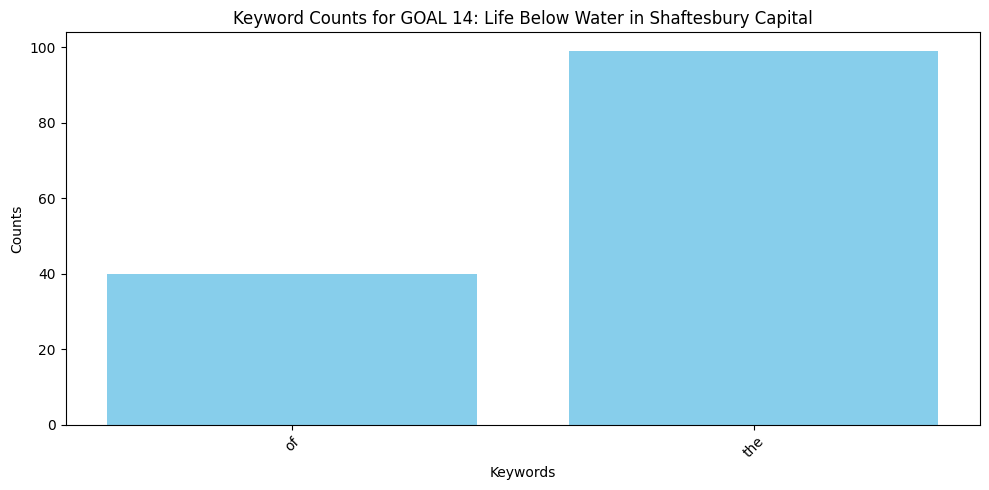

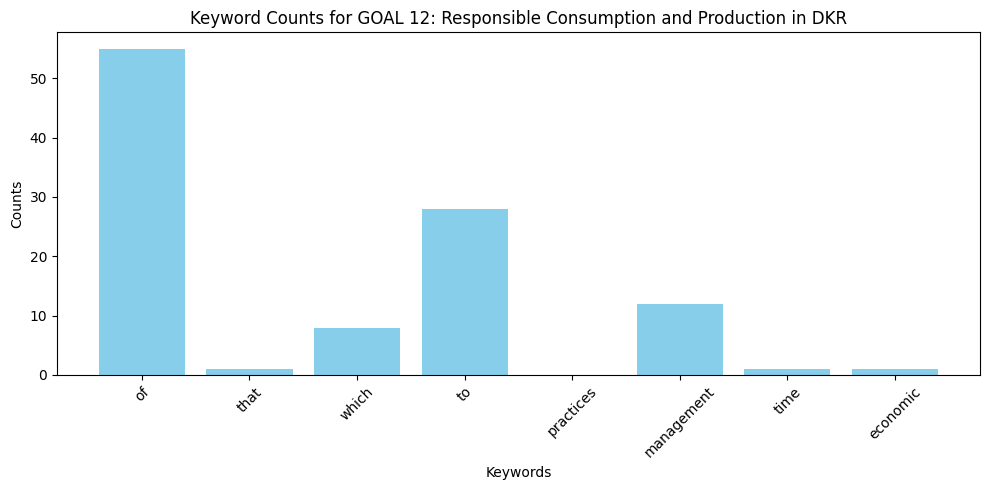

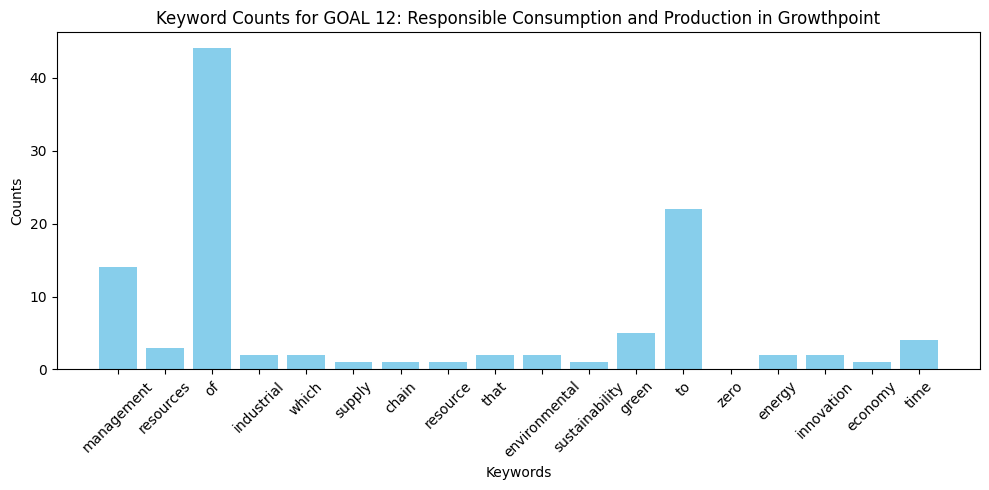

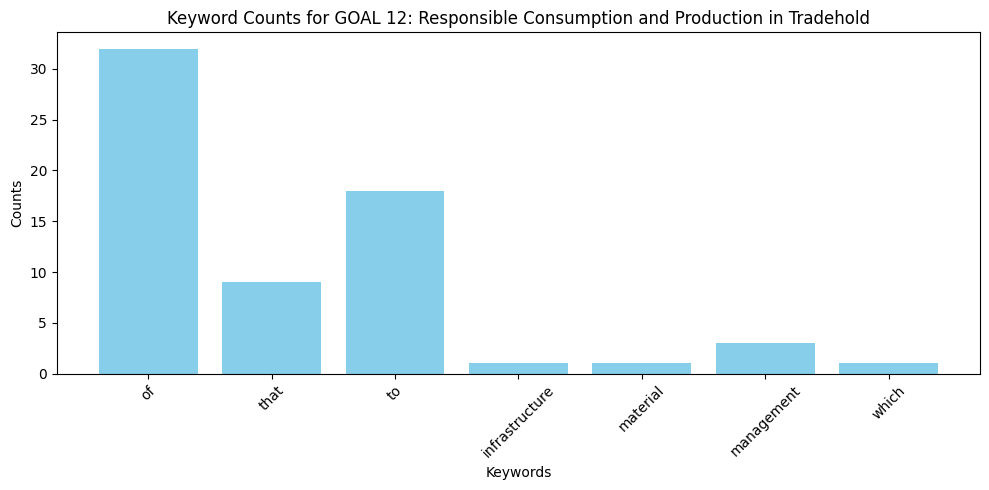

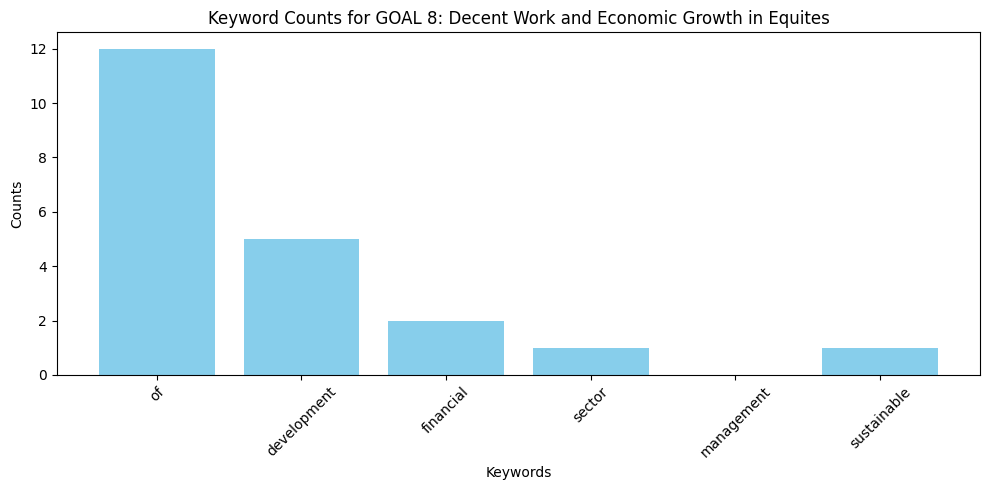

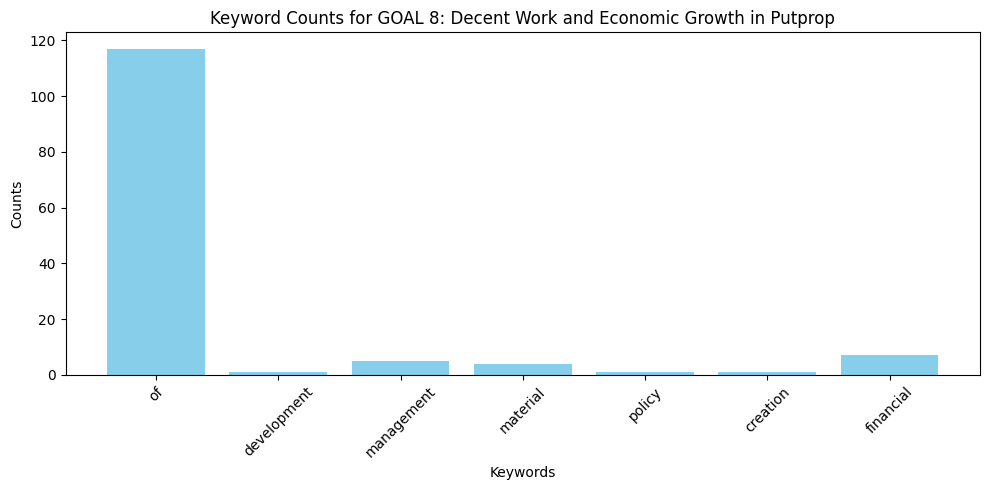

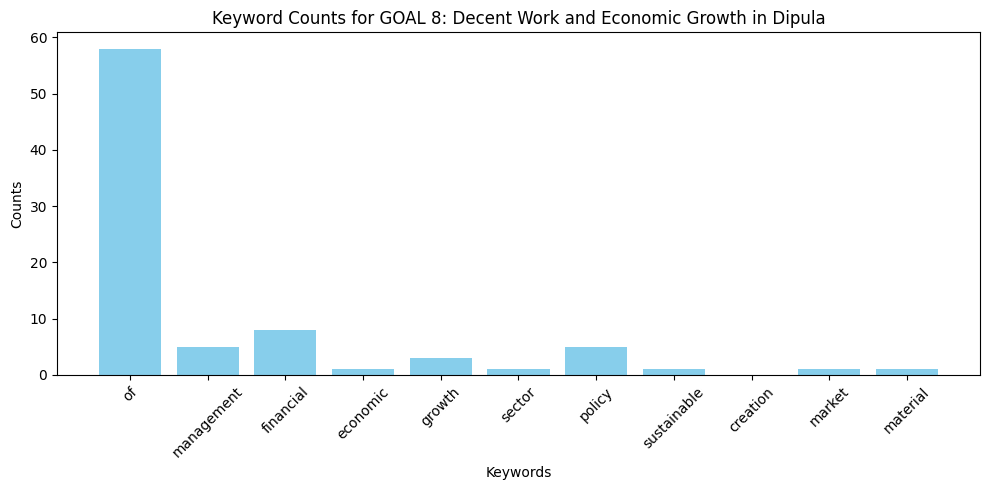

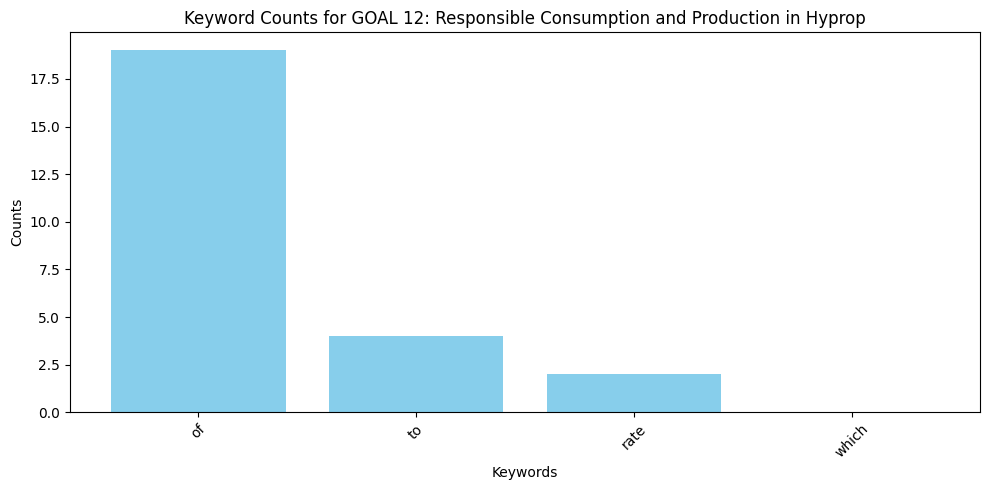

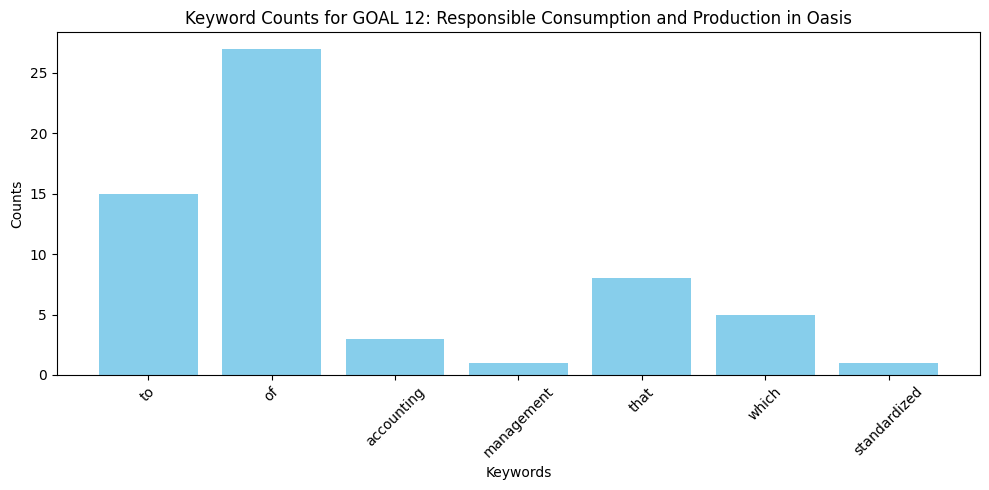

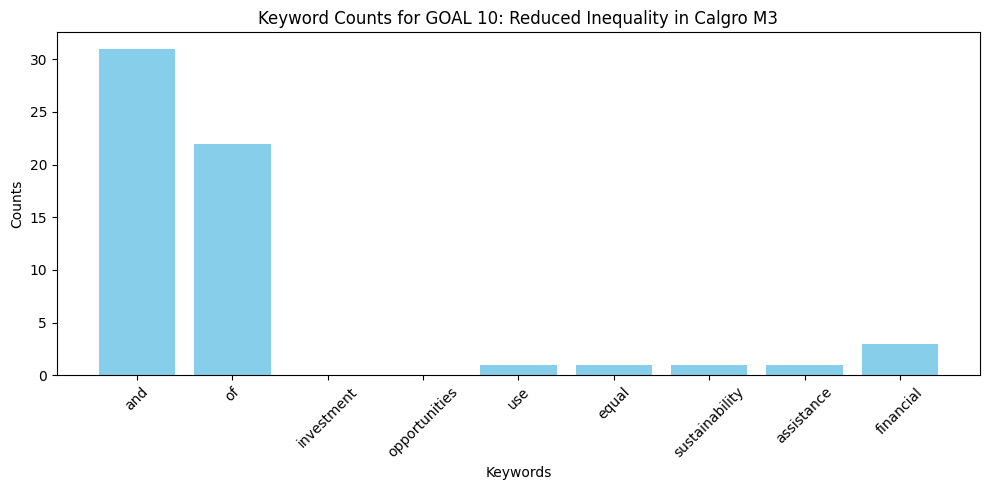

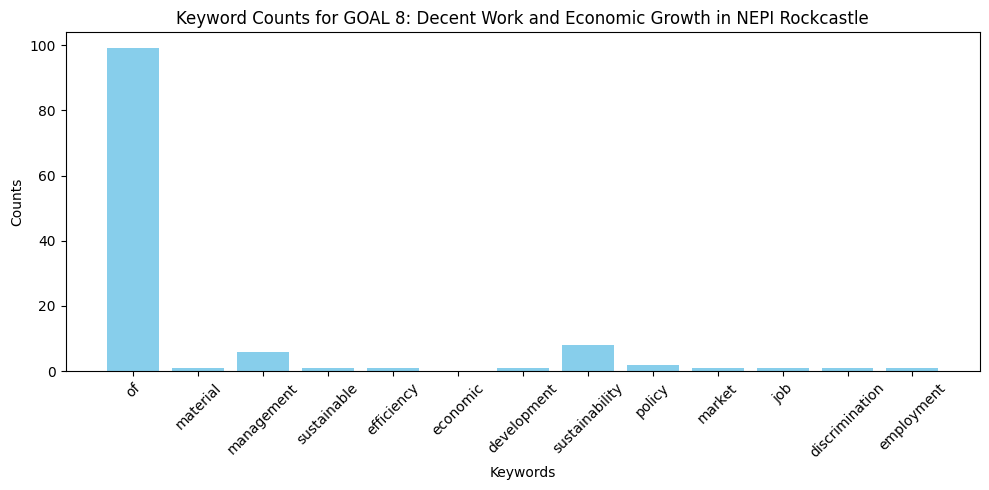

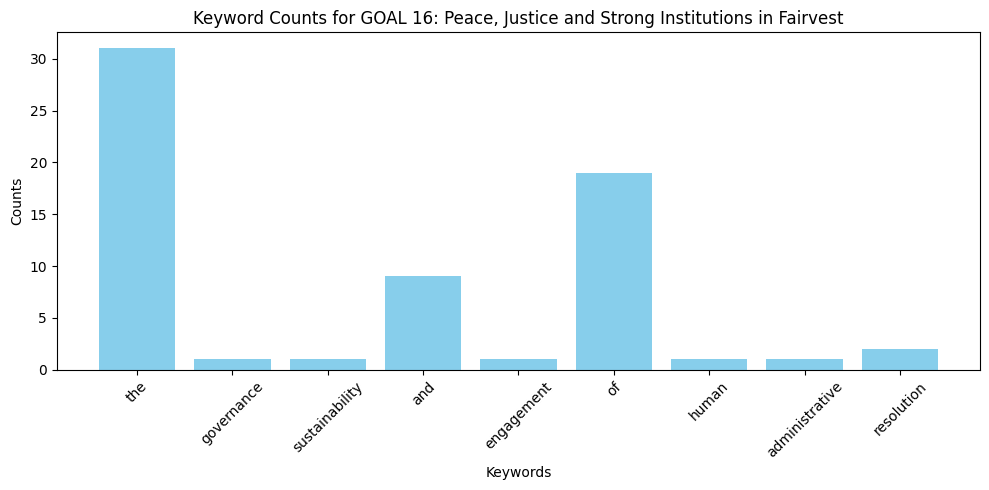

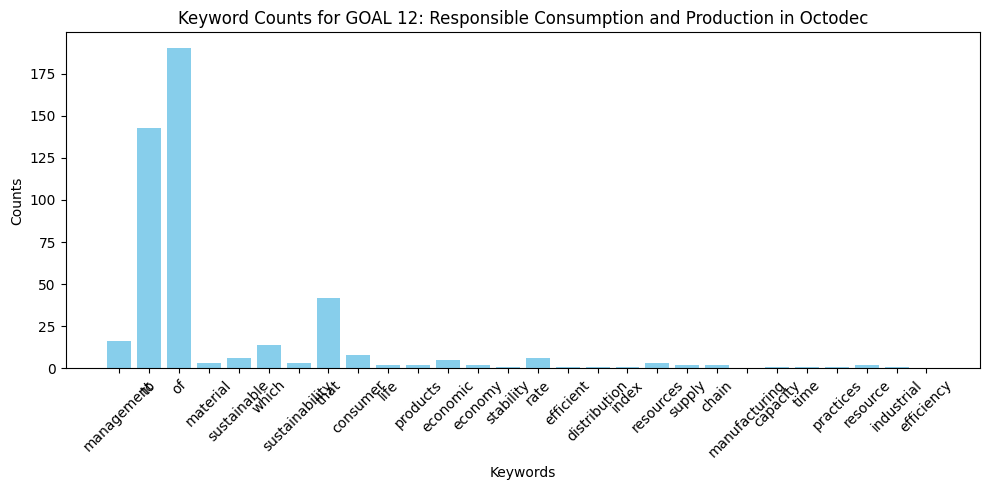

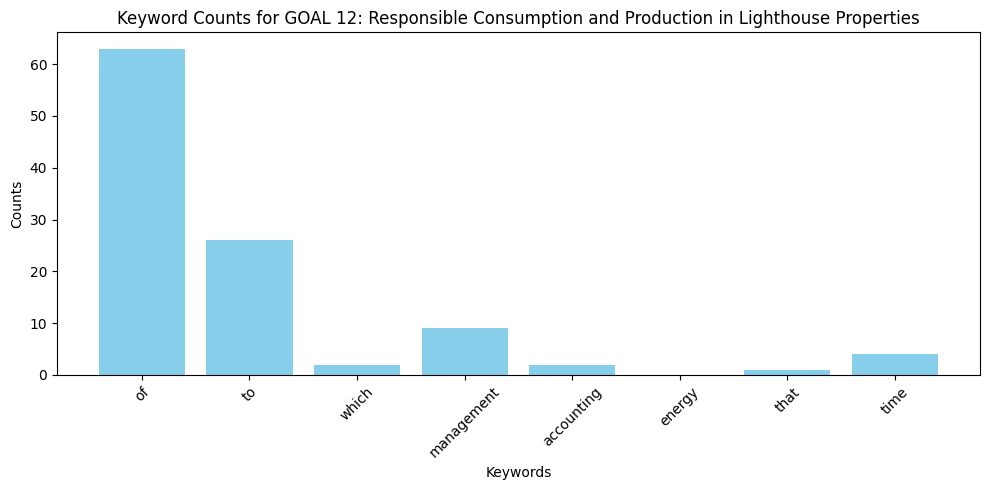

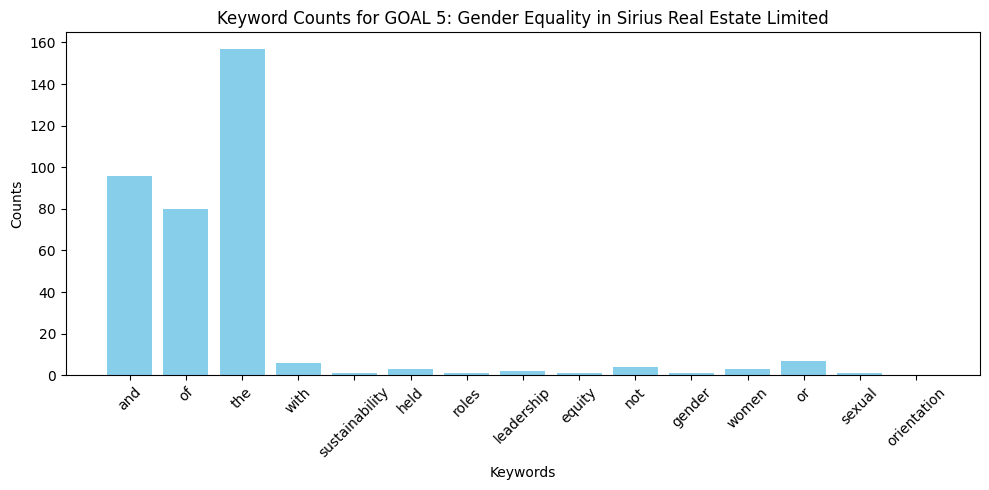

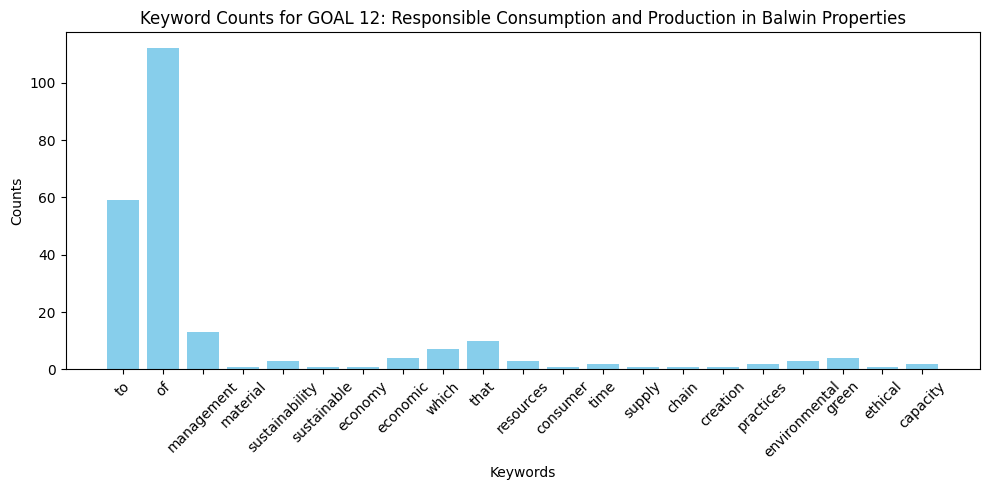

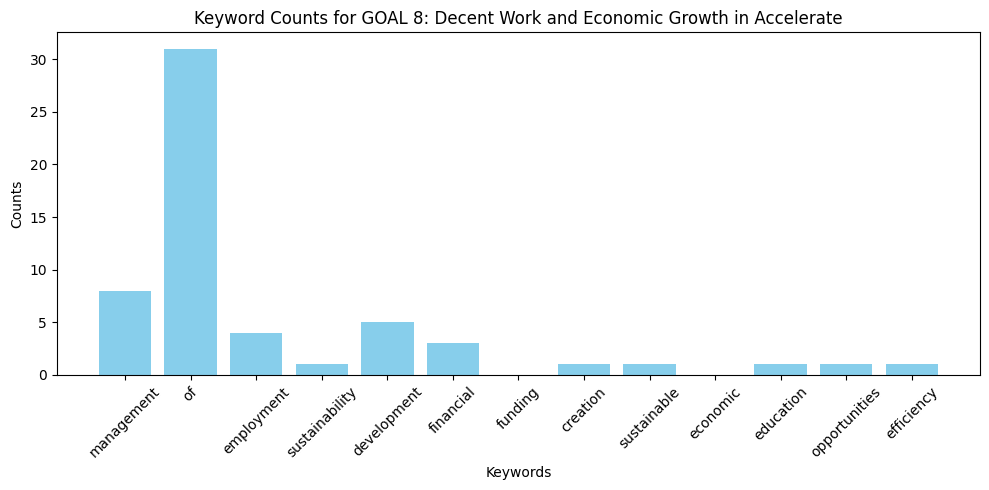

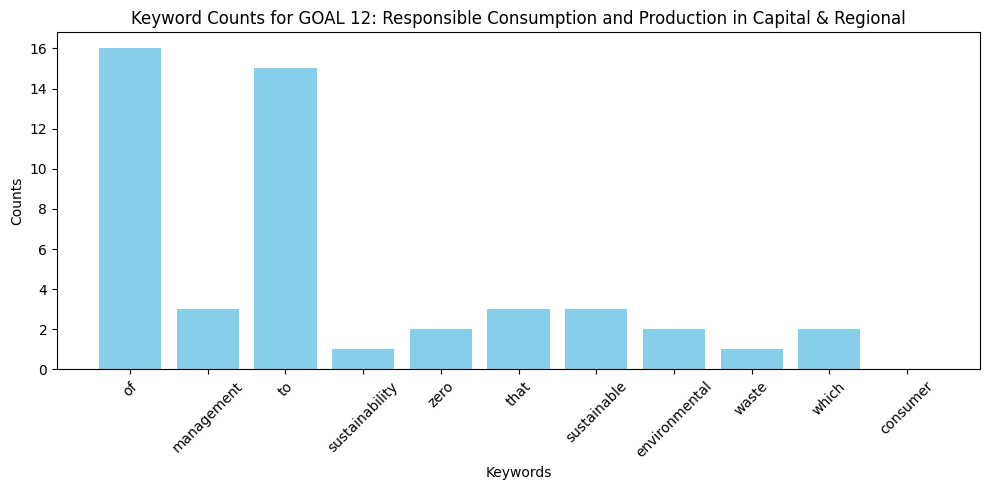

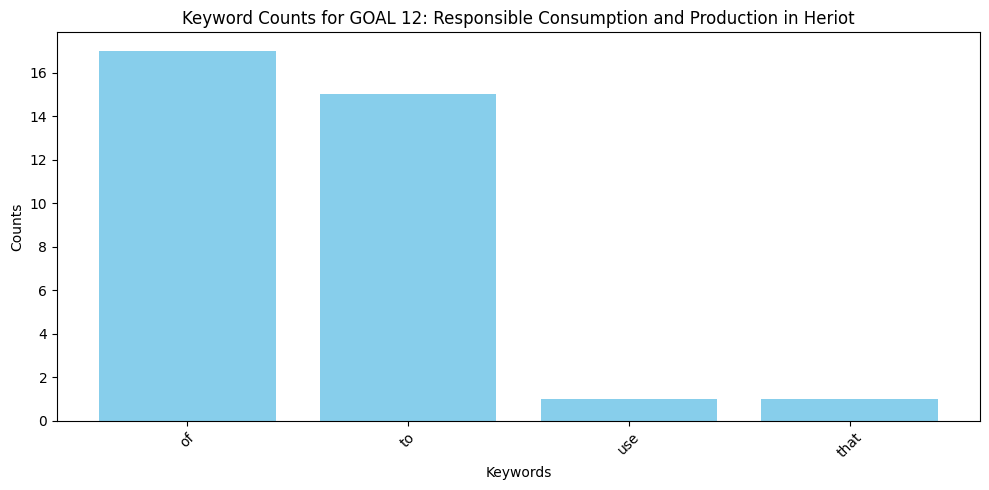

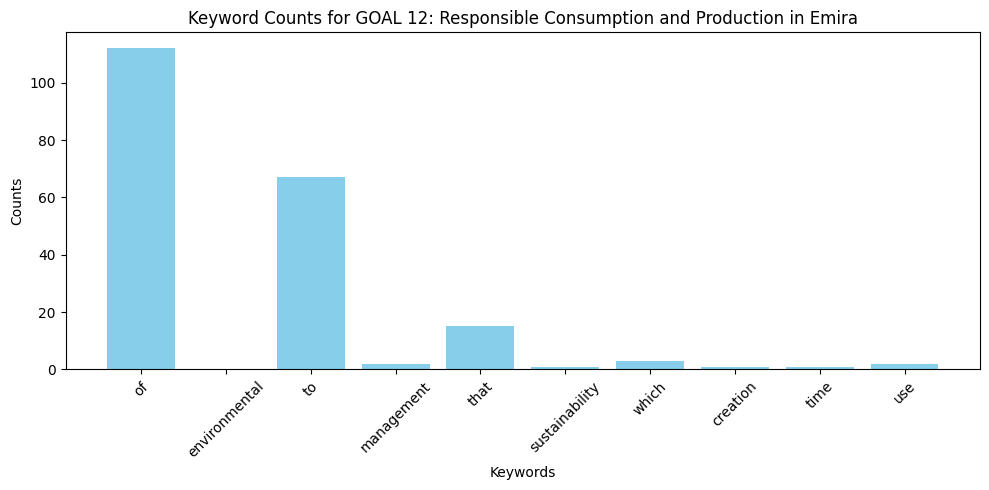

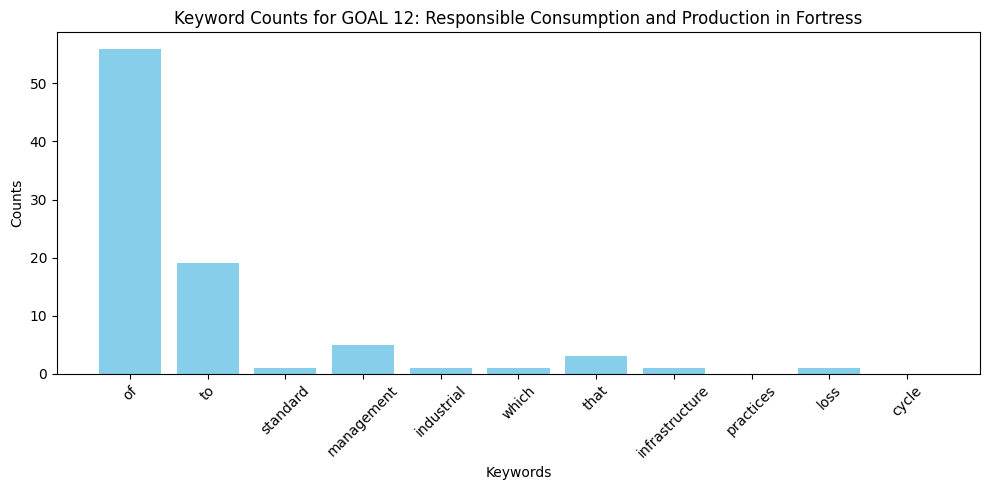

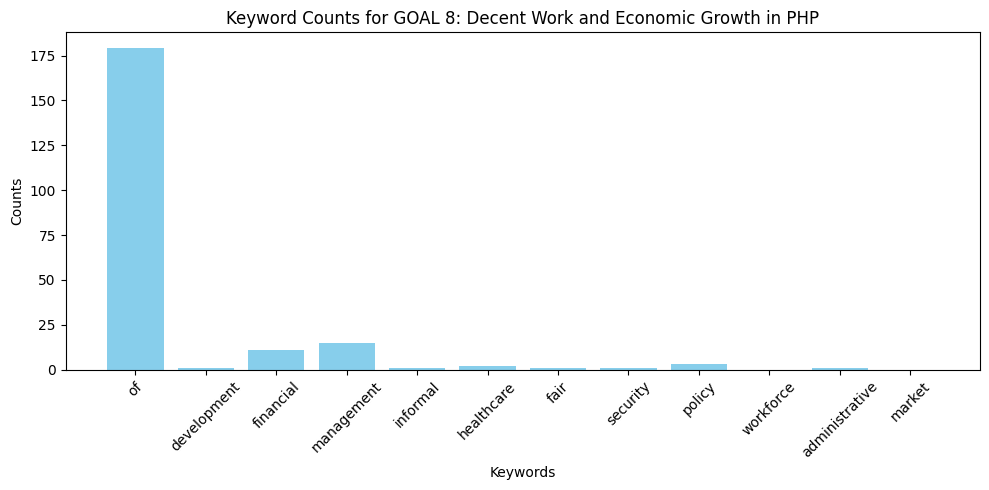

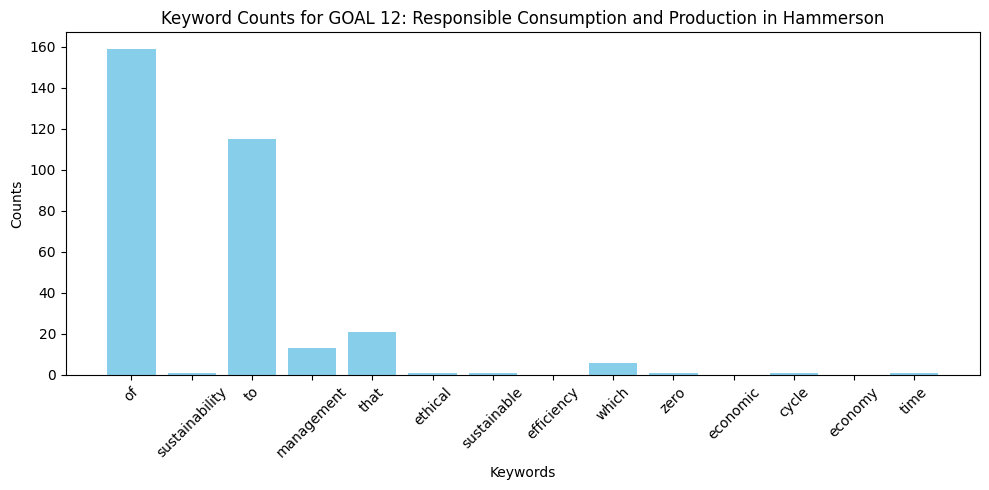

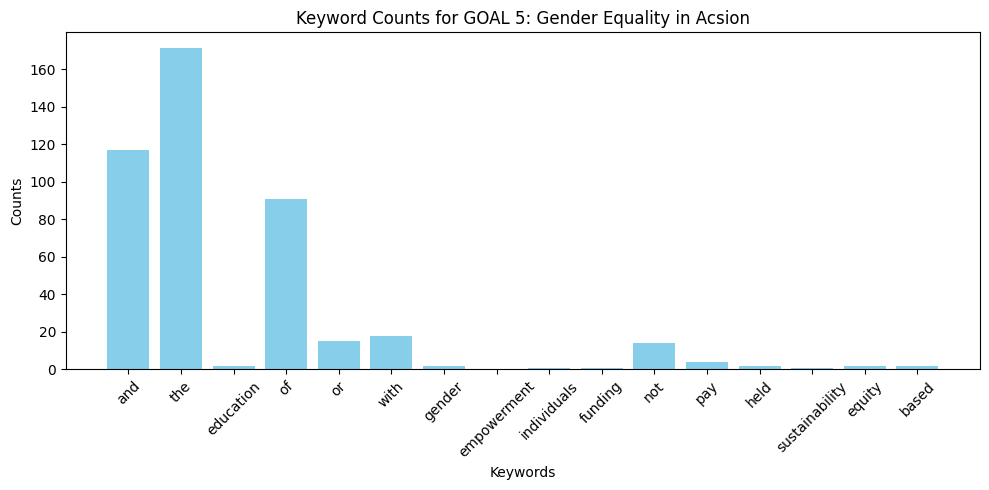

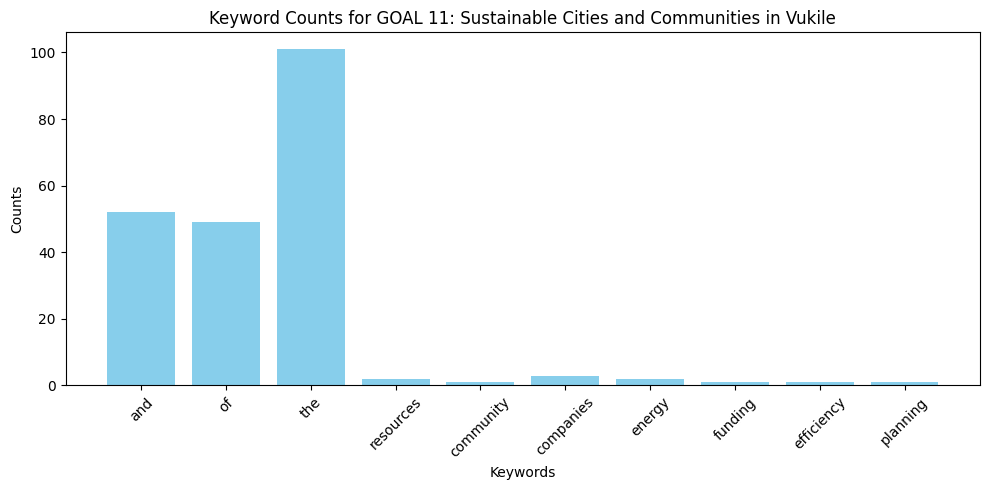

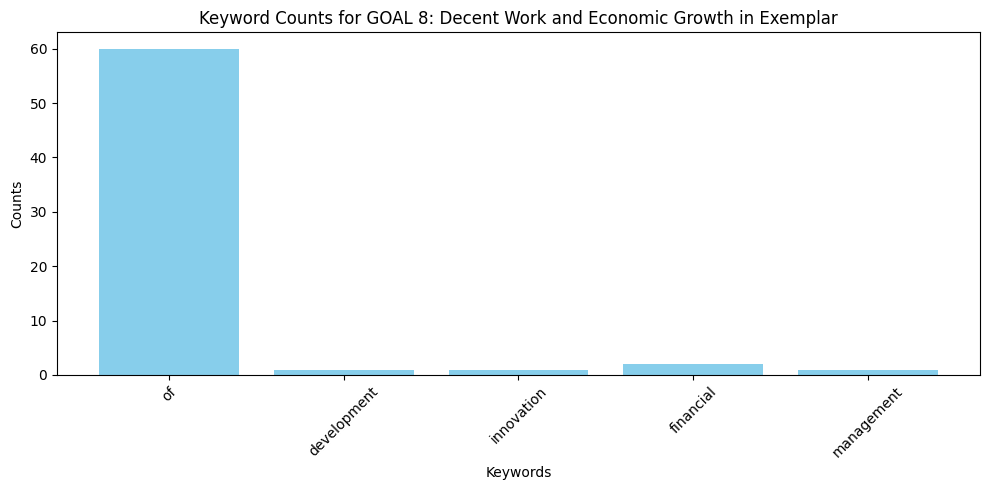

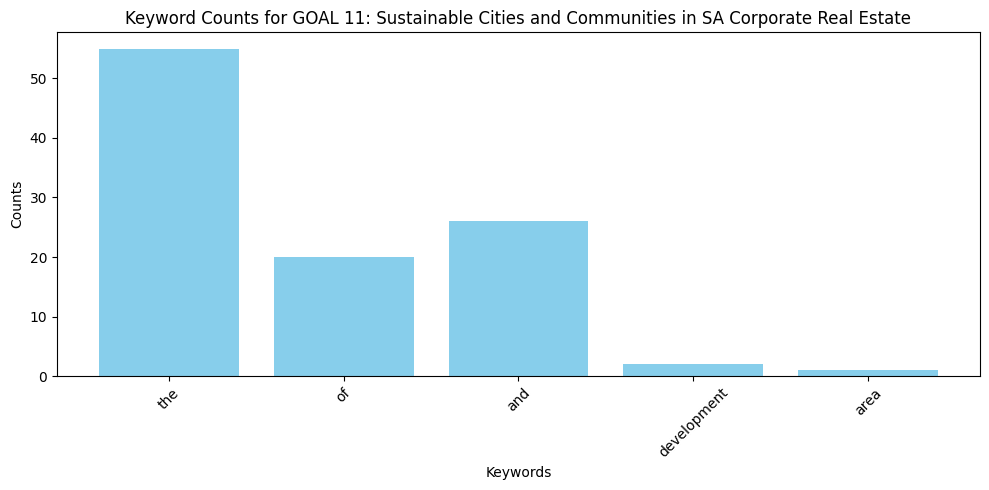

No keywords found for GOAL 11: Sustainable Cities and Communities in Redefine Properties


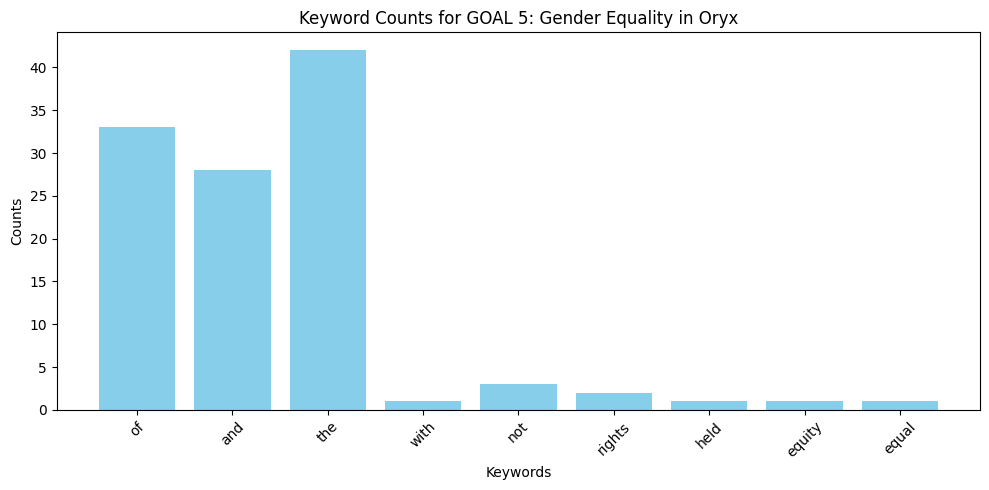

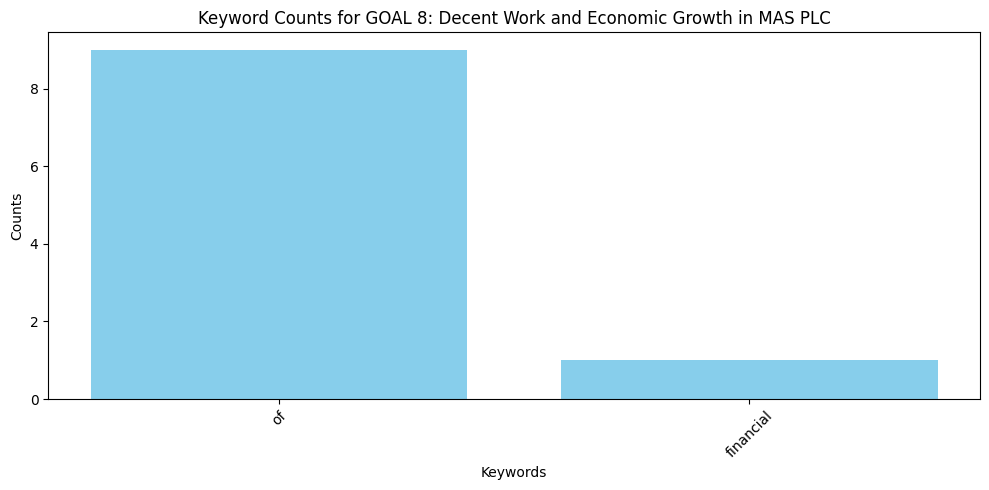

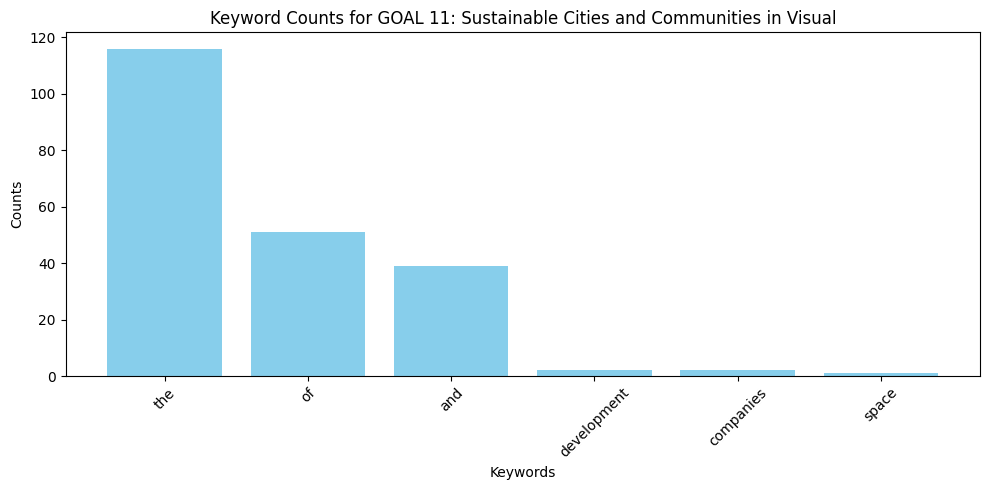

No keywords found for GOAL 11: Sustainable Cities and Communities in Attacq
No keywords found for GOAL 11: Sustainable Cities and Communities in GTC


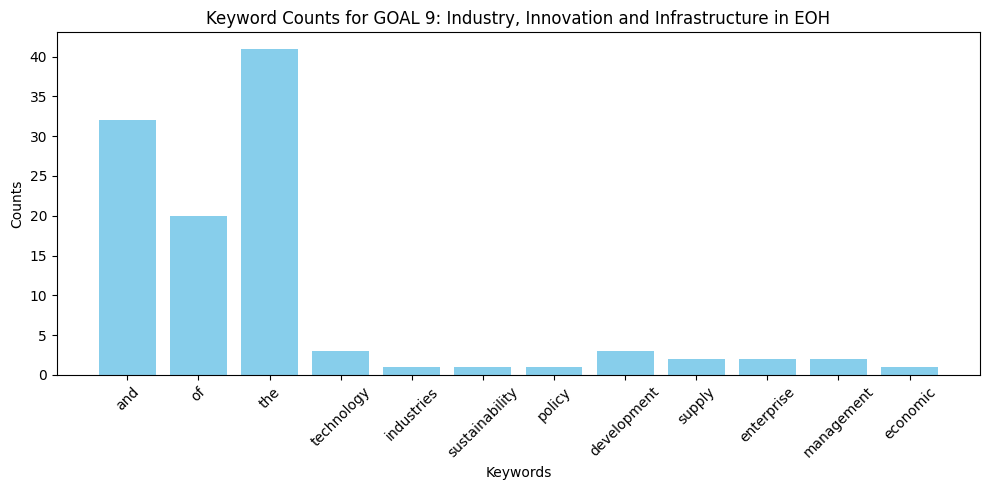

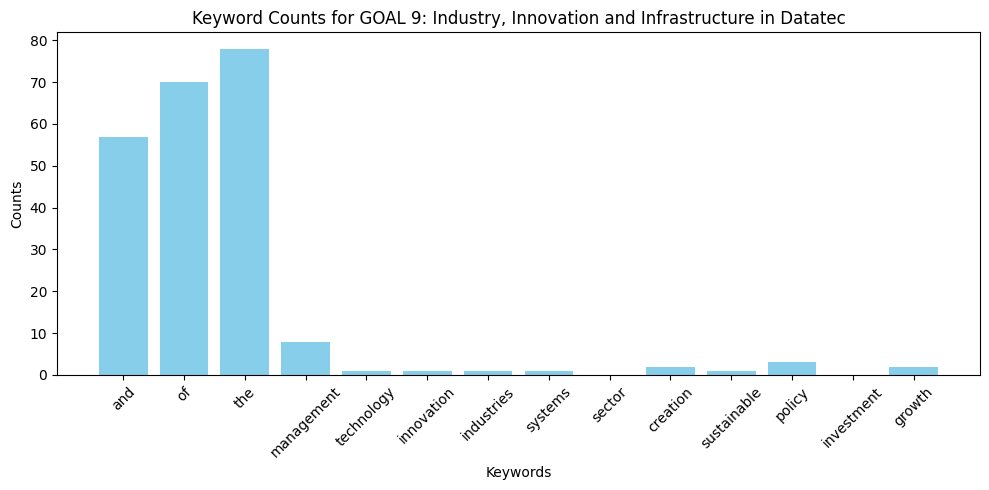

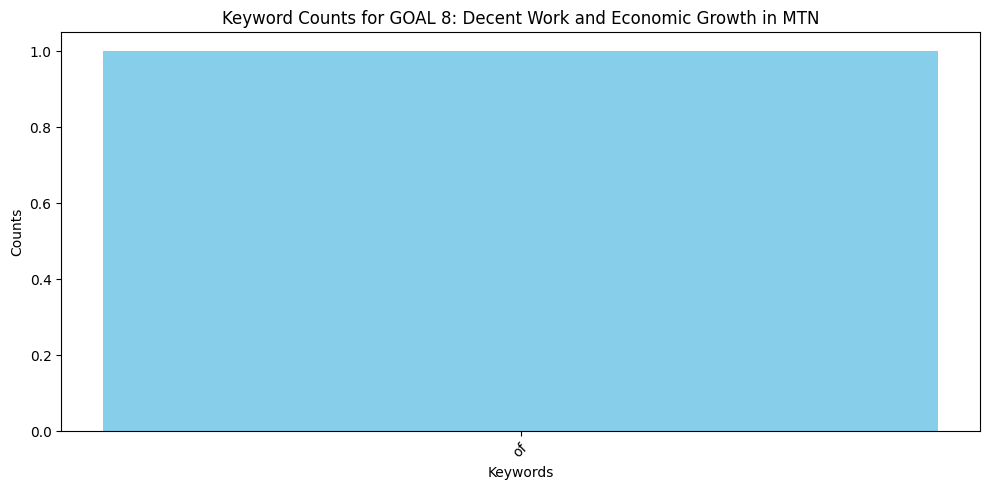

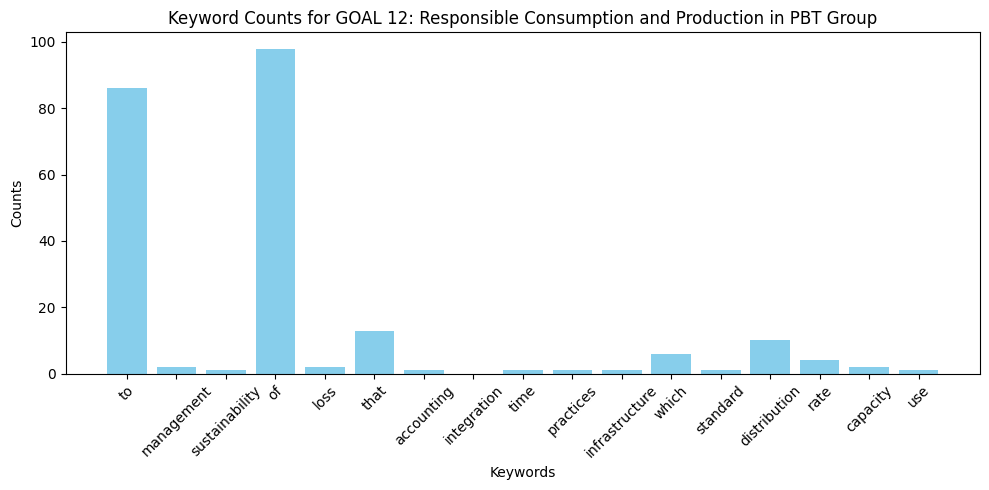

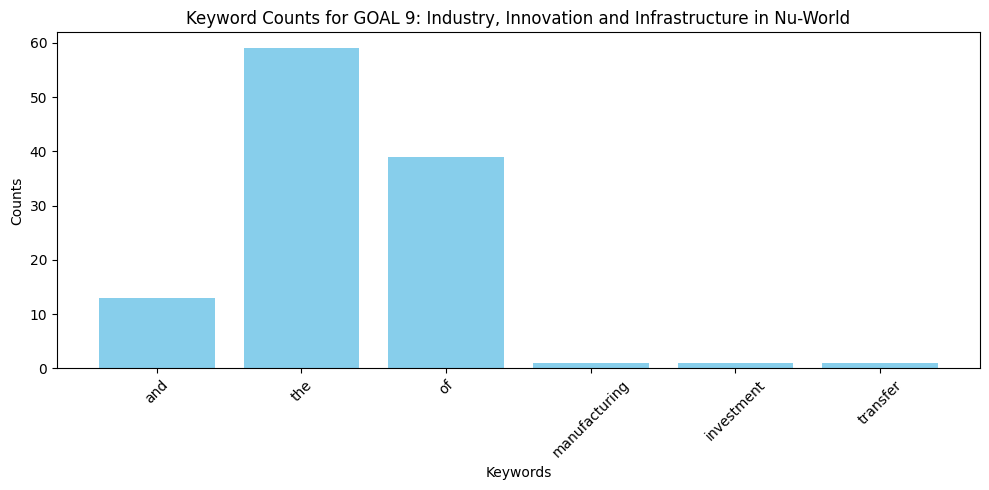

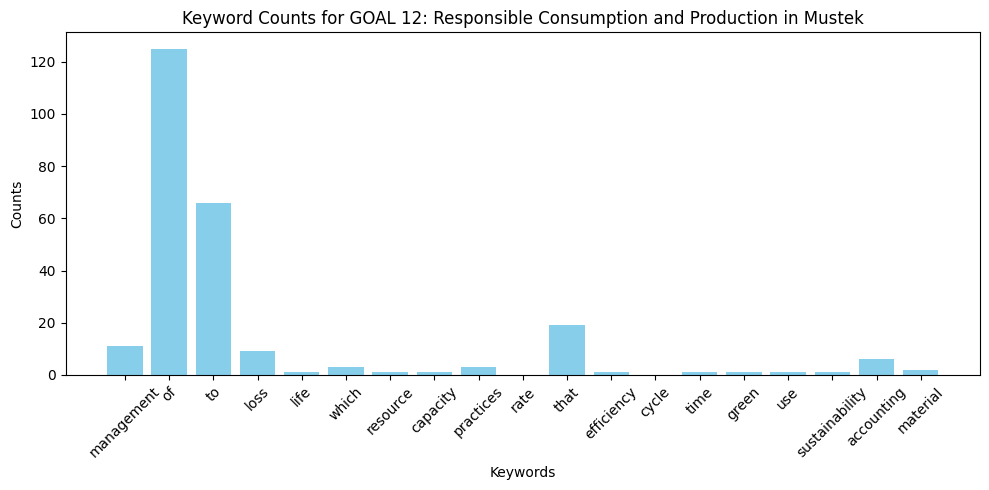

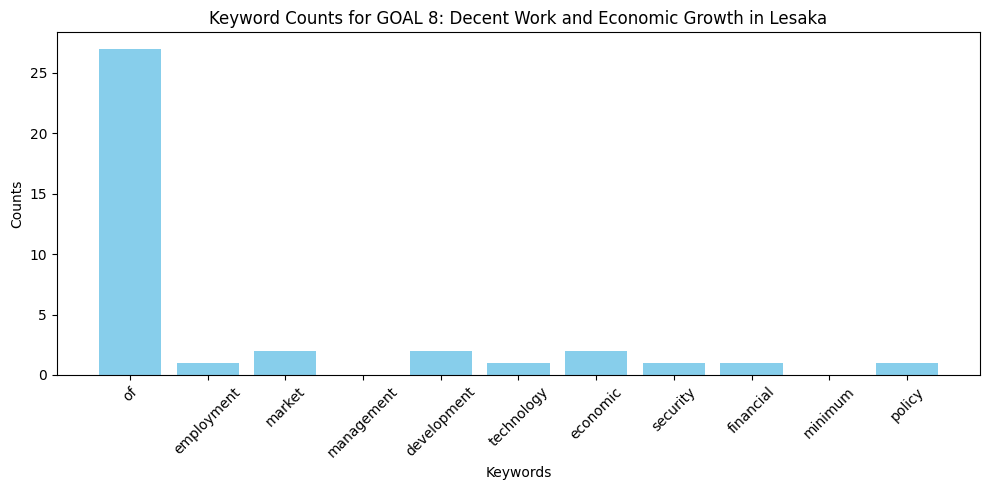

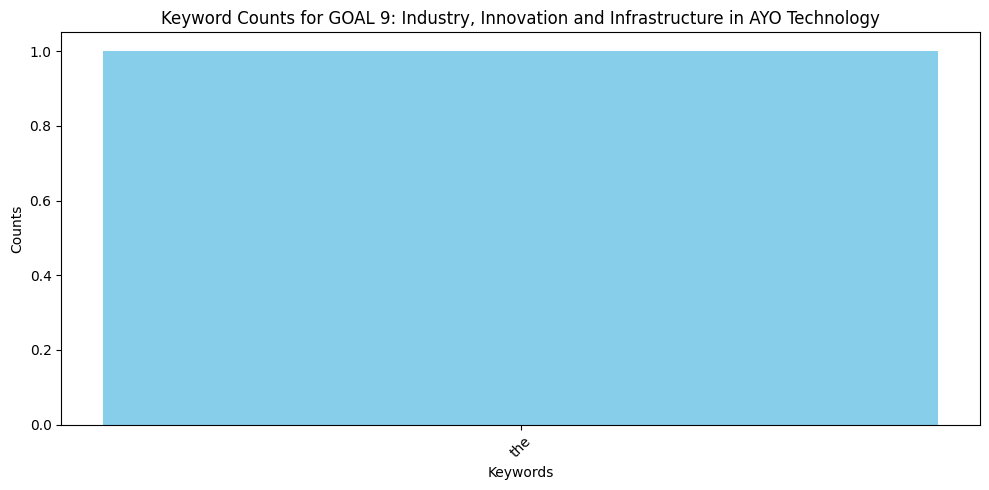

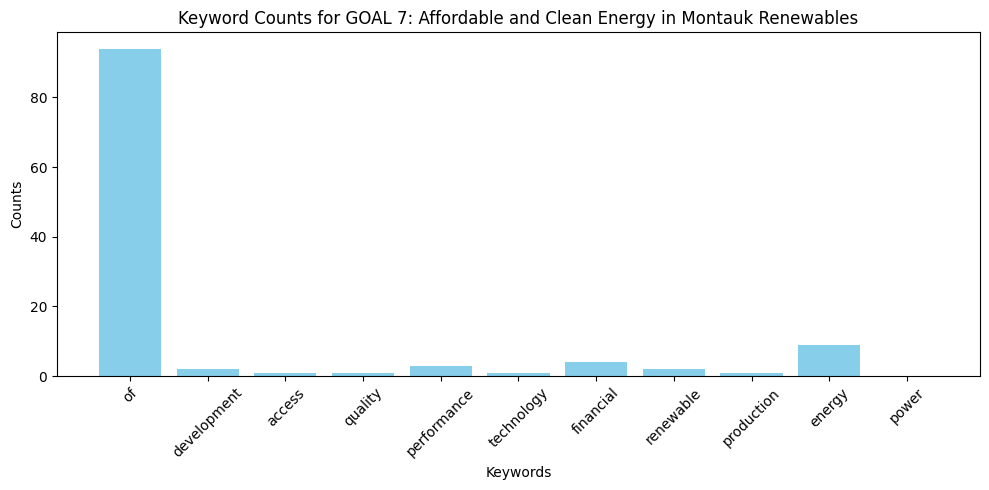

In [28]:
def plot_sdg_keywords(text_contents, label_list, text_files, pred_dicts):
    # Define the directory to save the plots
    output_directory = "/content/SDG_RESULTS_2020/Plots"
    os.makedirs(output_directory, exist_ok=True)

    for content, file_name, pred_dict in zip(text_contents, text_files, pred_dicts):
        # Sort 'pred_dict' by value and index the highest at [0]
        sorted_preds = sorted(pred_dict.items(), key=lambda x: x[1], reverse=True)
        if sorted_preds:
            # Determine the most likely SDG based on the model predictions
            most_likely_sdg = sorted_preds[0][0]

            # Retrieve the keywords for the most likely SDG
            keywords = label_list[most_likely_sdg]

            # Count occurrences of each keyword
            keyword_counts = count_keywords(content, keywords)

            if keyword_counts:
                # Unpack the keywords and their counts
                keywords_list = list(keyword_counts)
                counts = [content.lower().split().count(keyword) for keyword in keywords_list]

                plt.figure(figsize=(10, 5))
                plt.bar(keywords_list, counts, color='skyblue')
                plt.xlabel('Keywords')
                plt.ylabel('Counts')
                plt.title(f'Keyword Counts for {most_likely_sdg} in {file_name}')
                plt.xticks(rotation=45)
                plt.tight_layout()

                # Save the plot before showing it
                plot_filename = os.path.join(output_directory, f"{file_name.replace(' ', '_')}_{most_likely_sdg}.png")
                plt.savefig(plot_filename)
                plt.show()
                plt.clf()
                plt.close()
            else:
                print(f"No keywords found for {most_likely_sdg} in {file_name}")

# Assuming text_contents, expanded_keywords, Text_Files, and pred_dicts are already defined
# Call the function with your data
plot_sdg_keywords(text_contents, expanded_keywords, Text_Files, pred_dicts)

## Downloading the plots

In [29]:


dir_to_zip = '/content/SDG_RESULTS_2020/Plots'
output_filename = '2020_Plots.zip'
delete_dir_after_download = "No"

# Create a zip archive from the directory
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', dir_to_zip)

# Conditionally delete the directory
if delete_dir_after_download == "Yes":
    shutil.rmtree(dir_to_zip)

# Download the file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Affinity of the companies with the different SDG Components

In [30]:
# Automatically create dataframes for each company's predictions and concatenate them
company_dfs = []

for index, (text, pred_dict) in enumerate(zip(Text_Files, pred_dicts)):
    df = pd.DataFrame.from_dict(pred_dict, orient='index', columns=[text])
    df.index.name = 'SDG COMPONENTS'
    company_dfs.append(df)

# Concatenate the dataframes along the columns axis
combined_df = pd.concat(company_dfs, axis=1)

# Display the combined dataframe
display(combined_df)

Agra  \
SDG COMPONENTS                                           
GOAL 1: No Poverty                               0.059   
GOAL 2: Zero Hunger                              0.081   
GOAL 3: Good Health and Well-being               0.055   
GOAL 4: Quality Education                        0.047   
GOAL 5: Gender Equality                          0.095   
GOAL 6: Clean Water and Sanitation               0.069   
GOAL 7: Affordable and Clean Energy              0.016   
GOAL 8: Decent Work and Economic Growth          0.047   
GOAL 9: Industry, Innovation and Infrastructure  0.100   
GOAL 10: Reduced Inequality                      0.072   
GOAL 11: Sustainable Cities and Communities      0.154   
GOAL 12: Responsible Consumption and Production  0.042   
GOAL 13: Climate Action                          0.023   
GOAL 14: Life Below Water                        0.047   
GOAL 15: Life on Land                            0.059   
GOAL 16: Peace, Justice and Strong Institutions  0.036   

                                                 Argent Industrial Limited  \
SDG COMPONENTS                                                               
GOAL 1: No Poverty                                                   0.003   
GOAL 2: Zero Hunger                                                  0.008   
GOAL 3: Good Health and Well-being                                   0.004   
GOAL 4: Quality Education                                            0.005   
GOAL 5: Gender Equality                                              0.029   
GOAL 6: Clean Water and Sanitation                                   0.003   
GOAL 7: Affordable and Clean Energy                                  0.033   
GOAL 8: Decent Work and Economic Growth                              0.194   
GOAL 9: Industry, Innovation and Infrastructure                      0.023   
GOAL 10: Reduced Inequality                                          0.005   
GOAL 11: Sustainable Cities and Communities                          0.051   
GOAL 12: Responsible Consumption and Production                      0.459   
GOAL 13: Climate Action                                              0.039   
GOAL 14: Life Below Water                                            0.067   
GOAL 15: Life on Land                                                0.075   
GOAL 16: Peace, Justice and Strong Institutions                      0.003   

                                                 York Timbers  Wesizwe    PPC  \
SDG COMPONENTS                                                                  
GOAL 1: No Poverty                                      0.004    0.002  0.001   
GOAL 2: Zero Hunger                                     0.002    0.004  0.002   
GOAL 3: Good Health and Well-being                      0.002    0.001  0.001   
GOAL 4: Quality Education                               0.000    0.017  0.013   
GOAL 5: Gender Equality                                 0.003    0.002  0.002   
GOAL 6: Clean Water and Sanitation                      0.002    0.001  0.002   
GOAL 7: Affordable and Clean Energy                     0.035    0.021  0.026   
GOAL 8: Decent Work and Economic Growth                 0.030    0.495  0.132   
GOAL 9: Industry, Innovation and Infrastructure         0.006    0.128  0.360   
GOAL 10: Reduced Inequality                             0.011    0.005  0.003   
GOAL 11: Sustainable Cities and Communities             0.002    0.009  0.005   
GOAL 12: Responsible Consumption and Production         0.883    0.308  0.436   
GOAL 13: Climate Action                                 0.010    0.003  0.015   
GOAL 14: Life Below Water                               0.005    0.001  0.001   
GOAL 15: Life on Land                                   0.003    0.001  0.001   
GOAL 16: Peace, Justice and Strong Institutions         0.001    0.001  0.000   

                                                 AngloAmerican  Northam  \
SDG COMPONENTS                                                    